# 10X scRNA-seq data Xenopus Laevis - Batch integration and cell clustering

December 7, 2019 Jonathan Fiorentino. Updated on November, 20, 2020

Preprocessed data through cellranger shared by Chris Penfold.

We have 3 pairs of samples (IVF and NT):

1) SIGAA2 (IVF) and SIGAB2 (NT);

2) SIGAD11 (IVF) and SIGAC11 (NT);

3) SIGAH5 (IVF) and SIGAH12 (NT);

Samples at point 2) are not comparable cause to sample quality and we will discard them (they are also from a slightly different stage). We could use SIGAD11 if we need IVF cells from slightly later stage.

For each sample we use the following files (they are in folder /Users/jonathan/Desktop/MUNCHEN/Project_Xenopus/10XCountMatrix/):

1) SIGAA2_91_Chm3_FC2r.csv (IVF)

2) SIGAB2_91_Chm3_FC2r.csv (NT)

3) SIGAH5_91_Chm3_FC2.csv (IVF)

4) SIGAH12_91_Chm3_FC2.csv (NT)

# Data integration using Seurat

Read the count matrices, normalize and find 2000 HVGs for each sample

Read list of markers

In [1]:
#Function for gene ID - gene name conversion
convertGeneList <- function(x){
    #Read the list for the conversion
    conv.list<-read.csv('/Users/jonathan/Desktop/MUNCHEN/Project_Xenopus/Conversion_ID_names/conversion_geneID_genename_Xenopus_Laevis.csv')
    #Find the indices of my list in the conversion list
    indices<- which(conv.list[,'gene_id'] %in% x) 
    #Return the gene names and make them unique
    make.unique(as.character(conv.list[,'gene_name'][indices]))
}

Two cells below: check repeated gene names (remember them and plot their expression once you get the UMAP)

In [31]:
#SIGAH12.data<-read.table(file=paste0("/Users/jonathan/Desktop/MUNCHEN/Project_Xenopus/10XCountMatrix/","SIGAH12_91_Chm3_FC2.csv"),
#                         row.names = 1,header=TRUE,sep=",")
#x <-as.vector(convertGeneList(rownames(SIGAH12.data)))

[1] "Xelaev18000001m.g" "Xelaev18000003m.g" "Xelaev18000004m.g"
[4] "Xelaev18000005m.g" "tm6sf2.1"          "Xelaev18000007m.g"


In [32]:
# %get x --from R

# import numpy as np
# import pandas as pd

# print(len(x),len(np.unique(x)))

# uniqueX,countX=np.unique(x,return_counts=True)
# d={'name':uniqueX,'c': countX}
# df2=pd.DataFrame(data=d)
# df2=df2.sort_values('c',ascending=False)
# np.savetxt('repeated_genes.txt',np.c_[df2[:35]],fmt='%s',delimiter='\t')

Load the data, add metadata, normalize, find HVGs

In [47]:
library(Seurat)
library(ggplot2)
library(cowplot)

SIGAH12.data<-read.table(file=paste0("/Users/jonathan/Desktop/MUNCHEN/Project_Xenopus/10XCountMatrix/","SIGAH12_91_Chm3_FC2.csv"),
                         row.names = 1,header=TRUE,sep=",")
rownames(SIGAH12.data) <- convertGeneList(rownames(SIGAH12.data))
print(head(rownames(SIGAH12.data)))
#SIGAH12.data <- Read10X(data.dir = "/Users/christopherpenfold/Desktop/10X/Eva_10X/SIGAH12_91_Chm3_FC2/outs/filtered_feature_bc_matrix")
SIGAH12 <- CreateSeuratObject(counts = SIGAH12.data, project = "SIGAH12")
SIGAH12$stim <- "SIGAH12"
SIGAH12$isnt <- "NT"
#print(head(x = rownames(x = SIGAH12)))
#print(head(x = colnames(x = SIGAH12)))
#print(SIGAH12)
SIGAH12 <- subset(SIGAH12, subset = nFeature_RNA > 0)
SIGAH12 <- NormalizeData(SIGAH12, verbose = FALSE)
SIGAH12 <- FindVariableFeatures(SIGAH12, selection.method = "vst", nfeatures = 2000)

SIGAH5.data<-read.table(file=paste0("/Users/jonathan/Desktop/MUNCHEN/Project_Xenopus/10XCountMatrix/","SIGAH5_91_Chm3_FC2.csv"),
                        row.names = 1,header=TRUE,sep=",")
rownames(SIGAH5.data) <- convertGeneList(rownames(SIGAH5.data))
#SIGAH5.data <- Read10X(data.dir = "/Users/christopherpenfold/Desktop/10X/Eva_10X/SIGAH5_91_Chm3_FC2/outs/filtered_feature_bc_matrix")
SIGAH5 <- CreateSeuratObject(counts = SIGAH5.data, project = "SIGAH5")
SIGAH5$stim <- "SIGAH5"
SIGAH5$isnt <- "IVF"
SIGAH5 <- subset(SIGAH5, subset = nFeature_RNA > 0)
SIGAH5 <- NormalizeData(SIGAH5, verbose = FALSE)
SIGAH5 <- FindVariableFeatures(SIGAH5, selection.method = "vst", nfeatures = 2000)

SIGAA2.data<-read.table(file=paste0("/Users/jonathan/Desktop/MUNCHEN/Project_Xenopus/10XCountMatrix/","SIGAA2_91_Chm3_FC2r.csv"),
                        row.names = 1,header=TRUE,sep=",")
rownames(SIGAA2.data) <- convertGeneList(rownames(SIGAA2.data))
#SIGAA2.data <- Read10X(data.dir = "/Users/christopherpenfold/Desktop/Eva/10X/SIGAA2_91_Chm3_FC2r/outs/filtered_feature_bc_matrix")
SIGAA2 <- CreateSeuratObject(counts = SIGAA2.data, project = "SIGAA2")
SIGAA2$stim <- "SIGAA2"
SIGAA2$isnt <- "IVF"
SIGAA2 <- subset(SIGAA2, subset = nFeature_RNA > 0)
SIGAA2 <- NormalizeData(SIGAA2, verbose = FALSE)
SIGAA2 <- FindVariableFeatures(SIGAA2, selection.method = "vst", nfeatures = 2000)


SIGAB2.data<-read.table(file=paste0("/Users/jonathan/Desktop/MUNCHEN/Project_Xenopus/10XCountMatrix/","SIGAB2_91_Chm3_FC2r.csv"),
                        row.names = 1,header=TRUE,sep=",")
rownames(SIGAB2.data) <- convertGeneList(rownames(SIGAB2.data))
#SIGAB2.data <- Read10X(data.dir = "/Users/christopherpenfold/Desktop/Eva/10X/SIGAB2_91_Chm3_FC2r/outs/filtered_feature_bc_matrix")
SIGAB2 <- CreateSeuratObject(counts = SIGAB2.data, project = "SIGAB2")
SIGAB2$stim <- "SIGAB2"
SIGAB2$isnt <- "NT"
SIGAB2 <- subset(SIGAB2, subset = nFeature_RNA > 0)
SIGAB2 <- NormalizeData(SIGAB2, verbose = FALSE)
SIGAB2 <- FindVariableFeatures(SIGAB2, selection.method = "vst", nfeatures = 2000)


Markers <- read.delim("/Users/jonathan/Desktop/MUNCHEN/Project_Xenopus/Gene_lists/Markers.txt")
markerlist <- c(paste(Markers$Marker_genes,".L",sep = "")
                ,paste(Markers$Marker_genes,".S",sep = ""))

[1] "Xelaev18000001m.g" "Xelaev18000003m.g" "Xelaev18000004m.g"
[4] "Xelaev18000005m.g" "tm6sf2.1"          "Xelaev18000007m.g"


Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”

Perform batch integration

In [48]:
xenopus.anchors <- FindIntegrationAnchors(object.list = list(SIGAH5, SIGAA2, SIGAH12, SIGAB2),
                                          dims = 1:20, anchor.features = 2000)
xenopus.combined <- IntegrateData(anchorset = xenopus.anchors, dims = 1:20)
DefaultAssay(xenopus.combined) <- "integrated"
xenopus.combined <- ScaleData(xenopus.combined, verbose = FALSE)

Computing 2000 integration features
Scaling features for provided objects
Finding all pairwise anchors
Running CCA
Merging objects
Finding neighborhoods
Finding anchors
	Found 2277 anchors
Filtering anchors
	Retained 1822 anchors
Extracting within-dataset neighbors
Running CCA
Merging objects
Finding neighborhoods
Finding anchors
	Found 2959 anchors
Filtering anchors
	Retained 2246 anchors
Extracting within-dataset neighbors
Running CCA
Merging objects
Finding neighborhoods
Finding anchors
	Found 2185 anchors
Filtering anchors
	Retained 1373 anchors
Extracting within-dataset neighbors
Running CCA
Merging objects
Finding neighborhoods
Finding anchors
	Found 2007 anchors
Filtering anchors
	Retained 1776 anchors
Extracting within-dataset neighbors
Running CCA
Merging objects
Finding neighborhoods
Finding anchors
	Found 1713 anchors
Filtering anchors
	Retained 1552 anchors
Extracting within-dataset neighbors
Running CCA
Merging objects
Finding neighborhoods
Finding anchors
	Found 1947 anch

# Robustness analysis

In [3]:
library(mcclust)

# nr of repeats for bootsraping
nrRepeats = 50
# percent of HVGs to retain
percent = 50
# nr of HVGs left
sampleSize <- round(length(rownames(xenopus.combined))*percent/100)
print(sampleSize)

# function to bootstrap
# indexVector is a vector with the indices of HVG
# percent defines how many genes will be left out. The default is 50 %
# nrRepeats defines how many times you want to repeat the sampling
myBootstrap <- function(indexVector){
        idxMatrix <- matrix(rep(NA, sampleSize*nrRepeats)
                            ,nrow = nrRepeats)
        for (i in 1:nrow(idxMatrix)){
                mySample <- sample(indexVector
                                   ,size = sampleSize)
                idxMatrix[i,] <- mySample
        }
        idxMatrix
}

# indices of all HVGs
HVGidx <- rownames(xenopus.combined)
bootstrapIdxMatrix <- myBootstrap(HVGidx)
# function to calculated clusters
calculateClusters <- function(geneIndices,nn,res){
    subset.xenopus.combined <- xenopus.combined[geneIndices]
    subset.xenopus.combined <- RunPCA(subset.xenopus.combined,features=geneIndices,
                                      npcs = 30, verbose = FALSE)
    subset.xenopus.combined <- FindNeighbors(subset.xenopus.combined,k.param=nn, 
    reduction = "pca", dims = 1:20)
    subset.xenopus.combined <- FindClusters(subset.xenopus.combined, resolution = res)
    as.vector(Idents(subset.xenopus.combined))
}



res.vec <- seq(0.1, 1.5, by = 0.1)
k.vec <- seq(10,40,by=5)
VarInfoVector <- matrix(rep(NA, nrRepeats))
VarInfoMatrix.mean <- matrix(rep(NA, length(k.vec)*length(res.vec)),nrow=length(k.vec),
                        ncol = length(res.vec))
VarInfoMatrix.var <- matrix(rep(NA, length(k.vec)*length(res.vec)),nrow=length(k.vec),
                        ncol = length(res.vec))

i<-1
for(k in k.vec){
    j<-1
    for(r in res.vec){
        tot.clust <- calculateClusters(HVGidx,k,r)
        for (l in 1:nrow(bootstrapIdxMatrix)){
            # take indices of HVGs from the bootstrapIdxMatrix of the i-th iteration
            indices <- bootstrapIdxMatrix[l,]
            # calculate the cluster statistics with these indices and deepSplit == r
            subsample.clust <- calculateClusters(indices,k,r)
            if(length(duplicated(indices)[duplicated(indices) == TRUE])>0){print(ERROR)}
            #Calculate the variation of information between the two clustering (whole dataset and subsampled data)
            VarInfoVector[l] <- vi.dist(tot.clust,subsample.clust)
        }
        VarInfoMatrix.mean[i,j]<- mean(VarInfoVector)
        VarInfoMatrix.var[i,j]<- var(VarInfoVector)
        j<-j+1
    }
    i<- i+1
}

Loading required package: lpSolve


[1] 1000


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 53342

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9585
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56679

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9583
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 55516

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9583
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 57195

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9581
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56848

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9586
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 55831

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9589
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56549

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9577
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56672

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9580
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56707

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9598
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56755

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9581
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 55946

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9579
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56812

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9590
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56843

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9577
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 57267

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9586
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 57198

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9575
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 55098

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9586
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56868

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9591
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56288

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9590
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56377

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9570
Number of communities: 6
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 57898

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9579
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56828

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9588
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 57070

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9577
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56504

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9586
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56134

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9582
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56600

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9602
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56529

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9579
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 57677

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9567
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56960

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9572
Number of communities: 9
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 57170

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9584
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56352

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9581
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56330

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9588
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 57115

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9579
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56957

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9576
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56993

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9579
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56718

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9571
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56446

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9582
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56306

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9592
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56636

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9576
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 55949

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9578
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56559

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9592
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56758

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9581
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 57055

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9598
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 57122

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9587
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56693

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9577
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56098

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9574
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56349

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9581
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56370

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9575
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56853

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9583
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 55654

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9574
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56742

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9587
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56712

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9571
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 53342

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9308
Number of communities: 9
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56679

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9299
Number of communities: 9
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 55516

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9292
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 57195

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9312
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56848

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9290
Number of communities: 9
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 55831

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9322
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56549

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9295
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56672

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9302
Number of communities: 9
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56707

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9339
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56755

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9310
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 55946

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9291
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56812

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9305
Number of communities: 9
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56843

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9293
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 57267

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9298
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 57198

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9293
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 55098

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9310
Number of communities: 9
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56868

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9317
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56288

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9298
Number of communities: 9
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56377

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9296
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 57898

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9301
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56828

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9287
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 57070

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9294
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56504

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9302
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56134

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9298
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56600

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9316
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56529

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9299
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 57677

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9274
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56960

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9300
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 57170

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9296
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56352

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9310
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56330

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9306
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 57115

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9297
Number of communities: 9
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56957

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9302
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56993

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9309
Number of communities: 9
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56718

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9278
Number of communities: 9
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56446

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9305
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56306

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9308
Number of communities: 9
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56636

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9268
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 55949

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9302
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56559

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9281
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56758

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9294
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 57055

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9308
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 57122

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9297
Number of communities: 9
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56693

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9292
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56098

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9288
Number of communities: 9
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56349

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9291
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56370

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9280
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56853

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9294
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 55654

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9307
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56742

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9310
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56712

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9302
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 53342

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9126
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56679

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9066
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 55516

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9092
Number of communities: 12
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 57195

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9110
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56848

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9072
Number of communities: 9
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 55831

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9121
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56549

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9086
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56672

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9092
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56707

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9124
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56755

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9121
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 55946

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9086
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56812

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9096
Number of communities: 9
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56843

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9074
Number of communities: 9
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 57267

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9068
Number of communities: 9
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 57198

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9078
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 55098

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9107
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56868

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9098
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56288

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9081
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56377

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9087
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 57898

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9083
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56828

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9094
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 57070

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9073
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56504

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9083
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56134

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9106
Number of communities: 12
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56600

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9128
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56529

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9084
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 57677

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9074
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56960

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9067
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 57170

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9085
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56352

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9118
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56330

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9103
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 57115

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9113
Number of communities: 9
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56957

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9073
Number of communities: 9
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56993

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9099
Number of communities: 12
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56718

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9064
Number of communities: 9
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56446

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9104
Number of communities: 9
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56306

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9129
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56636

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9065
Number of communities: 9
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 55949

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9094
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56559

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9093
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56758

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9070
Number of communities: 9
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 57055

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9091
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 57122

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9070
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56693

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9088
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56098

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9080
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56349

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9101
Number of communities: 9
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56370

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9077
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56853

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9099
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 55654

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9083
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56742

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9100
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56712

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9094
Number of communities: 12
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 53342

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9004
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56679

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8920
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 55516

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8948
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 57195

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8954
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56848

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8915
Number of communities: 12
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 55831

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8978
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56549

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8946
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56672

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8949
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56707

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8995
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56755

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8990
Number of communities: 12
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 55946

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8933
Number of communities: 12
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56812

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8955
Number of communities: 12
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56843

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8923
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 57267

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8917
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 57198

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8909
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 55098

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8967
Number of communities: 12
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56868

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8958
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56288

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8915
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56377

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8953
Number of communities: 12
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 57898

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8931
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56828

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8953
Number of communities: 12
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 57070

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8946
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56504

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8948
Number of communities: 12
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56134

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8973
Number of communities: 12
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56600

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8967
Number of communities: 12
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56529

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8940
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 57677

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8929
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56960

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8923
Number of communities: 12
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 57170

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8939
Number of communities: 12
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56352

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8988
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56330

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8958
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 57115

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8957
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56957

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8897
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56993

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8964
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56718

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8896
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56446

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8938
Number of communities: 12
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56306

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8967
Number of communities: 12
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56636

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8889
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 55949

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8948
Number of communities: 12
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56559

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8922
Number of communities: 12
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56758

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8925
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 57055

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8945
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 57122

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8926
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56693

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8938
Number of communities: 12
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56098

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8918
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56349

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8948
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56370

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8934
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56853

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8947
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 55654

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8934
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56742

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8949
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56712

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8954
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 53342

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8903
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56679

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8813
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 55516

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8817
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 57195

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8835
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56848

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8811
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 55831

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8869
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56549

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8842
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56672

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8848
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56707

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8876
Number of communities: 17
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56755

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8872
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 55946

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8813
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56812

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8823
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56843

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8800
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 57267

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8810
Number of communities: 16
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 57198

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8801
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 55098

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8834
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56868

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8845
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56288

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8790
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56377

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8819
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 57898

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8814
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56828

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8813
Number of communities: 12
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 57070

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8813
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56504

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8820
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56134

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8855
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56600

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8859
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56529

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8821
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 57677

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8809
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56960

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8823
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 57170

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8810
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56352

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8875
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56330

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8849
Number of communities: 16
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 57115

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8847
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56957

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8784
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56993

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8856
Number of communities: 17
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56718

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8779
Number of communities: 16
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56446

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8826
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56306

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8862
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56636

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8764
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 55949

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8837
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56559

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8793
Number of communities: 12
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56758

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8799
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 57055

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8836
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 57122

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8788
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56693

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8830
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56098

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8813
Number of communities: 16
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56349

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8826
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56370

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8810
Number of communities: 17
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56853

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8809
Number of communities: 12
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 55654

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8832
Number of communities: 16
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56742

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8833
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56712

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8839
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 53342

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8813
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56679

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8705
Number of communities: 18
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 55516

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8713
Number of communities: 18
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 57195

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8742
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56848

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8714
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 55831

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8779
Number of communities: 17
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56549

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8754
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56672

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8749
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56707

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8786
Number of communities: 18
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56755

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8775
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 55946

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8709
Number of communities: 16
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56812

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8705
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56843

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8697
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 57267

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8715
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 57198

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8700
Number of communities: 17
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 55098

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8720
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56868

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8740
Number of communities: 16
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56288

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8680
Number of communities: 16
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56377

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8721
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 57898

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8701
Number of communities: 16
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56828

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8711
Number of communities: 16
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 57070

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8711
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56504

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8723
Number of communities: 16
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56134

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8742
Number of communities: 16
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56600

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8754
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56529

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8722
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 57677

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8712
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56960

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8728
Number of communities: 18
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 57170

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8712
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56352

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8780
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56330

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8751
Number of communities: 16
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 57115

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8757
Number of communities: 18
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56957

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8713
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56993

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8762
Number of communities: 17
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56718

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8691
Number of communities: 18
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56446

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8720
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56306

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8766
Number of communities: 17
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56636

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8676
Number of communities: 16
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 55949

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8720
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56559

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8670
Number of communities: 16
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56758

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8676
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 57055

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8742
Number of communities: 16
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 57122

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8674
Number of communities: 16
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56693

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8732
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56098

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8709
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56349

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8706
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56370

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8719
Number of communities: 18
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56853

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8705
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 55654

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8734
Number of communities: 17
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56742

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8720
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56712

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8734
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 53342

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8732
Number of communities: 17
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56679

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8626
Number of communities: 20
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 55516

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8615
Number of communities: 18
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 57195

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8648
Number of communities: 17
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56848

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8619
Number of communities: 16
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 55831

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8693
Number of communities: 18
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56549

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8663
Number of communities: 16
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56672

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8655
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56707

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8689
Number of communities: 18
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56755

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8693
Number of communities: 17
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 55946

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8626
Number of communities: 18
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56812

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8618
Number of communities: 16
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56843

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8608
Number of communities: 18
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 57267

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8624
Number of communities: 17
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 57198

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8623
Number of communities: 17
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 55098

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8622
Number of communities: 18
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56868

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8659
Number of communities: 18
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56288

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8587
Number of communities: 17
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56377

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8631
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 57898

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8600
Number of communities: 17
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56828

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8627
Number of communities: 16
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 57070

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8607
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56504

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8627
Number of communities: 16
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56134

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8645
Number of communities: 17
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56600

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8669
Number of communities: 17
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56529

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8633
Number of communities: 16
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 57677

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8614
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56960

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8642
Number of communities: 18
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 57170

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8620
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56352

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8676
Number of communities: 16
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56330

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8656
Number of communities: 17
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 57115

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8669
Number of communities: 18
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56957

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8603
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56993

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8673
Number of communities: 17
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56718

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8599
Number of communities: 18
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56446

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8612
Number of communities: 16
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56306

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8673
Number of communities: 18
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56636

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8589
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 55949

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8621
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56559

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8574
Number of communities: 16
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56758

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8567
Number of communities: 17
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 57055

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8649
Number of communities: 17
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 57122

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8578
Number of communities: 16
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56693

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8630
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56098

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8620
Number of communities: 16
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56349

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8606
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56370

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8638
Number of communities: 18
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56853

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8608
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 55654

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8649
Number of communities: 19
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56742

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8629
Number of communities: 16
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56712

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8635
Number of communities: 18
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 53342

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8654
Number of communities: 20
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56679

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8551
Number of communities: 20
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 55516

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8517
Number of communities: 19
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 57195

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8570
Number of communities: 19
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56848

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8532
Number of communities: 18
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 55831

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8606
Number of communities: 18
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56549

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8589
Number of communities: 17
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56672

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8558
Number of communities: 16
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56707

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8606
Number of communities: 20
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56755

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8603
Number of communities: 17
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 55946

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8545
Number of communities: 18
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56812

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8538
Number of communities: 17
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56843

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8522
Number of communities: 18
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 57267

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8549
Number of communities: 20
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 57198

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8532
Number of communities: 19
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 55098

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8544
Number of communities: 18
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56868

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8579
Number of communities: 19
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56288

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8501
Number of communities: 18
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56377

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8538
Number of communities: 16
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 57898

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8510
Number of communities: 17
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56828

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8542
Number of communities: 18
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 57070

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8522
Number of communities: 19
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56504

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8549
Number of communities: 17
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56134

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8555
Number of communities: 17
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56600

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8577
Number of communities: 17
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56529

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8537
Number of communities: 17
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 57677

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8531
Number of communities: 16
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56960

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8552
Number of communities: 19
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 57170

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8521
Number of communities: 16
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56352

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8588
Number of communities: 18
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56330

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8569
Number of communities: 18
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 57115

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8588
Number of communities: 18
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56957

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8528
Number of communities: 16
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56993

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8573
Number of communities: 17
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56718

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8511
Number of communities: 20
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56446

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8537
Number of communities: 16
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56306

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8587
Number of communities: 20
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56636

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8515
Number of communities: 19
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 55949

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8548
Number of communities: 16
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56559

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8484
Number of communities: 18
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56758

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8492
Number of communities: 19
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 57055

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8569
Number of communities: 18
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 57122

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8491
Number of communities: 17
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56693

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8546
Number of communities: 18
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56098

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8534
Number of communities: 18
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56349

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8522
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56370

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8552
Number of communities: 19
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56853

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8528
Number of communities: 17
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 55654

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8566
Number of communities: 19
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56742

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8543
Number of communities: 17
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56712

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8551
Number of communities: 19
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 53342

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8591
Number of communities: 21
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56679

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8473
Number of communities: 21
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 55516

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8441
Number of communities: 20
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 57195

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8497
Number of communities: 21
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56848

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8454
Number of communities: 20
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 55831

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8533
Number of communities: 19
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56549

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8512
Number of communities: 18
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56672

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8467
Number of communities: 16
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56707

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8523
Number of communities: 22
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56755

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8522
Number of communities: 20
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 55946

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8473
Number of communities: 20
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56812

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8452
Number of communities: 17
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56843

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8448
Number of communities: 19
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 57267

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8476
Number of communities: 19
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 57198

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8453
Number of communities: 20
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 55098

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8463
Number of communities: 19
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56868

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8510
Number of communities: 21
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56288

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8416
Number of communities: 20
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56377

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8464
Number of communities: 18
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 57898

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8429
Number of communities: 21
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56828

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8466
Number of communities: 19
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 57070

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8453
Number of communities: 19
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56504

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8475
Number of communities: 18
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56134

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8474
Number of communities: 20
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56600

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8497
Number of communities: 17
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56529

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8449
Number of communities: 17
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 57677

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8454
Number of communities: 20
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56960

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8469
Number of communities: 19
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 57170

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8444
Number of communities: 20
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56352

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8513
Number of communities: 19
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56330

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8481
Number of communities: 18
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 57115

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8511
Number of communities: 21
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56957

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8447
Number of communities: 18
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56993

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8500
Number of communities: 19
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56718

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8432
Number of communities: 21
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56446

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8457
Number of communities: 19
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56306

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8526
Number of communities: 21
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56636

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8441
Number of communities: 19
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 55949

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8473
Number of communities: 17
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56559

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8408
Number of communities: 19
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56758

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8419
Number of communities: 19
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 57055

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8490
Number of communities: 19
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 57122

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8412
Number of communities: 19
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56693

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8461
Number of communities: 19
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56098

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8460
Number of communities: 19
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56349

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8419
Number of communities: 18
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56370

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8482
Number of communities: 22
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56853

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8459
Number of communities: 21
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 55654

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8480
Number of communities: 21
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56742

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8457
Number of communities: 17
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56712

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8474
Number of communities: 22
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 53342

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8523
Number of communities: 23
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56679

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8408
Number of communities: 23
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 55516

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8367
Number of communities: 23
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 57195

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8431
Number of communities: 21
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56848

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8375
Number of communities: 21
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 55831

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8462
Number of communities: 22
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56549

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8444
Number of communities: 20
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56672

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8382
Number of communities: 20
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56707

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8451
Number of communities: 22
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56755

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8447
Number of communities: 22
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 55946

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8407
Number of communities: 21
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56812

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8381
Number of communities: 21
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56843

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8379
Number of communities: 19
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 57267

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8406
Number of communities: 20
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 57198

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8379
Number of communities: 22
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 55098

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8384
Number of communities: 20
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56868

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8432
Number of communities: 21
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56288

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8336
Number of communities: 20
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56377

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8402
Number of communities: 20
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 57898

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8373
Number of communities: 21
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56828

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8392
Number of communities: 20
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 57070

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8387
Number of communities: 20
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56504

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8402
Number of communities: 20
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56134

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8402
Number of communities: 20
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56600

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8416
Number of communities: 18
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56529

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8371
Number of communities: 20
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 57677

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8389
Number of communities: 23
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56960

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8397
Number of communities: 21
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 57170

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8375
Number of communities: 21
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56352

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8437
Number of communities: 19
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56330

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8411
Number of communities: 21
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 57115

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8448
Number of communities: 21
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56957

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8364
Number of communities: 20
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56993

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8418
Number of communities: 19
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56718

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8362
Number of communities: 23
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56446

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8389
Number of communities: 21
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56306

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8460
Number of communities: 21
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56636

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8374
Number of communities: 20
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 55949

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8410
Number of communities: 19
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56559

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8332
Number of communities: 21
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56758

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8357
Number of communities: 22
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 57055

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8410
Number of communities: 20
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 57122

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8342
Number of communities: 18
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56693

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8389
Number of communities: 21
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56098

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8386
Number of communities: 22
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56349

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8356
Number of communities: 20
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56370

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8420
Number of communities: 24
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56853

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8390
Number of communities: 21
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 55654

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8404
Number of communities: 20
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56742

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8373
Number of communities: 18
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56712

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8397
Number of communities: 22
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 53342

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8454
Number of communities: 26
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56679

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8348
Number of communities: 24
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 55516

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8305
Number of communities: 25
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 57195

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8359
Number of communities: 22
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56848

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8321
Number of communities: 25
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 55831

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8398
Number of communities: 25
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56549

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8380
Number of communities: 22
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56672

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8316
Number of communities: 22
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56707

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8381
Number of communities: 24
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56755

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8385
Number of communities: 23
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 55946

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8345
Number of communities: 22
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56812

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8321
Number of communities: 24
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56843

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8317
Number of communities: 21
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 57267

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8344
Number of communities: 22
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 57198

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8314
Number of communities: 21
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 55098

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8313
Number of communities: 20
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56868

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8368
Number of communities: 24
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56288

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8275
Number of communities: 22
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56377

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8334
Number of communities: 21
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 57898

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8299
Number of communities: 22
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56828

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8325
Number of communities: 22
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 57070

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8323
Number of communities: 21
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56504

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8336
Number of communities: 23
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56134

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8333
Number of communities: 23
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56600

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8358
Number of communities: 21
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56529

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8300
Number of communities: 21
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 57677

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8328
Number of communities: 22
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56960

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8322
Number of communities: 22
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 57170

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8312
Number of communities: 22
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56352

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8372
Number of communities: 20
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56330

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8352
Number of communities: 21
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 57115

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8377
Number of communities: 23
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56957

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8308
Number of communities: 20
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56993

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8353
Number of communities: 25
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56718

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8292
Number of communities: 24
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56446

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8328
Number of communities: 23
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56306

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8401
Number of communities: 23
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56636

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8303
Number of communities: 21
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 55949

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8343
Number of communities: 21
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56559

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8270
Number of communities: 22
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56758

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8301
Number of communities: 23
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 57055

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8343
Number of communities: 22
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 57122

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8274
Number of communities: 19
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56693

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8320
Number of communities: 22
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56098

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8321
Number of communities: 22
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56349

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8291
Number of communities: 21
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56370

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8359
Number of communities: 24
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56853

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8330
Number of communities: 21
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 55654

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8342
Number of communities: 23
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56742

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8312
Number of communities: 21
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56712

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8333
Number of communities: 23
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 53342

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8405
Number of communities: 27
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56679

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8291
Number of communities: 25
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 55516

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8245
Number of communities: 24
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 57195

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8301
Number of communities: 23
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56848

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8256
Number of communities: 23
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 55831

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8340
Number of communities: 24
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56549

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8328
Number of communities: 21
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56672

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8255
Number of communities: 26
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56707

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8315
Number of communities: 25
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56755

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8326
Number of communities: 25
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 55946

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8285
Number of communities: 24
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56812

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8250
Number of communities: 25
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56843

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8248
Number of communities: 21
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 57267

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8289
Number of communities: 24
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 57198

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8253
Number of communities: 23
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 55098

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8258
Number of communities: 24
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56868

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8302
Number of communities: 24
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56288

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8209
Number of communities: 24
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56377

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8276
Number of communities: 24
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 57898

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8234
Number of communities: 23
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56828

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8266
Number of communities: 21
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 57070

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8255
Number of communities: 22
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56504

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8282
Number of communities: 22
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56134

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8268
Number of communities: 23
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56600

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8293
Number of communities: 22
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56529

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8236
Number of communities: 24
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 57677

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8269
Number of communities: 25
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56960

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8256
Number of communities: 23
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 57170

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8242
Number of communities: 21
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56352

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8308
Number of communities: 22
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56330

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8298
Number of communities: 23
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 57115

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8328
Number of communities: 24
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56957

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8245
Number of communities: 21
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56993

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8284
Number of communities: 24
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56718

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8228
Number of communities: 25
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56446

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8264
Number of communities: 23
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56306

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8348
Number of communities: 24
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56636

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8235
Number of communities: 20
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 55949

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8275
Number of communities: 20
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56559

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8198
Number of communities: 22
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56758

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8246
Number of communities: 25
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 57055

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8282
Number of communities: 23
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 57122

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8212
Number of communities: 23
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56693

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8249
Number of communities: 21
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56098

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8260
Number of communities: 23
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56349

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8219
Number of communities: 22
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56370

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8303
Number of communities: 25
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56853

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8270
Number of communities: 23
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 55654

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8284
Number of communities: 24
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56742

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8252
Number of communities: 23
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56712

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8262
Number of communities: 24
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 53342

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8353
Number of communities: 27
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56679

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8236
Number of communities: 26
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 55516

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8184
Number of communities: 26
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 57195

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8240
Number of communities: 26
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56848

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8200
Number of communities: 24
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 55831

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8284
Number of communities: 26
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56549

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8263
Number of communities: 22
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56672

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8198
Number of communities: 25
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56707

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8264
Number of communities: 25
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56755

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8269
Number of communities: 25
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 55946

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8234
Number of communities: 26
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56812

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8193
Number of communities: 26
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56843

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8192
Number of communities: 23
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 57267

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8226
Number of communities: 26
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 57198

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8192
Number of communities: 24
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 55098

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8182
Number of communities: 24
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56868

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8246
Number of communities: 25
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56288

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8148
Number of communities: 27
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56377

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8230
Number of communities: 24
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 57898

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8179
Number of communities: 25
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56828

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8200
Number of communities: 22
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 57070

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8194
Number of communities: 22
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56504

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8222
Number of communities: 25
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56134

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8200
Number of communities: 23
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56600

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8237
Number of communities: 24
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56529

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8177
Number of communities: 24
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 57677

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8215
Number of communities: 25
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56960

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8194
Number of communities: 25
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 57170

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8190
Number of communities: 25
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56352

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8253
Number of communities: 22
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56330

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8232
Number of communities: 24
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 57115

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8268
Number of communities: 26
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56957

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8188
Number of communities: 22
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56993

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8228
Number of communities: 27
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56718

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8171
Number of communities: 26
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56446

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8207
Number of communities: 25
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56306

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8304
Number of communities: 25
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56636

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8180
Number of communities: 23
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 55949

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8209
Number of communities: 23
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56559

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8139
Number of communities: 22
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56758

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8192
Number of communities: 26
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 57055

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8230
Number of communities: 24
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 57122

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8154
Number of communities: 24
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56693

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8184
Number of communities: 24
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56098

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8201
Number of communities: 24
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56349

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8159
Number of communities: 25
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56370

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8247
Number of communities: 26
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56853

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8213
Number of communities: 25
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 55654

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8230
Number of communities: 26
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56742

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8195
Number of communities: 25
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56712

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8205
Number of communities: 23
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 53342

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8296
Number of communities: 28
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56679

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8186
Number of communities: 27
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 55516

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8138
Number of communities: 26
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 57195

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8186
Number of communities: 26
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56848

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8149
Number of communities: 24
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 55831

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8234
Number of communities: 27
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56549

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8204
Number of communities: 24
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56672

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8156
Number of communities: 28
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56707

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8208
Number of communities: 27
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56755

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8212
Number of communities: 25
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 55946

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8182
Number of communities: 26
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56812

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8139
Number of communities: 24
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56843

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8135
Number of communities: 24
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 57267

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8187
Number of communities: 26
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 57198

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8149
Number of communities: 25
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 55098

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8142
Number of communities: 25
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56868

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8193
Number of communities: 25
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56288

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8098
Number of communities: 24
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56377

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8172
Number of communities: 26
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 57898

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8117
Number of communities: 24
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56828

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8136
Number of communities: 24
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 57070

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8135
Number of communities: 23
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56504

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8164
Number of communities: 24
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56134

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8142
Number of communities: 25
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56600

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8183
Number of communities: 25
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56529

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8131
Number of communities: 24
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 57677

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8156
Number of communities: 26
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56960

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8136
Number of communities: 25
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 57170

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8138
Number of communities: 26
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56352

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8192
Number of communities: 23
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56330

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8177
Number of communities: 25
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 57115

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8216
Number of communities: 27
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56957

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8129
Number of communities: 25
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56993

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8179
Number of communities: 27
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56718

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8115
Number of communities: 26
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56446

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8155
Number of communities: 25
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56306

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8239
Number of communities: 27
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56636

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8113
Number of communities: 23
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 55949

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8158
Number of communities: 24
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56559

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8090
Number of communities: 24
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56758

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8143
Number of communities: 26
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 57055

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8175
Number of communities: 24
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 57122

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8094
Number of communities: 25
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56693

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8128
Number of communities: 24
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56098

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8144
Number of communities: 26
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56349

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8108
Number of communities: 22
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56370

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8195
Number of communities: 28
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56853

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8168
Number of communities: 25
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 55654

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8177
Number of communities: 27
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56742

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8137
Number of communities: 25
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56712

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8139
Number of communities: 26
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 53342

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8252
Number of communities: 28
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56679

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8139
Number of communities: 26
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 55516

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8077
Number of communities: 28
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 57195

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8134
Number of communities: 25
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56848

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8096
Number of communities: 27
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 55831

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8182
Number of communities: 29
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56549

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8155
Number of communities: 25
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56672

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8107
Number of communities: 28
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56707

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8170
Number of communities: 29
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56755

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8169
Number of communities: 28
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 55946

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8128
Number of communities: 27
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56812

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8094
Number of communities: 27
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56843

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8080
Number of communities: 26
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 57267

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8126
Number of communities: 27
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 57198

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8082
Number of communities: 25
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 55098

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8089
Number of communities: 26
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56868

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8137
Number of communities: 25
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56288

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8056
Number of communities: 29
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56377

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8122
Number of communities: 24
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 57898

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8068
Number of communities: 25
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56828

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8081
Number of communities: 26
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 57070

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8084
Number of communities: 26
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56504

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8111
Number of communities: 26
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56134

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8087
Number of communities: 25
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56600

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8151
Number of communities: 27
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56529

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8080
Number of communities: 27
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 57677

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8107
Number of communities: 27
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56960

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8072
Number of communities: 25
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 57170

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8083
Number of communities: 25
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56352

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8137
Number of communities: 25
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56330

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8129
Number of communities: 27
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 57115

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8164
Number of communities: 26
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56957

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8074
Number of communities: 25
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56993

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8141
Number of communities: 28
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56718

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8059
Number of communities: 28
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56446

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8100
Number of communities: 26
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56306

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8190
Number of communities: 27
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56636

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8049
Number of communities: 24
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 55949

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8096
Number of communities: 24
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56559

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8036
Number of communities: 24
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56758

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8093
Number of communities: 28
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 57055

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8119
Number of communities: 25
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 57122

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8039
Number of communities: 27
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56693

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8073
Number of communities: 24
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56098

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8096
Number of communities: 25
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56349

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8052
Number of communities: 25
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56370

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8146
Number of communities: 28
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56853

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8114
Number of communities: 25
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 55654

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8122
Number of communities: 27
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56742

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8083
Number of communities: 26
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 56712

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8086
Number of communities: 25
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 111006

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9551
Number of communities: 6
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 120206

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9539
Number of communities: 6
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 119965

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9553
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 121492

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9547
Number of communities: 6
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 122481

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9549
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 118530

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9556
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 120866

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9545
Number of communities: 6
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 120596

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9542
Number of communities: 5
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 120058

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9553
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 119118

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9543
Number of communities: 6
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 120000

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9544
Number of communities: 6
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 122187

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9554
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 121977

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9545
Number of communities: 6
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 121397

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9549
Number of communities: 6
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 121734

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9540
Number of communities: 6
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 118635

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9548
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 121346

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9545
Number of communities: 6
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 121758

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9556
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 120331

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9534
Number of communities: 5
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 124633

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9540
Number of communities: 6
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 120871

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9551
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 123357

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9546
Number of communities: 6
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 121538

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9555
Number of communities: 6
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 120276

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9545
Number of communities: 6
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 121436

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9560
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 121070

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9546
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 123132

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9546
Number of communities: 6
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 121361

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9538
Number of communities: 6
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 121998

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9549
Number of communities: 6
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 120883

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9550
Number of communities: 5
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 120154

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9541
Number of communities: 6
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 121438

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9548
Number of communities: 6
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 122048

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9541
Number of communities: 6
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 121131

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9545
Number of communities: 6
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 121804

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9543
Number of communities: 6
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 121528

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9550
Number of communities: 6
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 120985

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9544
Number of communities: 6
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 120730

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9547
Number of communities: 6
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 120014

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9540
Number of communities: 5
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 122329

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9555
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 122514

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9553
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 121822

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9559
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 122650

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9554
Number of communities: 5
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 122716

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9547
Number of communities: 6
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 121128

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9545
Number of communities: 5
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 121134

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9551
Number of communities: 6
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 120679

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9540
Number of communities: 5
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 120936

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9544
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 118625

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9545
Number of communities: 6
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 121781

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9548
Number of communities: 6
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 122170

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9536
Number of communities: 6
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 111006

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9233
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 120206

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9214
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 119965

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9239
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 121492

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9227
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 122481

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9219
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 118530

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9235
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 120866

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9218
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 120596

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9224
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 120058

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9238
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 119118

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9232
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 120000

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9216
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 122187

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9237
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 121977

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9216
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 121397

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9218
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 121734

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9211
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 118635

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9236
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 121346

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9232
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 121758

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9219
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 120331

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9213
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 124633

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9218
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 120871

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9218
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 123357

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9219
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 121538

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9234
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 120276

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9217
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 121436

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9234
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 121070

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9217
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 123132

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9213
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 121361

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9204
Number of communities: 9
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 121998

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9218
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 120883

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9230
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 120154

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9219
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 121438

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9225
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 122048

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9211
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 121131

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9231
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 121804

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9210
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 121528

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9227
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 120985

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9221
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 120730

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9213
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 120014

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9217
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 122329

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9210
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 122514

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9226
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 121822

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9234
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 122650

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9219
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 122716

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9216
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 121128

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9202
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 121134

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9223
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 120679

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9194
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 120936

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9218
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 118625

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9217
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 121781

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9223
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 122170

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9193
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 111006

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8979
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 120206

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8920
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 119965

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8969
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 121492

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8945
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 122481

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8932
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 118530

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8972
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 120866

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8944
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 120596

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8944
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 120058

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8962
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 119118

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8954
Number of communities: 9
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 120000

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8954
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 122187

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8959
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 121977

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8953
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 121397

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8938
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 121734

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8926
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 118635

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8952
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 121346

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8957
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 121758

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8947
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 120331

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8927
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 124633

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8929
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 120871

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8915
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 123357

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8935
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 121538

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8951
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 120276

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8946
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 121436

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8960
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 121070

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8937
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 123132

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8926
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 121361

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8938
Number of communities: 9
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 121998

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8944
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 120883

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8945
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 120154

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8950
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 121438

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8956
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 122048

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8935
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 121131

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8941
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 121804

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8930
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 121528

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8952
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 120985

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8953
Number of communities: 9
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 120730

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8925
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 120014

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8938
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 122329

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8907
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 122514

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8941
Number of communities: 9
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 121822

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8945
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 122650

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8935
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 122716

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8937
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 121128

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8929
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 121134

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8926
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 120679

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8930
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 120936

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8952
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 118625

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8950
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 121781

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8945
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 122170

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8907
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 111006

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8792
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 120206

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8684
Number of communities: 9
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 119965

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8744
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 121492

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8734
Number of communities: 9
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 122481

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8712
Number of communities: 9
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 118530

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8761
Number of communities: 9
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 120866

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8697
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 120596

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8723
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 120058

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8735
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 119118

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8774
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 120000

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8728
Number of communities: 9
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 122187

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8750
Number of communities: 9
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 121977

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8722
Number of communities: 9
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 121397

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8692
Number of communities: 9
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 121734

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8696
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 118635

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8754
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 121346

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8727
Number of communities: 9
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 121758

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8705
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 120331

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8705
Number of communities: 9
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 124633

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8684
Number of communities: 9
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 120871

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8734
Number of communities: 9
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 123357

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8680
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 121538

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8726
Number of communities: 9
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 120276

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8737
Number of communities: 9
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 121436

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8757
Number of communities: 9
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 121070

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8723
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 123132

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8705
Number of communities: 9
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 121361

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8708
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 121998

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8694
Number of communities: 9
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 120883

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8738
Number of communities: 9
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 120154

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8742
Number of communities: 9
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 121438

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8759
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 122048

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8690
Number of communities: 9
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 121131

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8698
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 121804

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8704
Number of communities: 9
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 121528

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8729
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 120985

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8760
Number of communities: 9
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 120730

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8711
Number of communities: 9
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 120014

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8709
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 122329

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8706
Number of communities: 9
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 122514

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8713
Number of communities: 9
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 121822

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8701
Number of communities: 9
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 122650

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8703
Number of communities: 9
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 122716

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8720
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 121128

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8721
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 121134

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8733
Number of communities: 9
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 120679

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8681
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 120936

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8721
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 118625

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8715
Number of communities: 9
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 121781

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8721
Number of communities: 9
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 122170

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8697
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 111006

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8659
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 120206

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8531
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 119965

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8589
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 121492

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8563
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 122481

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8541
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 118530

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8585
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 120866

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8547
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 120596

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8590
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 120058

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8576
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 119118

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8630
Number of communities: 12
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 120000

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8562
Number of communities: 9
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 122187

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8604
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 121977

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8564
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 121397

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8507
Number of communities: 9
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 121734

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8519
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 118635

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8607
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 121346

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8572
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 121758

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8530
Number of communities: 9
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 120331

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8556
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 124633

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8534
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 120871

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8571
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 123357

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8541
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 121538

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8578
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 120276

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8603
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 121436

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8579
Number of communities: 9
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 121070

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8573
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 123132

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8556
Number of communities: 12
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 121361

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8550
Number of communities: 12
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 121998

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8530
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 120883

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8601
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 120154

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8567
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 121438

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8583
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 122048

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8516
Number of communities: 9
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 121131

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8567
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 121804

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8525
Number of communities: 9
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 121528

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8574
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 120985

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8592
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 120730

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8537
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 120014

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8555
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 122329

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8554
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 122514

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8547
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 121822

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8558
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 122650

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8544
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 122716

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8561
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 121128

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8542
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 121134

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8579
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 120679

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8531
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 120936

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8574
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 118625

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8560
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 121781

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8563
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 122170

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8550
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 111006

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8527
Number of communities: 12
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 120206

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8404
Number of communities: 12
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 119965

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8444
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 121492

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8423
Number of communities: 12
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 122481

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8408
Number of communities: 12
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 118530

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8446
Number of communities: 12
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 120866

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8415
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 120596

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8455
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 120058

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8444
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 119118

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8502
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 120000

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8435
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 122187

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8463
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 121977

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8430
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 121397

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8379
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 121734

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8392
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 118635

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8465
Number of communities: 12
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 121346

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8435
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 121758

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8391
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 120331

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8418
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 124633

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8404
Number of communities: 12
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 120871

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8424
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 123357

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8406
Number of communities: 12
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 121538

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8443
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 120276

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8469
Number of communities: 12
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 121436

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8433
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 121070

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8427
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 123132

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8425
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 121361

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8419
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 121998

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8404
Number of communities: 12
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 120883

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8466
Number of communities: 12
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 120154

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8429
Number of communities: 12
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 121438

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8445
Number of communities: 12
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 122048

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8391
Number of communities: 12
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 121131

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8434
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 121804

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8388
Number of communities: 12
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 121528

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8436
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 120985

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8466
Number of communities: 12
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 120730

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8394
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 120014

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8423
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 122329

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8417
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 122514

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8405
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 121822

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8431
Number of communities: 12
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 122650

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8391
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 122716

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8428
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 121128

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8406
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 121134

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8442
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 120679

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8376
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 120936

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8428
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 118625

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8427
Number of communities: 12
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 121781

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8412
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 122170

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8415
Number of communities: 12
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 111006

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8409
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 120206

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8288
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 119965

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8312
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 121492

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8300
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 122481

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8292
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 118530

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8333
Number of communities: 12
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 120866

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8304
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 120596

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8336
Number of communities: 12
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 120058

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8317
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 119118

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8379
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 120000

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8297
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 122187

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8332
Number of communities: 12
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 121977

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8297
Number of communities: 12
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 121397

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8255
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 121734

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8293
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 118635

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8332
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 121346

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8300
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 121758

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8263
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 120331

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8292
Number of communities: 12
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 124633

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8269
Number of communities: 12
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 120871

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8286
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 123357

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8272
Number of communities: 12
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 121538

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8305
Number of communities: 12
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 120276

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8341
Number of communities: 12
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 121436

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8308
Number of communities: 12
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 121070

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8298
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 123132

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8308
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 121361

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8317
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 121998

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8272
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 120883

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8345
Number of communities: 12
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 120154

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8305
Number of communities: 12
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 121438

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8334
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 122048

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8285
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 121131

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8318
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 121804

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8276
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 121528

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8312
Number of communities: 12
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 120985

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8351
Number of communities: 12
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 120730

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8259
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 120014

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8291
Number of communities: 12
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 122329

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8280
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 122514

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8274
Number of communities: 12
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 121822

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8321
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 122650

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8253
Number of communities: 12
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 122716

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8302
Number of communities: 12
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 121128

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8280
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 121134

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8307
Number of communities: 12
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 120679

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8243
Number of communities: 12
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 120936

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8298
Number of communities: 12
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 118625

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8309
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 121781

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8270
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 122170

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8281
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 111006

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8314
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 120206

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8190
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 119965

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8200
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 121492

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8189
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 122481

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8188
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 118530

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8231
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 120866

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8200
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 120596

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8228
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 120058

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8214
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 119118

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8265
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 120000

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8178
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 122187

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8205
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 121977

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8170
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 121397

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8171
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 121734

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8195
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 118635

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8208
Number of communities: 12
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 121346

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8196
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 121758

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8161
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 120331

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8185
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 124633

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8145
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 120871

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8170
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 123357

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8142
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 121538

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8200
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 120276

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8211
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 121436

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8188
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 121070

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8193
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 123132

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8194
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 121361

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8224
Number of communities: 16
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 121998

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8171
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 120883

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8238
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 120154

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8196
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 121438

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8228
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 122048

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8189
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 121131

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8206
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 121804

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8169
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 121528

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8198
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 120985

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8243
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 120730

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8162
Number of communities: 16
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 120014

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8179
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 122329

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8148
Number of communities: 12
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 122514

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8155
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 121822

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8218
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 122650

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8122
Number of communities: 12
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 122716

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8184
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 121128

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8180
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 121134

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8186
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 120679

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8155
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 120936

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8175
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 118625

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8200
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 121781

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8144
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 122170

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8189
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 111006

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8229
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 120206

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8098
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 119965

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8100
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 121492

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8090
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 122481

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8083
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 118530

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8138
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 120866

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8105
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 120596

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8133
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 120058

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8107
Number of communities: 16
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 119118

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8179
Number of communities: 16
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 120000

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8080
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 122187

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8102
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 121977

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8075
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 121397

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8076
Number of communities: 17
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 121734

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8093
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 118635

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8101
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 121346

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8098
Number of communities: 16
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 121758

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8060
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 120331

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8095
Number of communities: 16
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 124633

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8033
Number of communities: 16
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 120871

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8078
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 123357

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8033
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 121538

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8104
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 120276

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8121
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 121436

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8085
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 121070

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8089
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 123132

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8091
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 121361

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8130
Number of communities: 17
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 121998

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8075
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 120883

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8136
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 120154

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8100
Number of communities: 16
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 121438

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8137
Number of communities: 16
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 122048

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8092
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 121131

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8102
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 121804

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8075
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 121528

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8101
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 120985

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8150
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 120730

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8067
Number of communities: 16
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 120014

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8080
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 122329

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8050
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 122514

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8059
Number of communities: 16
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 121822

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8119
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 122650

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8024
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 122716

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8089
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 121128

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8078
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 121134

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8084
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 120679

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8074
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 120936

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8080
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 118625

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8110
Number of communities: 16
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 121781

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8028
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 122170

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8086
Number of communities: 16
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 111006

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8138
Number of communities: 17
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 120206

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8006
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 119965

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7995
Number of communities: 16
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 121492

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7999
Number of communities: 17
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 122481

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7980
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 118530

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8041
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 120866

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8026
Number of communities: 16
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 120596

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8038
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 120058

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8024
Number of communities: 17
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 119118

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8085
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 120000

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7995
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 122187

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8003
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 121977

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7983
Number of communities: 16
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 121397

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7988
Number of communities: 16
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 121734

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7999
Number of communities: 16
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 118635

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7999
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 121346

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8004
Number of communities: 17
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 121758

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7964
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 120331

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8014
Number of communities: 17
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 124633

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7932
Number of communities: 17
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 120871

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7989
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 123357

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7938
Number of communities: 16
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 121538

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8020
Number of communities: 16
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 120276

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8004
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 121436

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7999
Number of communities: 16
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 121070

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7999
Number of communities: 16
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 123132

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7989
Number of communities: 16
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 121361

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8042
Number of communities: 18
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 121998

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7969
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 120883

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8040
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 120154

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8007
Number of communities: 16
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 121438

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8053
Number of communities: 16
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 122048

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7984
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 121131

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8004
Number of communities: 17
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 121804

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7982
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 121528

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8011
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 120985

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8044
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 120730

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7974
Number of communities: 17
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 120014

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7991
Number of communities: 16
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 122329

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7942
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 122514

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7965
Number of communities: 16
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 121822

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8027
Number of communities: 16
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 122650

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7935
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 122716

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7998
Number of communities: 16
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 121128

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7986
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 121134

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7983
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 120679

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7967
Number of communities: 16
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 120936

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7978
Number of communities: 16
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 118625

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8019
Number of communities: 17
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 121781

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7942
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 122170

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7996
Number of communities: 16
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 111006

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8071
Number of communities: 18
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 120206

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7919
Number of communities: 17
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 119965

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7917
Number of communities: 18
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 121492

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7921
Number of communities: 17
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 122481

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7890
Number of communities: 17
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 118530

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7954
Number of communities: 16
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 120866

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7940
Number of communities: 17
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 120596

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7940
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 120058

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7936
Number of communities: 17
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 119118

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7994
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 120000

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7897
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 122187

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7913
Number of communities: 17
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 121977

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7890
Number of communities: 17
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 121397

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7905
Number of communities: 16
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 121734

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7914
Number of communities: 18
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 118635

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7906
Number of communities: 17
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 121346

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7917
Number of communities: 19
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 121758

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7862
Number of communities: 18
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 120331

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7936
Number of communities: 17
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 124633

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7848
Number of communities: 17
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 120871

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7890
Number of communities: 16
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 123357

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7853
Number of communities: 17
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 121538

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7924
Number of communities: 16
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 120276

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7925
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 121436

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7912
Number of communities: 16
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 121070

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7912
Number of communities: 16
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 123132

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7912
Number of communities: 18
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 121361

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7955
Number of communities: 19
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 121998

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7875
Number of communities: 16
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 120883

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7951
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 120154

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7914
Number of communities: 17
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 121438

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7968
Number of communities: 17
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 122048

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7898
Number of communities: 16
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 121131

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7903
Number of communities: 17
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 121804

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7888
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 121528

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7925
Number of communities: 17
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 120985

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7961
Number of communities: 16
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 120730

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7892
Number of communities: 16
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 120014

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7911
Number of communities: 16
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 122329

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7849
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 122514

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7873
Number of communities: 18
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 121822

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7941
Number of communities: 16
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 122650

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7846
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 122716

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7899
Number of communities: 16
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 121128

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7896
Number of communities: 17
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 121134

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7891
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 120679

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7887
Number of communities: 17
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 120936

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7890
Number of communities: 17
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 118625

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7935
Number of communities: 17
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 121781

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7839
Number of communities: 17
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 122170

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7899
Number of communities: 17
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 111006

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8003
Number of communities: 19
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 120206

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7843
Number of communities: 18
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 119965

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7834
Number of communities: 19
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 121492

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7843
Number of communities: 18
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 122481

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7815
Number of communities: 17
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 118530

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7874
Number of communities: 17
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 120866

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7866
Number of communities: 17
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 120596

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7844
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 120058

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7858
Number of communities: 18
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 119118

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7905
Number of communities: 17
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 120000

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7818
Number of communities: 18
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 122187

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7833
Number of communities: 17
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 121977

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7811
Number of communities: 17
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 121397

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7833
Number of communities: 17
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 121734

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7826
Number of communities: 18
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 118635

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7827
Number of communities: 17
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 121346

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7843
Number of communities: 19
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 121758

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7779
Number of communities: 17
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 120331

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7859
Number of communities: 18
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 124633

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7765
Number of communities: 18
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 120871

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7805
Number of communities: 17
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 123357

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7761
Number of communities: 17
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 121538

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7842
Number of communities: 17
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 120276

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7830
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 121436

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7832
Number of communities: 16
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 121070

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7823
Number of communities: 16
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 123132

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7839
Number of communities: 19
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 121361

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7870
Number of communities: 19
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 121998

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7795
Number of communities: 17
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 120883

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7879
Number of communities: 17
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 120154

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7831
Number of communities: 17
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 121438

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7890
Number of communities: 19
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 122048

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7809
Number of communities: 16
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 121131

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7815
Number of communities: 19
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 121804

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7797
Number of communities: 16
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 121528

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7847
Number of communities: 18
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 120985

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7879
Number of communities: 17
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 120730

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7811
Number of communities: 18
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 120014

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7830
Number of communities: 16
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 122329

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7757
Number of communities: 18
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 122514

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7801
Number of communities: 18
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 121822

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7857
Number of communities: 16
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 122650

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7758
Number of communities: 16
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 122716

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7810
Number of communities: 17
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 121128

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7825
Number of communities: 18
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 121134

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7796
Number of communities: 16
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 120679

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7822
Number of communities: 17
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 120936

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7820
Number of communities: 18
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 118625

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7850
Number of communities: 17
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 121781

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7742
Number of communities: 17
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 122170

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7820
Number of communities: 18
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 111006

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7934
Number of communities: 19
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 120206

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7774
Number of communities: 19
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 119965

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7759
Number of communities: 21
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 121492

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7771
Number of communities: 20
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 122481

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7740
Number of communities: 17
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 118530

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7796
Number of communities: 17
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 120866

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7780
Number of communities: 18
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 120596

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7750
Number of communities: 16
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 120058

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7772
Number of communities: 17
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 119118

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7819
Number of communities: 17
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 120000

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7742
Number of communities: 20
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 122187

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7751
Number of communities: 18
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 121977

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7737
Number of communities: 17
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 121397

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7762
Number of communities: 19
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 121734

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7745
Number of communities: 19
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 118635

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7750
Number of communities: 17
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 121346

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7769
Number of communities: 20
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 121758

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7693
Number of communities: 18
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 120331

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7784
Number of communities: 18
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 124633

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7680
Number of communities: 18
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 120871

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7725
Number of communities: 18
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 123357

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7681
Number of communities: 19
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 121538

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7770
Number of communities: 17
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 120276

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7745
Number of communities: 18
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 121436

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7750
Number of communities: 17
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 121070

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7739
Number of communities: 16
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 123132

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7769
Number of communities: 20
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 121361

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7782
Number of communities: 20
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 121998

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7709
Number of communities: 18
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 120883

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7800
Number of communities: 17
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 120154

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7750
Number of communities: 19
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 121438

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7813
Number of communities: 19
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 122048

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7734
Number of communities: 17
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 121131

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7736
Number of communities: 19
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 121804

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7717
Number of communities: 20
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 121528

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7767
Number of communities: 19
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 120985

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7810
Number of communities: 20
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 120730

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7733
Number of communities: 18
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 120014

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7754
Number of communities: 18
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 122329

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7686
Number of communities: 19
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 122514

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7730
Number of communities: 19
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 121822

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7770
Number of communities: 16
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 122650

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7673
Number of communities: 16
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 122716

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7737
Number of communities: 19
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 121128

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7751
Number of communities: 18
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 121134

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7716
Number of communities: 18
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 120679

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7750
Number of communities: 18
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 120936

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7748
Number of communities: 19
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 118625

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7773
Number of communities: 20
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 121781

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7668
Number of communities: 19
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 122170

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7749
Number of communities: 18
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 111006

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7867
Number of communities: 21
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 120206

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7703
Number of communities: 20
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 119965

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7680
Number of communities: 21
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 121492

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7704
Number of communities: 20
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 122481

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7669
Number of communities: 19
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 118530

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7724
Number of communities: 19
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 120866

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7727
Number of communities: 19
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 120596

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7671
Number of communities: 19
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 120058

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7699
Number of communities: 18
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 119118

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7751
Number of communities: 20
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 120000

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7670
Number of communities: 19
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 122187

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7679
Number of communities: 19
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 121977

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7661
Number of communities: 18
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 121397

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7699
Number of communities: 21
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 121734

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7653
Number of communities: 20
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 118635

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7676
Number of communities: 19
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 121346

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7691
Number of communities: 20
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 121758

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7622
Number of communities: 20
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 120331

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7712
Number of communities: 18
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 124633

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7610
Number of communities: 19
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 120871

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7659
Number of communities: 19
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 123357

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7614
Number of communities: 20
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 121538

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7688
Number of communities: 19
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 120276

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7672
Number of communities: 20
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 121436

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7669
Number of communities: 18
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 121070

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7667
Number of communities: 19
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 123132

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7698
Number of communities: 21
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 121361

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7712
Number of communities: 21
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 121998

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7642
Number of communities: 19
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 120883

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7729
Number of communities: 19
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 120154

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7667
Number of communities: 21
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 121438

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7747
Number of communities: 20
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 122048

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7659
Number of communities: 19
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 121131

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7666
Number of communities: 21
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 121804

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7638
Number of communities: 18
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 121528

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7698
Number of communities: 20
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 120985

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7745
Number of communities: 20
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 120730

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7656
Number of communities: 20
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 120014

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7678
Number of communities: 18
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 122329

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7610
Number of communities: 20
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 122514

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7664
Number of communities: 21
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 121822

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7696
Number of communities: 21
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 122650

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7582
Number of communities: 19
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 122716

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7647
Number of communities: 19
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 121128

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7685
Number of communities: 20
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 121134

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7644
Number of communities: 19
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 120679

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7686
Number of communities: 21
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 120936

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7682
Number of communities: 20
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 118625

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7700
Number of communities: 21
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 121781

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7587
Number of communities: 20
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 122170

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7675
Number of communities: 18
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 111006

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7813
Number of communities: 22
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 120206

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7635
Number of communities: 21
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 119965

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7609
Number of communities: 24
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 121492

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7638
Number of communities: 21
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 122481

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7597
Number of communities: 21
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 118530

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7655
Number of communities: 20
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 120866

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7666
Number of communities: 19
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 120596

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7595
Number of communities: 19
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 120058

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7618
Number of communities: 19
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 119118

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7682
Number of communities: 19
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 120000

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7603
Number of communities: 20
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 122187

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7611
Number of communities: 21
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 121977

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7589
Number of communities: 19
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 121397

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7624
Number of communities: 21
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 121734

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7576
Number of communities: 21
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 118635

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7609
Number of communities: 19
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 121346

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7624
Number of communities: 20
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 121758

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7552
Number of communities: 22
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 120331

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7636
Number of communities: 20
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 124633

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7535
Number of communities: 19
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 120871

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7580
Number of communities: 20
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 123357

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7557
Number of communities: 20
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 121538

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7621
Number of communities: 22
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 120276

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7604
Number of communities: 20
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 121436

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7603
Number of communities: 21
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 121070

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7587
Number of communities: 21
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 123132

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7627
Number of communities: 22
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 121361

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7637
Number of communities: 22
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 121998

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7570
Number of communities: 19
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 120883

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7662
Number of communities: 19
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 120154

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7604
Number of communities: 22
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 121438

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7681
Number of communities: 21
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 122048

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7592
Number of communities: 18
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 121131

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7593
Number of communities: 23
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 121804

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7570
Number of communities: 22
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 121528

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7628
Number of communities: 22
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 120985

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7682
Number of communities: 20
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 120730

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7582
Number of communities: 21
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 120014

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7609
Number of communities: 21
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 122329

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7536
Number of communities: 20
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 122514

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7587
Number of communities: 20
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 121822

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7626
Number of communities: 22
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 122650

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7518
Number of communities: 22
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 122716

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7580
Number of communities: 20
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 121128

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7614
Number of communities: 20
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 121134

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7574
Number of communities: 20
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 120679

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7622
Number of communities: 23
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 120936

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7614
Number of communities: 21
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 118625

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7631
Number of communities: 21
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 121781

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7533
Number of communities: 21
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 122170

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7604
Number of communities: 20
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 124308

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9552
Number of communities: 5
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 132703

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9542
Number of communities: 5
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 132199

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9556
Number of communities: 6
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 133628

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9556
Number of communities: 6
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 135089

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9553
Number of communities: 6
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 131540

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9558
Number of communities: 6
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 133314

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9547
Number of communities: 6
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 133238

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9552
Number of communities: 5
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 132446

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9555
Number of communities: 5
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 132060

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9547
Number of communities: 6
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 132415

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9551
Number of communities: 5
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 134242

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9559
Number of communities: 6
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 134091

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9548
Number of communities: 6
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 133766

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9556
Number of communities: 6
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 133294

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9547
Number of communities: 6
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 131016

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9553
Number of communities: 6
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 133969

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9553
Number of communities: 5
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 134670

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9559
Number of communities: 6
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 133775

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9540
Number of communities: 6
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 137341

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9543
Number of communities: 6
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 134040

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9556
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 136355

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9552
Number of communities: 6
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 134535

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9558
Number of communities: 6
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 133305

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9555
Number of communities: 6
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 133328

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9560
Number of communities: 6
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 133307

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9549
Number of communities: 5
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 135346

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9547
Number of communities: 5
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 134154

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9545
Number of communities: 5
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 134476

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9552
Number of communities: 6
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 134137

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9551
Number of communities: 6
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 132721

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9545
Number of communities: 6
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 134037

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9547
Number of communities: 5
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 134096

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9550
Number of communities: 5
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 134246

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9547
Number of communities: 6
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 134731

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9545
Number of communities: 5
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 134033

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9550
Number of communities: 5
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 133564

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9553
Number of communities: 6
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 133896

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9547
Number of communities: 6
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 131921

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9540
Number of communities: 5
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 134695

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9554
Number of communities: 5
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 134806

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9556
Number of communities: 6
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 135049

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9563
Number of communities: 6
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 135378

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9562
Number of communities: 5
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 134520

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9543
Number of communities: 5
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 134880

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9555
Number of communities: 5
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 133775

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9555
Number of communities: 5
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 133531

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9546
Number of communities: 5
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 132312

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9549
Number of communities: 5
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 131260

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9552
Number of communities: 6
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 133499

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9558
Number of communities: 5
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 134621

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9541
Number of communities: 6
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 124308

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9242
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 132703

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9214
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 132199

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9238
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 133628

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9241
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 135089

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9218
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 131540

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9241
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 133314

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9226
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 133238

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9234
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 132446

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9237
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 132060

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9226
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 132415

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9219
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 134242

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9241
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 134091

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9218
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 133766

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9227
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 133294

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9225
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 131016

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9234
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 133969

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9229
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 134670

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9222
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 133775

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9221
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 137341

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9216
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 134040

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9224
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 136355

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9225
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 134535

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9236
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 133305

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9228
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 133328

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9237
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 133307

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9225
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 135346

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9218
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 134154

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9207
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 134476

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9222
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 134137

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9231
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 132721

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9223
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 134037

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9227
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 134096

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9215
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 134246

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9222
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 134731

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9214
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 134033

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9232
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 133564

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9228
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 133896

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9214
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 131921

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9221
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 134695

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9217
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 134806

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9232
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 135049

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9244
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 135378

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9233
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 134520

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9216
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 134880

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9215
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 133775

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9226
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 133531

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9213
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 132312

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9237
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 131260

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9226
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 133499

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9225
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 134621

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9205
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 124308

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8970
Number of communities: 9
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 132703

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8923
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 132199

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8970
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 133628

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8964
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 135089

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8942
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 131540

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8978
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 133314

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8955
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 133238

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8960
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 132446

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8963
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 132060

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8967
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 132415

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8962
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 134242

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8965
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 134091

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8957
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 133766

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8949
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 133294

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8949
Number of communities: 9
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 131016

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8960
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 133969

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8961
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 134670

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8943
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 133775

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8941
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 137341

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8930
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 134040

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8940
Number of communities: 9
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 136355

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8947
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 134535

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8952
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 133305

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8956
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 133328

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8965
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 133307

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8942
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 135346

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8936
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 134154

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8943
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 134476

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8938
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 134137

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8961
Number of communities: 9
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 132721

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8946
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 134037

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8962
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 134096

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8933
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 134246

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8942
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 134731

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8931
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 134033

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8947
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 133564

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8954
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 133896

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8933
Number of communities: 9
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 131921

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8943
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 134695

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8920
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 134806

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8951
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 135049

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8961
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 135378

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8945
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 134520

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8941
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 134880

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8956
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 133775

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8954
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 133531

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8936
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 132312

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8964
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 131260

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8967
Number of communities: 9
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 133499

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8957
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 134621

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8927
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 124308

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8805
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 132703

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8701
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 132199

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8743
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 133628

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8750
Number of communities: 9
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 135089

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8711
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 131540

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8778
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 133314

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8714
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 133238

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8748
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 132446

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8741
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 132060

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8785
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 132415

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8759
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 134242

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8757
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 134091

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8748
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 133766

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8696
Number of communities: 9
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 133294

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8738
Number of communities: 9
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 131016

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8758
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 133969

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8733
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 134670

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8718
Number of communities: 9
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 133775

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8737
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 137341

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8695
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 134040

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8747
Number of communities: 9
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 136355

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8725
Number of communities: 9
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 134535

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8740
Number of communities: 9
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 133305

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8759
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 133328

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8770
Number of communities: 9
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 133307

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8737
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 135346

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8724
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 134154

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8707
Number of communities: 9
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 134476

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8707
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 134137

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8772
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 132721

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8732
Number of communities: 9
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 134037

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8768
Number of communities: 9
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 134096

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8702
Number of communities: 9
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 134246

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8696
Number of communities: 9
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 134731

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8714
Number of communities: 9
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 134033

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8762
Number of communities: 9
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 133564

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8764
Number of communities: 9
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 133896

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8722
Number of communities: 9
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 131921

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8725
Number of communities: 9
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 134695

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8725
Number of communities: 9
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 134806

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8742
Number of communities: 9
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 135049

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8717
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 135378

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8723
Number of communities: 9
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 134520

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8720
Number of communities: 9
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 134880

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8741
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 133775

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8760
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 133531

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8720
Number of communities: 9
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 132312

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8750
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 131260

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8738
Number of communities: 9
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 133499

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8746
Number of communities: 9
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 134621

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8725
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 124308

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8673
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 132703

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8559
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 132199

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8594
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 133628

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8599
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 135089

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8559
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 131540

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8604
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 133314

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8574
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 133238

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8601
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 132446

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8595
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 132060

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8644
Number of communities: 12
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 132415

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8607
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 134242

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8618
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 134091

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8602
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 133766

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8553
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 133294

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8554
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 131016

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8613
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 133969

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8572
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 134670

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8549
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 133775

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8585
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 137341

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8546
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 134040

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8592
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 136355

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8575
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 134535

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8593
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 133305

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8618
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 133328

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8596
Number of communities: 9
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 133307

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8588
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 135346

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8586
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 134154

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8555
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 134476

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8547
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 134137

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8614
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 132721

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8574
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 134037

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8599
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 134096

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8532
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 134246

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8557
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 134731

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8541
Number of communities: 9
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 134033

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8596
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 133564

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8599
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 133896

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8553
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 131921

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8583
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 134695

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8575
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 134806

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8586
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 135049

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8560
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 135378

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8565
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 134520

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8567
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 134880

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8571
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 133775

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8602
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 133531

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8563
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 132312

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8597
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 131260

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8579
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 133499

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8587
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 134621

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8583
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 124308

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8537
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 132703

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8428
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 132199

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8460
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 133628

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8458
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 135089

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8415
Number of communities: 12
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 131540

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8462
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 133314

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8437
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 133238

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8464
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 132446

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8464
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 132060

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8519
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 132415

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8468
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 134242

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8475
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 134091

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8469
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 133766

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8406
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 133294

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8421
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 131016

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8476
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 133969

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8440
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 134670

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8433
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 133775

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8447
Number of communities: 12
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 137341

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8415
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 134040

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8447
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 136355

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8427
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 134535

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8458
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 133305

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8486
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 133328

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8445
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 133307

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8440
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 135346

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8450
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 134154

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8425
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 134476

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8412
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 134137

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8478
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 132721

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8424
Number of communities: 12
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 134037

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8458
Number of communities: 12
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 134096

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8405
Number of communities: 12
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 134246

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8420
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 134731

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8386
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 134033

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8461
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 133564

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8462
Number of communities: 12
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 133896

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8409
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 131921

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8452
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 134695

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8438
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 134806

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8444
Number of communities: 12
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 135049

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8425
Number of communities: 12
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 135378

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8418
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 134520

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8434
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 134880

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8434
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 133775

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8462
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 133531

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8411
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 132312

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8456
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 131260

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8438
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 133499

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8451
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 134621

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8450
Number of communities: 12
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 124308

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8425
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 132703

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8313
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 132199

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8327
Number of communities: 12
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 133628

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8334
Number of communities: 12
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 135089

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8299
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 131540

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8338
Number of communities: 12
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 133314

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8327
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 133238

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8351
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 132446

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8351
Number of communities: 12
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 132060

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8401
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 132415

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8332
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 134242

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8348
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 134091

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8336
Number of communities: 12
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 133766

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8287
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 133294

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8309
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 131016

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8344
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 133969

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8312
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 134670

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8310
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 133775

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8323
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 137341

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8277
Number of communities: 12
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 134040

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8309
Number of communities: 12
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 136355

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8297
Number of communities: 12
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 134535

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8338
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 133305

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8355
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 133328

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8328
Number of communities: 12
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 133307

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8309
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 135346

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8333
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 134154

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8319
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 134476

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8287
Number of communities: 12
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 134137

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8356
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 132721

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8311
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 134037

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8344
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 134096

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8306
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 134246

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8300
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 134731

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8280
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 134033

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8341
Number of communities: 12
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 133564

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8350
Number of communities: 12
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 133896

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8278
Number of communities: 12
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 131921

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8325
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 134695

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8301
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 134806

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8315
Number of communities: 12
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 135049

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8320
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 135378

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8279
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 134520

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8316
Number of communities: 12
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 134880

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8299
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 133775

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8328
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 133531

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8287
Number of communities: 12
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 132312

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8320
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 131260

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8322
Number of communities: 12
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 133499

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8309
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 134621

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8315
Number of communities: 12
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 124308

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8330
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 132703

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8216
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 132199

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8197
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 133628

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8219
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 135089

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8199
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 131540

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8234
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 133314

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8222
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 133238

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8253
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 132446

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8234
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 132060

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8288
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 132415

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8206
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 134242

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8225
Number of communities: 12
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 134091

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8219
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 133766

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8190
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 133294

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8206
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 131016

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8223
Number of communities: 12
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 133969

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8199
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 134670

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8198
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 133775

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8219
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 137341

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8165
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 134040

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8209
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 136355

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8170
Number of communities: 12
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 134535

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8219
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 133305

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8241
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 133328

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8217
Number of communities: 12
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 133307

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8203
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 135346

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8219
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 134154

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8225
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 134476

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8158
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 134137

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8254
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 132721

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8200
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 134037

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8242
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 134096

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8203
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 134246

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8187
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 134731

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8183
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 134033

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8230
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 133564

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8248
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 133896

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8165
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 131921

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8215
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 134695

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8179
Number of communities: 12
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 134806

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8203
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 135049

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8220
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 135378

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8151
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 134520

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8200
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 134880

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8195
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 133775

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8202
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 133531

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8188
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 132312

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8197
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 131260

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8220
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 133499

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8181
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 134621

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8199
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 124308

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8238
Number of communities: 16
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 132703

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8120
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 132199

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8092
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 133628

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8116
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 135089

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8098
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 131540

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8139
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 133314

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8130
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 133238

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8155
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 132446

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8127
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 132060

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8198
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 132415

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8116
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 134242

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8133
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 134091

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8122
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 133766

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8105
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 133294

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8116
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 131016

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8115
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 133969

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8096
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 134670

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8092
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 133775

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8123
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 137341

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8046
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 134040

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8115
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 136355

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8078
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 134535

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8134
Number of communities: 16
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 133305

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8133
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 133328

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8115
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 133307

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8105
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 135346

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8109
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 134154

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8131
Number of communities: 16
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 134476

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8063
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 134137

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8154
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 132721

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8097
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 134037

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8154
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 134096

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8111
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 134246

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8092
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 134731

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8093
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 134033

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8130
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 133564

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8158
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 133896

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8070
Number of communities: 16
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 131921

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8115
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 134695

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8070
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 134806

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8109
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 135049

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8118
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 135378

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8049
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 134520

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8103
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 134880

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8095
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 133775

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8100
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 133531

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8091
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 132312

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8099
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 131260

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8122
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 133499

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8061
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 134621

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8107
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 124308

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8159
Number of communities: 17
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 132703

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8029
Number of communities: 16
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 132199

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8001
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 133628

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8027
Number of communities: 16
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 135089

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7995
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 131540

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8050
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 133314

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8035
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 133238

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8057
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 132446

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8026
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 132060

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8102
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 132415

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8022
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 134242

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8038
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 134091

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8026
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 133766

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8015
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 133294

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8025
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 131016

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8021
Number of communities: 16
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 133969

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8010
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 134670

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7991
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 133775

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8037
Number of communities: 16
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 137341

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7940
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 134040

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8026
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 136355

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7978
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 134535

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8045
Number of communities: 16
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 133305

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8038
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 133328

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8010
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 133307

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8006
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 135346

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8018
Number of communities: 16
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 134154

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8046
Number of communities: 16
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 134476

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7964
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 134137

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8061
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 132721

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8006
Number of communities: 16
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 134037

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8069
Number of communities: 16
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 134096

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8003
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 134246

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7988
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 134731

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7996
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 134033

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8035
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 133564

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8061
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 133896

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7980
Number of communities: 17
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 131921

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8020
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 134695

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7967
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 134806

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8016
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 135049

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8021
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 135378

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7955
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 134520

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8013
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 134880

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8016
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 133775

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7997
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 133531

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8000
Number of communities: 16
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 132312

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8005
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 131260

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8025
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 133499

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7954
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 134621

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8018
Number of communities: 16
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 124308

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8094
Number of communities: 18
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 132703

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7936
Number of communities: 16
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 132199

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7907
Number of communities: 16
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 133628

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7947
Number of communities: 16
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 135089

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7898
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 131540

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7961
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 133314

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7953
Number of communities: 16
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 133238

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7960
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 132446

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7934
Number of communities: 16
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 132060

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8011
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 132415

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7930
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 134242

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7945
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 134091

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7928
Number of communities: 16
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 133766

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7929
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 133294

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7937
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 131016

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7932
Number of communities: 16
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 133969

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7919
Number of communities: 16
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 134670

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7887
Number of communities: 16
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 133775

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7957
Number of communities: 17
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 137341

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7843
Number of communities: 16
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 134040

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7931
Number of communities: 16
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 136355

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7890
Number of communities: 16
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 134535

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7956
Number of communities: 16
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 133305

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7941
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 133328

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7913
Number of communities: 16
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 133307

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7905
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 135346

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7936
Number of communities: 17
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 134154

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7959
Number of communities: 17
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 134476

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7875
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 134137

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7964
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 132721

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7918
Number of communities: 16
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 134037

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7986
Number of communities: 17
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 134096

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7911
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 134246

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7895
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 134731

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7901
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 134033

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7953
Number of communities: 16
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 133564

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7971
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 133896

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7895
Number of communities: 17
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 131921

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7937
Number of communities: 16
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 134695

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7876
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 134806

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7925
Number of communities: 16
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 135049

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7929
Number of communities: 16
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 135378

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7864
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 134520

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7920
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 134880

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7931
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 133775

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7903
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 133531

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7908
Number of communities: 17
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 132312

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7919
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 131260

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7935
Number of communities: 16
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 133499

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7865
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 134621

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7931
Number of communities: 16
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 124308

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8011
Number of communities: 18
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 132703

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7862
Number of communities: 17
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 132199

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7822
Number of communities: 16
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 133628

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7871
Number of communities: 17
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 135089

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7815
Number of communities: 16
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 131540

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7873
Number of communities: 16
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 133314

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7875
Number of communities: 18
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 133238

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7863
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 132446

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7849
Number of communities: 17
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 132060

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7915
Number of communities: 16
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 132415

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7836
Number of communities: 16
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 134242

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7859
Number of communities: 16
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 134091

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7846
Number of communities: 16
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 133766

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7843
Number of communities: 17
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 133294

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7849
Number of communities: 17
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 131016

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7842
Number of communities: 16
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 133969

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7846
Number of communities: 17
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 134670

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7800
Number of communities: 16
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 133775

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7883
Number of communities: 18
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 137341

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7763
Number of communities: 17
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 134040

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7845
Number of communities: 16
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 136355

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7799
Number of communities: 17
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 134535

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7872
Number of communities: 16
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 133305

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7852
Number of communities: 16
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 133328

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7821
Number of communities: 17
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 133307

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7829
Number of communities: 16
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 135346

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7860
Number of communities: 17
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 134154

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7876
Number of communities: 17
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 134476

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7784
Number of communities: 17
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 134137

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7873
Number of communities: 17
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 132721

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7832
Number of communities: 16
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 134037

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7908
Number of communities: 18
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 134096

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7836
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 134246

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7801
Number of communities: 16
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 134731

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7810
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 134033

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7873
Number of communities: 17
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 133564

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7879
Number of communities: 16
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 133896

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7811
Number of communities: 17
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 131921

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7858
Number of communities: 16
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 134695

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7781
Number of communities: 17
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 134806

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7847
Number of communities: 18
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 135049

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7837
Number of communities: 17
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 135378

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7775
Number of communities: 16
Elapsed time: 1887 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 134520

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7835
Number of communities: 16
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 134880

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7852
Number of communities: 17
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 133775

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7808
Number of communities: 16
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 133531

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7841
Number of communities: 17
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 132312

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7838
Number of communities: 17
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 131260

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7857
Number of communities: 17
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 133499

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7784
Number of communities: 15
Elapsed time: 1 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 134621

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7840
Number of communities: 17
Elapsed time: 1 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 124308

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7943
Number of communities: 18
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 132703

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7779
Number of communities: 17
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 132199

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7739
Number of communities: 20
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 133628

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7796
Number of communities: 19
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 135089

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7736
Number of communities: 17
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 131540

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7801
Number of communities: 18
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 133314

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7806
Number of communities: 18
Elapsed time: 2 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 133238

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7773
Number of communities: 15
Elapsed time: 1 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 132446

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7762
Number of communities: 18
Elapsed time: 1 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 132060

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7831
Number of communities: 17
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 132415

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7766
Number of communities: 17
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 134242

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7779
Number of communities: 16
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 134091

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7762
Number of communities: 16
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 133766

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7771
Number of communities: 18
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 133294

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7759
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 131016

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7764
Number of communities: 17
Elapsed time: 1 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 133969

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7764
Number of communities: 19
Elapsed time: 1 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 134670

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7711
Number of communities: 15
Elapsed time: 1 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 133775

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7811
Number of communities: 18
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 137341

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7685
Number of communities: 17
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 134040

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7763
Number of communities: 17
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 136355

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7706
Number of communities: 16
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 134535

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7793
Number of communities: 17
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 133305

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7773
Number of communities: 18
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 133328

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7745
Number of communities: 16
Elapsed time: 2 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 133307

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7747
Number of communities: 17
Elapsed time: 1 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 135346

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7783
Number of communities: 17
Elapsed time: 1 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 134154

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7791
Number of communities: 18
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 134476

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7708
Number of communities: 17
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 134137

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7794
Number of communities: 17
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 132721

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7735
Number of communities: 16
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 134037

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7834
Number of communities: 19
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 134096

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7749
Number of communities: 17
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 134246

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7715
Number of communities: 16
Elapsed time: 2 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 134731

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7729
Number of communities: 16
Elapsed time: 1 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 134033

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7791
Number of communities: 17
Elapsed time: 1 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 133564

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7809
Number of communities: 17
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 133896

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7732
Number of communities: 18
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 131921

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7778
Number of communities: 16
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 134695

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7712
Number of communities: 17
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 134806

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7771
Number of communities: 18
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 135049

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7764
Number of communities: 17
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 135378

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7687
Number of communities: 16
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 134520

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7755
Number of communities: 19
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 134880

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7773
Number of communities: 16
Elapsed time: 1 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 133775

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7719
Number of communities: 17
Elapsed time: 1 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 133531

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7769
Number of communities: 18
Elapsed time: 1 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 132312

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7757
Number of communities: 18
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 131260

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7777
Number of communities: 18
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 133499

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7701
Number of communities: 16
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 134621

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7769
Number of communities: 18
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 124308

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7875
Number of communities: 18
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 132703

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7707
Number of communities: 21
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 132199

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7669
Number of communities: 20
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 133628

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7729
Number of communities: 20
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 135089

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7659
Number of communities: 19
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 131540

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7726
Number of communities: 18
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 133314

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7738
Number of communities: 19
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 133238

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7690
Number of communities: 17
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 132446

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7682
Number of communities: 18
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 132060

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7750
Number of communities: 18
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 132415

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7685
Number of communities: 17
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 134242

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7702
Number of communities: 17
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 134091

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7690
Number of communities: 19
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 133766

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7703
Number of communities: 20
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 133294

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7679
Number of communities: 20
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 131016

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7690
Number of communities: 18
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 133969

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7696
Number of communities: 20
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 134670

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7632
Number of communities: 18
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 133775

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7739
Number of communities: 18
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 137341

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7605
Number of communities: 18
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 134040

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7684
Number of communities: 17
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 136355

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7640
Number of communities: 19
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 134535

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7713
Number of communities: 18
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 133305

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7690
Number of communities: 19
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 133328

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7666
Number of communities: 18
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 133307

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7666
Number of communities: 17
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 135346

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7708
Number of communities: 19
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 134154

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7705
Number of communities: 18
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 134476

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7637
Number of communities: 18
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 134137

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7724
Number of communities: 16
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 132721

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7669
Number of communities: 17
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 134037

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7762
Number of communities: 19
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 134096

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7674
Number of communities: 18
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 134246

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7639
Number of communities: 18
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 134731

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7655
Number of communities: 17
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 134033

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7719
Number of communities: 18
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 133564

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7735
Number of communities: 18
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 133896

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7656
Number of communities: 19
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 131921

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7699
Number of communities: 17
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 134695

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7634
Number of communities: 19
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 134806

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7697
Number of communities: 18
Elapsed time: 2 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 135049

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7693
Number of communities: 19
Elapsed time: 1 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 135378

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7607
Number of communities: 16
Elapsed time: 2 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 134520

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7686
Number of communities: 19
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 134880

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7700
Number of communities: 17
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 133775

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7644
Number of communities: 18
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 133531

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7698
Number of communities: 20
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 132312

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7683
Number of communities: 18
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 131260

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7711
Number of communities: 19
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 133499

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7626
Number of communities: 19
Elapsed time: 1 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 134621

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7692
Number of communities: 19
Elapsed time: 2 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 124308

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7813
Number of communities: 20
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 132703

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7642
Number of communities: 21
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 132199

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7608
Number of communities: 21
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 133628

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7658
Number of communities: 20
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 135089

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7592
Number of communities: 19
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 131540

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7651
Number of communities: 19
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 133314

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7671
Number of communities: 19
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 133238

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7619
Number of communities: 18
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 132446

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7605
Number of communities: 19
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 132060

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7677
Number of communities: 20
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 132415

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7612
Number of communities: 20
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 134242

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7630
Number of communities: 18
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 134091

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7618
Number of communities: 19
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 133766

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7643
Number of communities: 22
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 133294

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7606
Number of communities: 20
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 131016

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7624
Number of communities: 19
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 133969

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7625
Number of communities: 20
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 134670

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7565
Number of communities: 19
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 133775

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7666
Number of communities: 18
Elapsed time: 1 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 137341

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7535
Number of communities: 18
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 134040

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7610
Number of communities: 19
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 136355

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7564
Number of communities: 20
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 134535

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7636
Number of communities: 18
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 133305

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7621
Number of communities: 19
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 133328

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7599
Number of communities: 20
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 133307

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7591
Number of communities: 18
Elapsed time: 6835 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 135346

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7640
Number of communities: 20
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 134154

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7628
Number of communities: 20
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 134476

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7563
Number of communities: 17
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 134137

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7652
Number of communities: 18
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 132721

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7592
Number of communities: 18
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 134037

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7691
Number of communities: 21
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 134096

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7602
Number of communities: 18
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 134246

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7564
Number of communities: 20
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 134731

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7566
Number of communities: 17
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 134033

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7652
Number of communities: 18
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 133564

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7672
Number of communities: 18
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 133896

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7579
Number of communities: 20
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 131921

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7622
Number of communities: 17
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 134695

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7556
Number of communities: 19
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 134806

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7615
Number of communities: 19
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 135049

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7617
Number of communities: 19
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 135378

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7527
Number of communities: 18
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 134520

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7616
Number of communities: 19
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 134880

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7624
Number of communities: 19
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 133775

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7572
Number of communities: 19
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 133531

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7631
Number of communities: 20
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 132312

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7615
Number of communities: 18
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 131260

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7645
Number of communities: 19
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 133499

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7560
Number of communities: 19
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 134621

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7621
Number of communities: 19
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 140988

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9554
Number of communities: 5
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 149319

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9545
Number of communities: 6
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 149299

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9557
Number of communities: 6
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 150696

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9558
Number of communities: 6
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 151780

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9554
Number of communities: 6
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 148335

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9553
Number of communities: 5
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 150683

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9550
Number of communities: 6
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 150497

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9554
Number of communities: 5
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 149379

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9556
Number of communities: 6
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 149182

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9547
Number of communities: 6
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 149797

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9552
Number of communities: 5
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 151465

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9557
Number of communities: 6
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 151398

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9553
Number of communities: 6
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 150473

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9553
Number of communities: 5
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 150434

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9549
Number of communities: 5
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 147810

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9556
Number of communities: 5
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 150497

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9556
Number of communities: 5
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 151364

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9559
Number of communities: 5
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 150678

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9542
Number of communities: 5
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 154060

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9545
Number of communities: 5
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 150972

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9554
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 153273

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9550
Number of communities: 5
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 151438

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9563
Number of communities: 6
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 151103

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9549
Number of communities: 5
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 149828

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9563
Number of communities: 6
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 150107

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9549
Number of communities: 6
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 152638

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9551
Number of communities: 6
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 150824

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9546
Number of communities: 5
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 151242

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9553
Number of communities: 5
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 151130

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9544
Number of communities: 6
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 150220

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9549
Number of communities: 6
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 150561

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9545
Number of communities: 6
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 151119

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9550
Number of communities: 5
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 150562

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9551
Number of communities: 6
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 152078

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9546
Number of communities: 5
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 151353

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9550
Number of communities: 5
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 150361

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9556
Number of communities: 5
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 150487

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9544
Number of communities: 5
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 148679

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9544
Number of communities: 6
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 151510

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9552
Number of communities: 6
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 151823

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9556
Number of communities: 5
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 152614

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9560
Number of communities: 6
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 152156

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9563
Number of communities: 5
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 151953

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9540
Number of communities: 6
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 151975

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9558
Number of communities: 5
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 150954

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9559
Number of communities: 5
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 150409

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9543
Number of communities: 5
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 149048

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9553
Number of communities: 5
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 147505

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9553
Number of communities: 6
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 150169

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9556
Number of communities: 5
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 151555

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9537
Number of communities: 5
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 140988

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9232
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 149319

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9214
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 149299

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9231
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 150696

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9237
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 151780

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9220
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 148335

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9228
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 150683

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9227
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 150497

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9227
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 149379

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9228
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 149182

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9218
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 149797

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9224
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 151465

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9228
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 151398

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9222
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 150473

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9221
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 150434

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9225
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 147810

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9233
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 150497

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9235
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 151364

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9213
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 150678

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9218
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 154060

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9209
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 150972

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9219
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 153273

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9219
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 151438

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9239
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 151103

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9221
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 149828

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9236
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 150107

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9219
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 152638

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9221
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 150824

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9197
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 151242

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9220
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 151130

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9227
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 150220

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9223
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 150561

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9224
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 151119

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9214
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 150562

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9223
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 152078

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9215
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 151353

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9216
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 150361

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9225
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 150487

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9208
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 148679

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9217
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 151510

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9213
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 151823

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9231
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 152614

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9239
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 152156

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9234
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 151953

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9209
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 151975

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9205
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 150954

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9222
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 150409

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9206
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 149048

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9236
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 147505

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9216
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 150169

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9224
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 151555

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9206
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 140988

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8958
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 149319

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8928
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 149299

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8964
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 150696

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8965
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 151780

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8934
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 148335

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8968
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 150683

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8954
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 150497

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8960
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 149379

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8942
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 149182

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8957
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 149797

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8956
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 151465

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8933
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 151398

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8950
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 150473

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8935
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 150434

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8938
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 147810

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8959
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 150497

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8965
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 151364

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8948
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 150678

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8940
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 154060

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8925
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 150972

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8938
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 153273

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8943
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 151438

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8962
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 151103

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8946
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 149828

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8952
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 150107

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8937
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 152638

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8937
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 150824

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8935
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 151242

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8929
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 151130

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8950
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 150220

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8944
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 150561

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8957
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 151119

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8932
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 150562

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8944
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 152078

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8914
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 151353

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8939
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 150361

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8953
Number of communities: 9
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 150487

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8925
Number of communities: 9
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 148679

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8942
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 151510

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8908
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 151823

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8952
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 152614

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8958
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 152156

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8945
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 151953

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8935
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 151975

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8947
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 150954

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8943
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 150409

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8932
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 149048

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8970
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 147505

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8957
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 150169

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8939
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 151555

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8929
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 140988

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8780
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 149319

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8696
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 149299

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8747
Number of communities: 9
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 150696

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8733
Number of communities: 9
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 151780

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8700
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 148335

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8758
Number of communities: 9
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 150683

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8719
Number of communities: 9
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 150497

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8739
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 149379

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8722
Number of communities: 9
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 149182

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8762
Number of communities: 9
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 149797

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8728
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 151465

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8719
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 151398

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8737
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 150473

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8683
Number of communities: 9
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 150434

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8725
Number of communities: 9
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 147810

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8742
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 150497

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8730
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 151364

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8708
Number of communities: 9
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 150678

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8732
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 154060

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8674
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 150972

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8712
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 153273

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8712
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 151438

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8735
Number of communities: 9
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 151103

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8733
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 149828

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8754
Number of communities: 9
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 150107

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8726
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 152638

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8715
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 150824

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8683
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 151242

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8694
Number of communities: 9
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 151130

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8743
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 150220

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8713
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 150561

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8754
Number of communities: 9
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 151119

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8703
Number of communities: 9
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 150562

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8697
Number of communities: 9
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 152078

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8694
Number of communities: 9
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 151353

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8717
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 150361

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8741
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 150487

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8715
Number of communities: 9
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 148679

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8695
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 151510

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8719
Number of communities: 9
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 151823

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8734
Number of communities: 9
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 152614

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8716
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 152156

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8719
Number of communities: 9
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 151953

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8701
Number of communities: 9
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 151975

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8725
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 150954

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8741
Number of communities: 9
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 150409

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8714
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 149048

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8756
Number of communities: 9
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 147505

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8723
Number of communities: 9
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 150169

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8695
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 151555

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8711
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 140988

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8641
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 149319

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8546
Number of communities: 12
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 149299

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8589
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 150696

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8577
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 151780

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8547
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 148335

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8583
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 150683

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8559
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 150497

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8590
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 149379

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8564
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 149182

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8615
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 149797

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8591
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 151465

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8574
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 151398

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8592
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 150473

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8530
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 150434

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8541
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 147810

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8589
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 150497

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8543
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 151364

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8531
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 150678

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8570
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 154060

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8518
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 150972

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8584
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 153273

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8547
Number of communities: 9
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 151438

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8595
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 151103

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8589
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 149828

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8582
Number of communities: 9
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 150107

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8571
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 152638

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8561
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 150824

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8531
Number of communities: 9
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 151242

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8529
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 151130

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8595
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 150220

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8547
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 150561

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8591
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 151119

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8521
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 150562

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8546
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 152078

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8513
Number of communities: 9
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 151353

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8573
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 150361

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8570
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 150487

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8541
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 148679

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8566
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 151510

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8560
Number of communities: 12
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 151823

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8584
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 152614

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8555
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 152156

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8562
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 151953

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8547
Number of communities: 12
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 151975

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8544
Number of communities: 9
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 150954

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8585
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 150409

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8543
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 149048

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8594
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 147505

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8566
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 150169

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8569
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 151555

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8568
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 140988

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8509
Number of communities: 12
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 149319

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8412
Number of communities: 12
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 149299

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8453
Number of communities: 12
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 150696

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8439
Number of communities: 12
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 151780

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8406
Number of communities: 12
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 148335

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8444
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 150683

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8423
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 150497

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8456
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 149379

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8416
Number of communities: 12
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 149182

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8484
Number of communities: 12
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 149797

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8449
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 151465

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8430
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 151398

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8446
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 150473

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8390
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 150434

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8401
Number of communities: 12
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 147810

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8456
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 150497

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8419
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 151364

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8414
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 150678

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8433
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 154060

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8393
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 150972

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8427
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 153273

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8415
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 151438

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8462
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 151103

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8452
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 149828

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8433
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 150107

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8425
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 152638

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8430
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 150824

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8384
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 151242

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8399
Number of communities: 12
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 151130

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8455
Number of communities: 12
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 150220

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8420
Number of communities: 12
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 150561

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8446
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 151119

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8384
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 150562

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8405
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 152078

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8377
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 151353

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8439
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 150361

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8441
Number of communities: 12
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 150487

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8394
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 148679

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8427
Number of communities: 12
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 151510

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8426
Number of communities: 12
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 151823

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8442
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 152614

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8413
Number of communities: 12
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 152156

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8415
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 151953

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8415
Number of communities: 12
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 151975

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8405
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 150954

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8440
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 150409

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8408
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 149048

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8446
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 147505

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8418
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 150169

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8431
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 151555

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8433
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 140988

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8395
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 149319

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8289
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 149299

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8320
Number of communities: 12
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 150696

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8312
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 151780

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8286
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 148335

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8316
Number of communities: 12
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 150683

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8298
Number of communities: 12
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 150497

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8321
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 149379

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8295
Number of communities: 12
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 149182

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8367
Number of communities: 12
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 149797

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8312
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 151465

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8295
Number of communities: 12
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 151398

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8318
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 150473

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8264
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 150434

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8283
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 147810

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8324
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 150497

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8298
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 151364

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8290
Number of communities: 12
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 150678

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8307
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 154060

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8265
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 150972

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8293
Number of communities: 12
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 153273

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8276
Number of communities: 12
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 151438

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8326
Number of communities: 12
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 151103

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8327
Number of communities: 12
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 149828

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8293
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 150107

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8286
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 152638

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8306
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 150824

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8277
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 151242

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8277
Number of communities: 12
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 151130

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8325
Number of communities: 12
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 150220

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8288
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 150561

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8321
Number of communities: 12
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 151119

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8265
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 150562

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8271
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 152078

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8246
Number of communities: 12
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 151353

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8321
Number of communities: 12
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 150361

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8325
Number of communities: 12
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 150487

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8259
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 148679

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8298
Number of communities: 12
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 151510

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8294
Number of communities: 12
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 151823

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8303
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 152614

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8300
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 152156

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8272
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 151953

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8300
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 151975

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8274
Number of communities: 12
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 150954

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8299
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 150409

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8265
Number of communities: 12
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 149048

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8303
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 147505

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8289
Number of communities: 12
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 150169

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8290
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 151555

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8301
Number of communities: 12
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 140988

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8296
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 149319

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8171
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 149299

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8191
Number of communities: 12
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 150696

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8197
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 151780

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8181
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 148335

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8203
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 150683

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8192
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 150497

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8213
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 149379

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8183
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 149182

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8265
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 149797

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8178
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 151465

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8167
Number of communities: 12
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 151398

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8192
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 150473

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8164
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 150434

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8178
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 147810

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8207
Number of communities: 12
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 150497

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8178
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 151364

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8175
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 150678

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8193
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 154060

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8145
Number of communities: 12
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 150972

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8182
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 153273

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8150
Number of communities: 12
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 151438

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8211
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 151103

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8212
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 149828

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8186
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 150107

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8170
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 152638

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8189
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 150824

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8189
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 151242

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8150
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 151130

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8221
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 150220

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8174
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 150561

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8215
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 151119

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8169
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 150562

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8165
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 152078

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8150
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 151353

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8201
Number of communities: 12
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 150361

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8220
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 150487

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8143
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 148679

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8184
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 151510

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8167
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 151823

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8185
Number of communities: 12
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 152614

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8195
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 152156

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8136
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 151953

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8181
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 151975

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8156
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 150954

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8171
Number of communities: 12
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 150409

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8139
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 149048

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8180
Number of communities: 12
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 147505

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8181
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 150169

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8149
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 151555

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8178
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 140988

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8205
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 149319

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8068
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 149299

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8072
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 150696

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8094
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 151780

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8077
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 148335

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8107
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 150683

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8096
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 150497

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8111
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 149379

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8074
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 149182

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8162
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 149797

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8083
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 151465

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8064
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 151398

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8084
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 150473

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8073
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 150434

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8083
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 147810

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8100
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 150497

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8073
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 151364

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8068
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 150678

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8100
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 154060

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8021
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 150972

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8085
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 153273

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8049
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 151438

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8106
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 151103

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8108
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 149828

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8077
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 150107

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8074
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 152638

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8077
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 150824

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8092
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 151242

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8049
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 151130

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8118
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 150220

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8071
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 150561

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8126
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 151119

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8074
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 150562

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8063
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 152078

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8051
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 151353

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8096
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 150361

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8121
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 150487

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8041
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 148679

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8084
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 151510

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8057
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 151823

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8089
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 152614

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8093
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 152156

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8011
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 151953

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8079
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 151975

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8053
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 150954

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8066
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 150409

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8052
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 149048

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8073
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 147505

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8083
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 150169

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8022
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 151555

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8079
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 140988

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8113
Number of communities: 17
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 149319

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7972
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 149299

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7975
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 150696

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7999
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 151780

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7975
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 148335

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8014
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 150683

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8004
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 150497

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8010
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 149379

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7981
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 149182

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8071
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 149797

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7990
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 151465

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7966
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 151398

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7984
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 150473

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7983
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 150434

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7995
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 147810

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7998
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 150497

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7989
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 151364

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7961
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 150678

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8006
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 154060

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7911
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 150972

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7990
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 153273

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7949
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 151438

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8019
Number of communities: 16
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 151103

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8003
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 149828

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7976
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 150107

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7973
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 152638

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7980
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 150824

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8005
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 151242

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7948
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 151130

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8018
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 150220

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7977
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 150561

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8033
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 151119

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7974
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 150562

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7966
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 152078

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7960
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 151353

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7997
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 150361

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8031
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 150487

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7947
Number of communities: 17
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 148679

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7988
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 151510

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7953
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 151823

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7998
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 152614

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7991
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 152156

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7918
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 151953

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7979
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 151975

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7964
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 150954

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7964
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 150409

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7962
Number of communities: 16
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 149048

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7977
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 147505

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7984
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 150169

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7913
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 151555

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7985
Number of communities: 16
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 140988

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8032
Number of communities: 16
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 149319

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7876
Number of communities: 16
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 149299

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7882
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 150696

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7912
Number of communities: 16
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 151780

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7874
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 148335

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7921
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 150683

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7920
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 150497

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7914
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 149379

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7881
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 149182

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7973
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 149797

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7902
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 151465

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7869
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 151398

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7883
Number of communities: 16
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 150473

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7880
Number of communities: 17
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 150434

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7905
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 147810

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7903
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 150497

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7889
Number of communities: 16
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 151364

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7864
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 150678

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7918
Number of communities: 16
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 154060

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7806
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 150972

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7893
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 153273

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7862
Number of communities: 16
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 151438

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7937
Number of communities: 16
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 151103

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7907
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 149828

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7873
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 150107

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7879
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 152638

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7898
Number of communities: 17
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 150824

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7919
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 151242

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7844
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 151130

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7929
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 150220

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7883
Number of communities: 16
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 150561

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7947
Number of communities: 17
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 151119

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7875
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 150562

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7864
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 152078

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7861
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 151353

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7913
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 150361

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7938
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 150487

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7860
Number of communities: 17
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 148679

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7892
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 151510

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7855
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 151823

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7907
Number of communities: 16
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 152614

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7901
Number of communities: 16
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 152156

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7816
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 151953

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7887
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 151975

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7883
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 150954

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7866
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 150409

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7870
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 149048

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7885
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 147505

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7894
Number of communities: 16
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 150169

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7810
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 151555

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7893
Number of communities: 16
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 140988

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7948
Number of communities: 18
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 149319

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7796
Number of communities: 17
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 149299

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7789
Number of communities: 16
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 150696

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7830
Number of communities: 16
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 151780

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7784
Number of communities: 17
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 148335

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7832
Number of communities: 16
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 150683

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7832
Number of communities: 17
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 150497

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7818
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 149379

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7792
Number of communities: 16
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 149182

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7886
Number of communities: 16
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 149797

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7808
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 151465

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7774
Number of communities: 16
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 151398

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7801
Number of communities: 16
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 150473

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7809
Number of communities: 16
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 150434

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7809
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 147810

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7814
Number of communities: 17
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 150497

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7806
Number of communities: 17
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 151364

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7766
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 150678

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7841
Number of communities: 18
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 154060

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7712
Number of communities: 16
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 150972

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7810
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 153273

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7774
Number of communities: 16
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 151438

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7851
Number of communities: 16
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 151103

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7809
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 149828

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7781
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 150107

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7791
Number of communities: 16
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 152638

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7819
Number of communities: 17
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 150824

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7831
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 151242

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7759
Number of communities: 16
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 151130

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7825
Number of communities: 16
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 150220

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7795
Number of communities: 16
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 150561

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7867
Number of communities: 17
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 151119

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7791
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 150562

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7763
Number of communities: 17
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 152078

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7768
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 151353

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7831
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 150361

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7846
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 150487

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7777
Number of communities: 17
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 148679

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7804
Number of communities: 16
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 151510

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7769
Number of communities: 16
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 151823

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7827
Number of communities: 17
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 152614

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7818
Number of communities: 17
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 152156

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7732
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 151953

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7797
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 151975

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7804
Number of communities: 16
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 150954

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7768
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 150409

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7796
Number of communities: 17
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 149048

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7795
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 147505

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7801
Number of communities: 16
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 150169

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7728
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 151555

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7807
Number of communities: 17
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 140988

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7893
Number of communities: 17
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 149319

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7725
Number of communities: 17
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 149299

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7711
Number of communities: 16
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 150696

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7752
Number of communities: 17
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 151780

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7705
Number of communities: 16
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 148335

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7751
Number of communities: 17
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 150683

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7756
Number of communities: 17
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 150497

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7725
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 149379

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7706
Number of communities: 16
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 149182

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7792
Number of communities: 17
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 149797

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7723
Number of communities: 16
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 151465

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7700
Number of communities: 16
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 151398

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7723
Number of communities: 16
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 150473

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7731
Number of communities: 17
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 150434

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7730
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 147810

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7733
Number of communities: 17
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 150497

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7730
Number of communities: 17
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 151364

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7671
Number of communities: 17
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 150678

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7768
Number of communities: 18
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 154060

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7632
Number of communities: 18
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 150972

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7718
Number of communities: 17
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 153273

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7692
Number of communities: 16
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 151438

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7771
Number of communities: 17
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 151103

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7714
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 149828

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7695
Number of communities: 17
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 150107

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7703
Number of communities: 16
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 152638

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7741
Number of communities: 17
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 150824

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7747
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 151242

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7682
Number of communities: 17
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 151130

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7753
Number of communities: 16
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 150220

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7710
Number of communities: 16
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 150561

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7787
Number of communities: 18
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 151119

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7703
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 150562

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7681
Number of communities: 17
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 152078

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7690
Number of communities: 17
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 151353

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7753
Number of communities: 16
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 150361

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7763
Number of communities: 17
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 150487

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7690
Number of communities: 17
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 148679

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7718
Number of communities: 16
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 151510

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7685
Number of communities: 17
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 151823

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7747
Number of communities: 17
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 152614

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7741
Number of communities: 17
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 152156

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7644
Number of communities: 16
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 151953

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7708
Number of communities: 16
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 151975

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7722
Number of communities: 16
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 150954

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7671
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 150409

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7728
Number of communities: 18
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 149048

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7713
Number of communities: 16
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 147505

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7716
Number of communities: 18
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 150169

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7634
Number of communities: 16
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 151555

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7725
Number of communities: 17
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 140988

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7812
Number of communities: 17
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 149319

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7651
Number of communities: 18
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 149299

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7634
Number of communities: 17
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 150696

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7678
Number of communities: 19
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 151780

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7626
Number of communities: 17
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 148335

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7676
Number of communities: 17
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 150683

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7678
Number of communities: 18
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 150497

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7646
Number of communities: 17
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 149379

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7619
Number of communities: 18
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 149182

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7705
Number of communities: 17
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 149797

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7643
Number of communities: 16
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 151465

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7618
Number of communities: 16
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 151398

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7641
Number of communities: 16
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 150473

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7663
Number of communities: 18
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 150434

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7644
Number of communities: 16
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 147810

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7652
Number of communities: 17
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 150497

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7656
Number of communities: 18
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 151364

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7590
Number of communities: 17
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 150678

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7695
Number of communities: 18
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 154060

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7554
Number of communities: 18
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 150972

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7637
Number of communities: 17
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 153273

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7601
Number of communities: 17
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 151438

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7688
Number of communities: 17
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 151103

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7638
Number of communities: 17
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 149828

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7624
Number of communities: 17
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 150107

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7616
Number of communities: 16
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 152638

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7664
Number of communities: 17
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 150824

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7660
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 151242

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7607
Number of communities: 17
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 151130

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7664
Number of communities: 16
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 150220

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7629
Number of communities: 17
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 150561

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7713
Number of communities: 19
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 151119

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7620
Number of communities: 17
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 150562

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7588
Number of communities: 17
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 152078

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7616
Number of communities: 17
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 151353

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7671
Number of communities: 16
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 150361

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7690
Number of communities: 18
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 150487

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7611
Number of communities: 17
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 148679

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7639
Number of communities: 16
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 151510

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7600
Number of communities: 18
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 151823

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7670
Number of communities: 18
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 152614

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7660
Number of communities: 17
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 152156

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7562
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 151953

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7632
Number of communities: 19
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 151975

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7644
Number of communities: 17
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 150954

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7583
Number of communities: 17
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 150409

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7653
Number of communities: 18
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 149048

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7637
Number of communities: 17
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 147505

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7646
Number of communities: 18
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 150169

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7557
Number of communities: 17
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 151555

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7645
Number of communities: 17
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 140988

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7749
Number of communities: 18
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 149319

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7579
Number of communities: 18
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 149299

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7560
Number of communities: 18
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 150696

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7608
Number of communities: 19
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 151780

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7541
Number of communities: 18
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 148335

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7598
Number of communities: 18
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 150683

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7605
Number of communities: 17
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 150497

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7574
Number of communities: 17
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 149379

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7542
Number of communities: 19
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 149182

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7625
Number of communities: 16
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 149797

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7561
Number of communities: 17
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 151465

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7551
Number of communities: 18
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 151398

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7560
Number of communities: 18
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 150473

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7583
Number of communities: 20
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 150434

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7571
Number of communities: 18
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 147810

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7573
Number of communities: 17
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 150497

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7581
Number of communities: 19
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 151364

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7517
Number of communities: 18
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 150678

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7623
Number of communities: 18
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 154060

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7474
Number of communities: 18
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 150972

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7565
Number of communities: 17
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 153273

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7531
Number of communities: 16
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 151438

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7612
Number of communities: 18
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 151103

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7557
Number of communities: 17
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 149828

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7560
Number of communities: 19
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 150107

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7536
Number of communities: 17
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 152638

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7585
Number of communities: 18
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 150824

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7579
Number of communities: 16
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 151242

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7532
Number of communities: 17
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 151130

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7589
Number of communities: 17
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 150220

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7554
Number of communities: 17
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 150561

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7641
Number of communities: 19
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 151119

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7560
Number of communities: 18
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 150562

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7518
Number of communities: 19
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 152078

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7541
Number of communities: 17
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 151353

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7600
Number of communities: 18
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 150361

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7616
Number of communities: 17
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 150487

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7542
Number of communities: 19
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 148679

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7558
Number of communities: 16
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 151510

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7532
Number of communities: 19
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 151823

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7596
Number of communities: 18
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 152614

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7592
Number of communities: 17
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 152156

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7474
Number of communities: 17
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 151953

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7558
Number of communities: 19
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 151975

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7573
Number of communities: 18
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 150954

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7506
Number of communities: 17
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 150409

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7573
Number of communities: 18
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 149048

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7563
Number of communities: 18
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 147505

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7569
Number of communities: 18
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 150169

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7483
Number of communities: 17
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 151555

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7571
Number of communities: 17
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 194363

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9543
Number of communities: 5
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 207074

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9532
Number of communities: 4
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 208653

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9545
Number of communities: 4
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 209110

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9545
Number of communities: 4
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 211777

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9537
Number of communities: 5
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 207111

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9541
Number of communities: 4
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 210657

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9538
Number of communities: 5
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 209159

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9540
Number of communities: 5
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 208153

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9536
Number of communities: 4
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 207608

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9530
Number of communities: 4
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 209450

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9542
Number of communities: 5
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 211447

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9543
Number of communities: 5
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 211366

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9537
Number of communities: 5
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 209369

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9536
Number of communities: 5
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 209394

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9536
Number of communities: 4
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 206525

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9541
Number of communities: 5
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 210037

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9545
Number of communities: 4
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 210688

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9543
Number of communities: 5
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 208970

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9530
Number of communities: 3
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 214581

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9524
Number of communities: 4
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 211350

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9538
Number of communities: 4
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 213498

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9536
Number of communities: 5
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 210649

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9550
Number of communities: 5
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 210026

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9536
Number of communities: 5
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 208552

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9545
Number of communities: 5
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 209268

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9531
Number of communities: 4
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 212270

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9534
Number of communities: 4
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 210723

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9534
Number of communities: 4
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 210524

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9541
Number of communities: 4
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 209755

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9531
Number of communities: 3
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 209681

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9538
Number of communities: 5
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 208708

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9529
Number of communities: 4
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 209683

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9540
Number of communities: 5
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 209390

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9538
Number of communities: 5
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 211491

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9532
Number of communities: 5
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 210500

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9535
Number of communities: 5
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 209233

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9542
Number of communities: 5
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 209934

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9531
Number of communities: 4
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 207309

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9532
Number of communities: 3
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 211154

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9535
Number of communities: 5
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 212117

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9539
Number of communities: 5
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 212051

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9543
Number of communities: 5
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 211485

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9551
Number of communities: 5
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 212231

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9530
Number of communities: 4
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 210800

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9546
Number of communities: 5
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 211155

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9546
Number of communities: 5
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 208369

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9527
Number of communities: 4
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 208412

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9538
Number of communities: 5
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 205522

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9542
Number of communities: 5
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 209021

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9544
Number of communities: 5
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 211745

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9529
Number of communities: 3
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 194363

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9187
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 207074

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9164
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 208653

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9182
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 209110

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9193
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 211777

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9178
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 207111

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9172
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 210657

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9180
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 209159

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9182
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 208153

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9180
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 207608

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9160
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 209450

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9172
Number of communities: 6
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 211447

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9178
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 211366

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9171
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 209369

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9174
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 209394

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9183
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 206525

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9179
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 210037

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9193
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 210688

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9175
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 208970

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9168
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 214581

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9150
Number of communities: 6
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 211350

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9171
Number of communities: 6
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 213498

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9167
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 210649

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9194
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 210026

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9182
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 208552

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9186
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 209268

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9172
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 212270

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9171
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 210723

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9154
Number of communities: 6
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 210524

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9177
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 209755

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9186
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 209681

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9170
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 208708

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9173
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 209683

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9179
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 209390

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9173
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 211491

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9170
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 210500

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9178
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 209233

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9178
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 209934

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9165
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 207309

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9166
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 211154

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9166
Number of communities: 6
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 212117

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9180
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 212051

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9191
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 211485

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9190
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 212231

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9166
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 210800

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9174
Number of communities: 6
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 211155

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9187
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 208369

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9163
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 208412

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9176
Number of communities: 6
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 205522

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9172
Number of communities: 6
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 209021

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9182
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 211745

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9158
Number of communities: 6
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 194363

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8885
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 207074

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8864
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 208653

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8900
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 209110

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8904
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 211777

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8884
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 207111

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8889
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 210657

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8894
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 209159

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8891
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 208153

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8875
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 207608

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8873
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 209450

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8886
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 211447

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8876
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 211366

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8883
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 209369

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8881
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 209394

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8886
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 206525

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8899
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 210037

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8898
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 210688

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8868
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 208970

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8883
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 214581

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8857
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 211350

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8874
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 213498

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8869
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 210649

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8895
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 210026

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8895
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 208552

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8885
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 209268

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8878
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 212270

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8878
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 210723

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8862
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 210524

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8880
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 209755

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8901
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 209681

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8883
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 208708

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8883
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 209683

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8874
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 209390

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8884
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 211491

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8887
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 210500

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8883
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 209233

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8895
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 209934

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8858
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 207309

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8880
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 211154

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8854
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 212117

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8887
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 212051

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8898
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 211485

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8891
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 212231

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8878
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 210800

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8884
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 211155

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8890
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 208369

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8870
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 208412

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8901
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 205522

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8897
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 209021

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8881
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 211745

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8860
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 194363

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8654
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 207074

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8587
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 208653

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8633
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 209110

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8643
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 211777

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8600
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 207111

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8630
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 210657

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8614
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 209159

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8631
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 208153

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8596
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 207608

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8633
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 209450

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8639
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 211447

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8605
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 211366

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8623
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 209369

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8591
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 209394

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8627
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 206525

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8626
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 210037

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8629
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 210688

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8606
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 208970

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8597
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 214581

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8566
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 211350

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8619
Number of communities: 9
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 213498

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8587
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 210649

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8625
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 210026

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8618
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 208552

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8631
Number of communities: 9
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 209268

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8623
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 212270

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8599
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 210723

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8594
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 210524

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8600
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 209755

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8630
Number of communities: 9
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 209681

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8597
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 208708

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8622
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 209683

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8594
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 209390

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8602
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 211491

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8601
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 210500

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8617
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 209233

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8642
Number of communities: 9
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 209934

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8598
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 207309

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8593
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 211154

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8599
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 212117

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8613
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 212051

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8609
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 211485

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8605
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 212231

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8595
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 210800

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8623
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 211155

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8615
Number of communities: 9
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 208369

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8597
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 208412

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8630
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 205522

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8635
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 209021

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8599
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 211745

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8602
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 194363

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8488
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 207074

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8366
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 208653

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8439
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 209110

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8417
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 211777

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8393
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 207111

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8429
Number of communities: 9
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 210657

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8410
Number of communities: 9
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 209159

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8434
Number of communities: 9
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 208153

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8427
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 207608

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8464
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 209450

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8442
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 211447

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8408
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 211366

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8434
Number of communities: 9
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 209369

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8369
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 209394

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8408
Number of communities: 9
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 206525

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8428
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 210037

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8414
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 210688

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8393
Number of communities: 9
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 208970

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8409
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 214581

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8349
Number of communities: 9
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 211350

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8433
Number of communities: 9
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 213498

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8406
Number of communities: 9
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 210649

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8433
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 210026

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8440
Number of communities: 9
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 208552

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8435
Number of communities: 9
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 209268

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8424
Number of communities: 9
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 212270

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8409
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 210723

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8383
Number of communities: 9
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 210524

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8381
Number of communities: 9
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 209755

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8448
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 209681

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8398
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 208708

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8431
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 209683

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8378
Number of communities: 9
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 209390

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8401
Number of communities: 9
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 211491

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8383
Number of communities: 9
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 210500

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8423
Number of communities: 9
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 209233

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8435
Number of communities: 9
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 209934

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8402
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 207309

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8415
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 211154

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8412
Number of communities: 9
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 212117

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8411
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 212051

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8411
Number of communities: 9
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 211485

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8408
Number of communities: 9
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 212231

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8392
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 210800

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8421
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 211155

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8446
Number of communities: 9
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 208369

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8398
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 208412

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8447
Number of communities: 9
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 205522

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8416
Number of communities: 9
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 209021

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8430
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 211745

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8409
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 194363

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8350
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 207074

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8207
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 208653

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8294
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 209110

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8268
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 211777

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8235
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 207111

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8265
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 210657

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8251
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 209159

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8282
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 208153

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8269
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 207608

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8314
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 209450

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8296
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 211447

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8240
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 211366

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8287
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 209369

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8218
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 209394

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8246
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 206525

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8283
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 210037

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8249
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 210688

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8215
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 208970

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8264
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 214581

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8210
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 211350

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8271
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 213498

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8250
Number of communities: 9
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 210649

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8286
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 210026

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8293
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 208552

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8253
Number of communities: 9
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 209268

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8271
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 212270

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8263
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 210723

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8234
Number of communities: 9
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 210524

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8225
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 209755

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8295
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 209681

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8244
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 208708

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8275
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 209683

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8219
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 209390

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8254
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 211491

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8222
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 210500

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8272
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 209233

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8263
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 209934

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8242
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 207309

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8264
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 211154

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8260
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 212117

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8263
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 212051

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8245
Number of communities: 9
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 211485

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8244
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 212231

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8237
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 210800

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8228
Number of communities: 9
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 211155

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8281
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 208369

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8236
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 208412

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8290
Number of communities: 9
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 205522

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8260
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 209021

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8262
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 211745

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8261
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 194363

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8215
Number of communities: 12
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 207074

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8071
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 208653

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8147
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 209110

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8129
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 211777

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8085
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 207111

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8119
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 210657

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8106
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 209159

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8145
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 208153

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8124
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 207608

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8186
Number of communities: 12
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 209450

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8149
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 211447

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8113
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 211366

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8148
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 209369

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8073
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 209394

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8109
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 206525

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8146
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 210037

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8105
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 210688

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8093
Number of communities: 12
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 208970

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8118
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 214581

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8069
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 211350

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8120
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 213498

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8100
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 210649

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8145
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 210026

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8155
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 208552

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8098
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 209268

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8119
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 212270

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8116
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 210723

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8081
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 210524

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8086
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 209755

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8154
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 209681

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8092
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 208708

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8124
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 209683

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8074
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 209390

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8100
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 211491

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8064
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 210500

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8127
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 209233

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8120
Number of communities: 12
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 209934

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8094
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 207309

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8111
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 211154

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8119
Number of communities: 12
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 212117

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8116
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 212051

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8093
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 211485

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8099
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 212231

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8093
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 210800

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8094
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 211155

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8129
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 208369

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8101
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 208412

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8136
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 205522

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8116
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 209021

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8115
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 211745

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8120
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 194363

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8104
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 207074

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7939
Number of communities: 12
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 208653

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8008
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 209110

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7992
Number of communities: 12
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 211777

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7960
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 207111

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7982
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 210657

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7974
Number of communities: 12
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 209159

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8007
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 208153

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7986
Number of communities: 12
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 207608

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8062
Number of communities: 12
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 209450

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8010
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 211447

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7970
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 211366

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8009
Number of communities: 12
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 209369

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7933
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 209394

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7989
Number of communities: 12
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 206525

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8011
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 210037

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7980
Number of communities: 12
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 210688

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7965
Number of communities: 12
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 208970

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7978
Number of communities: 12
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 214581

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7938
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 211350

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7974
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 213498

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7949
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 210649

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8011
Number of communities: 12
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 210026

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8021
Number of communities: 12
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 208552

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7966
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 209268

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7971
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 212270

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7979
Number of communities: 12
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 210723

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7952
Number of communities: 12
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 210524

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7955
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 209755

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8014
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 209681

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7958
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 208708

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7986
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 209683

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7951
Number of communities: 12
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 209390

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7959
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 211491

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7937
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 210500

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7994
Number of communities: 12
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 209233

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8001
Number of communities: 12
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 209934

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7954
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 207309

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7982
Number of communities: 12
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 211154

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7981
Number of communities: 12
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 212117

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7972
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 212051

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7978
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 211485

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7949
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 212231

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7966
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 210800

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7957
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 211155

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7984
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 208369

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7961
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 208412

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7989
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 205522

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7978
Number of communities: 12
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 209021

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7995
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 211745

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7983
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 194363

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8001
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 207074

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7816
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 208653

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7874
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 209110

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7874
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 211777

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7854
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 207111

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7859
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 210657

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7860
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 209159

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7895
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 208153

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7862
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 207608

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7946
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 209450

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7863
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 211447

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7835
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 211366

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7875
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 209369

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7820
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 209394

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7870
Number of communities: 12
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 206525

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7890
Number of communities: 12
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 210037

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7856
Number of communities: 12
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 210688

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7844
Number of communities: 12
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 208970

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7866
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 214581

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7808
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 211350

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7860
Number of communities: 12
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 213498

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7816
Number of communities: 12
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 210649

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7889
Number of communities: 12
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 210026

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7896
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 208552

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7836
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 209268

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7849
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 212270

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7858
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 210723

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7861
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 210524

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7824
Number of communities: 12
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 209755

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7887
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 209681

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7832
Number of communities: 12
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 208708

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7882
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 209683

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7841
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 209390

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7848
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 211491

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7821
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 210500

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7873
Number of communities: 12
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 209233

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7879
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 209934

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7819
Number of communities: 12
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 207309

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7856
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 211154

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7856
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 212117

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7842
Number of communities: 12
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 212051

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7874
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 211485

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7811
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 212231

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7851
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 210800

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7839
Number of communities: 12
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 211155

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7856
Number of communities: 12
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 208369

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7838
Number of communities: 12
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 208412

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7866
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 205522

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7859
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 209021

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7846
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 211745

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7849
Number of communities: 12
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 194363

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7905
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 207074

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7715
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 208653

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7741
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 209110

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7772
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 211777

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7743
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 207111

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7759
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 210657

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7763
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 209159

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7787
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 208153

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7752
Number of communities: 12
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 207608

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7850
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 209450

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7751
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 211447

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7713
Number of communities: 12
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 211366

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7756
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 209369

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7719
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 209394

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7764
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 206525

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7775
Number of communities: 12
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 210037

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7744
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 210688

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7730
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 208970

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7767
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 214581

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7678
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 211350

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7759
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 213498

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7713
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 210649

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7778
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 210026

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7786
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 208552

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7726
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 209268

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7745
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 212270

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7745
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 210723

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7756
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 210524

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7705
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 209755

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7788
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 209681

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7725
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 208708

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7783
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 209683

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7741
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 209390

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7745
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 211491

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7728
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 210500

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7763
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 209233

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7784
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 209934

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7707
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 207309

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7743
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 211154

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7740
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 212117

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7736
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 212051

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7768
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 211485

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7681
Number of communities: 12
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 212231

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7735
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 210800

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7735
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 211155

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7741
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 208369

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7739
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 208412

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7741
Number of communities: 12
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 205522

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7753
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 209021

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7697
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 211745

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7742
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 194363

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7806
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 207074

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7620
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 208653

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7632
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 209110

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7670
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 211777

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7643
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 207111

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7661
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 210657

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7666
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 209159

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7682
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 208153

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7648
Number of communities: 12
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 207608

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7749
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 209450

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7657
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 211447

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7605
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 211366

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7642
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 209369

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7624
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 209394

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7670
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 206525

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7662
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 210037

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7639
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 210688

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7617
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 208970

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7667
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 214581

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7539
Number of communities: 12
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 211350

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7660
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 213498

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7613
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 210649

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7676
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 210026

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7680
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 208552

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7620
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 209268

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7644
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 212270

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7636
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 210723

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7661
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 210524

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7610
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 209755

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7692
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 209681

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7630
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 208708

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7685
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 209683

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7642
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 209390

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7645
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 211491

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7629
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 210500

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7658
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 209233

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7688
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 209934

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7607
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 207309

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7641
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 211154

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7624
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 212117

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7635
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 212051

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7673
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 211485

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7572
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 212231

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7636
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 210800

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7631
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 211155

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7637
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 208369

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7636
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 208412

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7636
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 205522

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7650
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 209021

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7585
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 211745

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7641
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 194363

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7719
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 207074

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7519
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 208653

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7539
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 209110

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7571
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 211777

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7535
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 207111

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7568
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 210657

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7569
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 209159

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7578
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 208153

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7547
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 207608

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7650
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 209450

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7563
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 211447

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7505
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 211366

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7529
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 209369

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7529
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 209394

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7578
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 206525

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7554
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 210037

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7544
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 210688

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7522
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 208970

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7569
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 214581

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7444
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 211350

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7563
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 213498

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7515
Number of communities: 16
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 210649

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7588
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 210026

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7574
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 208552

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7518
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 209268

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7540
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 212270

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7538
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 210723

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7571
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 210524

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7508
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 209755

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7593
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 209681

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7530
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 208708

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7588
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 209683

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7542
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 209390

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7544
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 211491

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7533
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 210500

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7557
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 209233

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7593
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 209934

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7507
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 207309

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7543
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 211154

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7525
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 212117

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7538
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 212051

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7573
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 211485

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7472
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 212231

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7538
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 210800

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7537
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 211155

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7536
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 208369

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7537
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 208412

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7540
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 205522

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7545
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 209021

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7484
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 211745

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7539
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 194363

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7638
Number of communities: 16
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 207074

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7428
Number of communities: 16
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 208653

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7451
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 209110

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7478
Number of communities: 16
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 211777

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7438
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 207111

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7471
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 210657

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7477
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 209159

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7484
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 208153

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7446
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 207608

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7553
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 209450

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7470
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 211447

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7405
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 211366

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7436
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 209369

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7433
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 209394

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7485
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 206525

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7456
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 210037

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7447
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 210688

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7418
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 208970

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7480
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 214581

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7345
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 211350

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7468
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 213498

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7427
Number of communities: 16
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 210649

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7502
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 210026

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7476
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 208552

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7406
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 209268

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7450
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 212270

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7452
Number of communities: 16
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 210723

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7482
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 210524

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7405
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 209755

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7474
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 209681

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7438
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 208708

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7501
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 209683

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7442
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 209390

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7431
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 211491

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7437
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 210500

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7473
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 209233

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7497
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 209934

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7417
Number of communities: 16
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 207309

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7438
Number of communities: 16
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 211154

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7428
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 212117

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7455
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 212051

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7486
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 211485

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7378
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 212231

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7441
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 210800

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7454
Number of communities: 16
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 211155

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7430
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 208369

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7456
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 208412

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7446
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 205522

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7460
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 209021

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7382
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 211745

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7441
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 194363

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7562
Number of communities: 16
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 207074

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7349
Number of communities: 17
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 208653

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7367
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 209110

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7398
Number of communities: 16
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 211777

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7353
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 207111

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7374
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 210657

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7384
Number of communities: 16
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 209159

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7386
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 208153

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7352
Number of communities: 16
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 207608

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7459
Number of communities: 16
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 209450

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7378
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 211447

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7323
Number of communities: 16
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 211366

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7346
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 209369

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7342
Number of communities: 17
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 209394

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7392
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 206525

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7367
Number of communities: 16
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 210037

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7362
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 210688

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7325
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 208970

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7397
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 214581

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7253
Number of communities: 16
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 211350

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7375
Number of communities: 16
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 213498

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7344
Number of communities: 16
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 210649

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7414
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 210026

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7364
Number of communities: 17
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 208552

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7324
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 209268

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7360
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 212270

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7371
Number of communities: 16
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 210723

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7393
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 210524

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7316
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 209755

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7398
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 209681

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7344
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 208708

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7414
Number of communities: 16
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 209683

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7354
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 209390

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7347
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 211491

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7344
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 210500

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7388
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 209233

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7407
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 209934

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7328
Number of communities: 16
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 207309

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7349
Number of communities: 16
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 211154

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7327
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 212117

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7372
Number of communities: 17
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 212051

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7396
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 211485

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7287
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 212231

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7347
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 210800

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7374
Number of communities: 16
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 211155

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7328
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 208369

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7374
Number of communities: 17
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 208412

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7350
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 205522

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7375
Number of communities: 16
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 209021

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7286
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 211745

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7352
Number of communities: 16
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 194363

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7483
Number of communities: 16
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 207074

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7274
Number of communities: 17
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 208653

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7274
Number of communities: 17
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 209110

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7316
Number of communities: 16
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 211777

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7273
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 207111

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7290
Number of communities: 16
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 210657

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7304
Number of communities: 16
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 209159

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7298
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 208153

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7267
Number of communities: 16
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 207608

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7370
Number of communities: 16
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 209450

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7275
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 211447

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7243
Number of communities: 16
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 211366

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7257
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 209369

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7268
Number of communities: 17
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 209394

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7303
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 206525

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7289
Number of communities: 17
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 210037

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7278
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 210688

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7237
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 208970

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7318
Number of communities: 16
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 214581

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7172
Number of communities: 16
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 211350

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7289
Number of communities: 16
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 213498

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7257
Number of communities: 16
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 210649

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7332
Number of communities: 16
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 210026

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7286
Number of communities: 16
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 208552

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7238
Number of communities: 16
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 209268

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7269
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 212270

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7291
Number of communities: 16
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 210723

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7306
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 210524

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7233
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 209755

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7291
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 209681

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7258
Number of communities: 16
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 208708

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7331
Number of communities: 16
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 209683

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7266
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 209390

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7254
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 211491

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7266
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 210500

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7305
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 209233

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7322
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 209934

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7247
Number of communities: 16
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 207309

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7263
Number of communities: 16
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 211154

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7239
Number of communities: 16
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 212117

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7293
Number of communities: 18
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 212051

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7311
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 211485

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7196
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 212231

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7263
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 210800

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7293
Number of communities: 17
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 211155

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7235
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 208369

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7295
Number of communities: 17
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 208412

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7267
Number of communities: 16
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 205522

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7292
Number of communities: 16
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 209021

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7196
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 211745

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7274
Number of communities: 16
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 210559

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9541
Number of communities: 4
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 222882

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9531
Number of communities: 4
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 224807

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9546
Number of communities: 4
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 224513

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9547
Number of communities: 4
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 227920

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9536
Number of communities: 4
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 223792

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9543
Number of communities: 4
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 227218

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9535
Number of communities: 4
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 225377

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9538
Number of communities: 5
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 224921

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9534
Number of communities: 4
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 223730

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9531
Number of communities: 4
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 226093

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9540
Number of communities: 4
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 227784

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9544
Number of communities: 4
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 227999

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9533
Number of communities: 5
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 224897

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9534
Number of communities: 5
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 225184

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9537
Number of communities: 4
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 223394

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9539
Number of communities: 4
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 226065

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9545
Number of communities: 4
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 226347

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9544
Number of communities: 4
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 225191

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9531
Number of communities: 3
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 230721

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9525
Number of communities: 4
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 227955

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9537
Number of communities: 4
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 229347

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9536
Number of communities: 4
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 226947

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9549
Number of communities: 5
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 226772

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9534
Number of communities: 5
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 225639

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9543
Number of communities: 4
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 225538

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9530
Number of communities: 4
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 228394

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9536
Number of communities: 4
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 227370

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9532
Number of communities: 3
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 226970

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9541
Number of communities: 4
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 225921

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9537
Number of communities: 4
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 225992

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9537
Number of communities: 4
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 225201

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9527
Number of communities: 3
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 225895

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9537
Number of communities: 4
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 225745

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9534
Number of communities: 4
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 228494

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9532
Number of communities: 3
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 227093

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9534
Number of communities: 4
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 225629

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9541
Number of communities: 5
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 225801

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9531
Number of communities: 3
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 224095

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9532
Number of communities: 3
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 227861

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9532
Number of communities: 4
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 229027

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9539
Number of communities: 4
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 228221

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9544
Number of communities: 4
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 227612

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9551
Number of communities: 4
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 228682

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9526
Number of communities: 3
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 226818

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9545
Number of communities: 4
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 227713

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9545
Number of communities: 4
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 224894

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9526
Number of communities: 3
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 224354

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9537
Number of communities: 4
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 221837

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9541
Number of communities: 5
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 225822

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9542
Number of communities: 4
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 228105

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9530
Number of communities: 3
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 210559

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9184
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 222882

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9154
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 224807

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9177
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 224513

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9186
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 227920

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9170
Number of communities: 6
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 223792

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9170
Number of communities: 6
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 227218

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9169
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 225377

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9176
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 224921

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9167
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 223730

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9152
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 226093

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9163
Number of communities: 6
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 227784

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9166
Number of communities: 6
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 227999

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9162
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 224897

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9168
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 225184

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9181
Number of communities: 6
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 223394

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9168
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 226065

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9186
Number of communities: 6
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 226347

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9169
Number of communities: 6
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 225191

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9163
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 230721

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9147
Number of communities: 6
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 227955

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9165
Number of communities: 6
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 229347

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9165
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 226947

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9190
Number of communities: 6
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 226772

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9175
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 225639

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9180
Number of communities: 6
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 225538

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9172
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 228394

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9166
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 227370

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9154
Number of communities: 6
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 226970

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9167
Number of communities: 6
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 225921

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9178
Number of communities: 6
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 225992

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9161
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 225201

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9161
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 225895

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9175
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 225745

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9165
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 228494

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9165
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 227093

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9165
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 225629

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9177
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 225801

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9158
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 224095

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9155
Number of communities: 6
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 227861

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9159
Number of communities: 6
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 229027

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9174
Number of communities: 6
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 228221

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9186
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 227612

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9179
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 228682

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9156
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 226818

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9174
Number of communities: 6
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 227713

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9177
Number of communities: 6
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 224894

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9152
Number of communities: 6
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 224354

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9179
Number of communities: 6
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 221837

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9171
Number of communities: 6
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 225822

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9175
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 228105

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9153
Number of communities: 6
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 210559

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8894
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 222882

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8857
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 224807

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8886
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 224513

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8902
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 227920

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8873
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 223792

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8879
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 227218

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8884
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 225377

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8884
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 224921

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8860
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 223730

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8864
Number of communities: 6
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 226093

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8887
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 227784

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8864
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 227999

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8872
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 224897

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8871
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 225184

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8884
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 223394

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8891
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 226065

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8892
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 226347

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8880
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 225191

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8877
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 230721

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8843
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 227955

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8869
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 229347

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8869
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 226947

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8889
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 226772

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8887
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 225639

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8881
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 225538

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8871
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 228394

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8872
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 227370

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8860
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 226970

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8867
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 225921

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8892
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 225992

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8874
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 225201

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8870
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 225895

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8867
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 225745

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8876
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 228494

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8883
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 227093

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8871
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 225629

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8890
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 225801

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8851
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 224095

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8870
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 227861

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8850
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 229027

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8879
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 228221

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8897
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 227612

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8883
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 228682

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8867
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 226818

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8873
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 227713

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8883
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 224894

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8854
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 224354

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8895
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 221837

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8888
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 225822

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8872
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 228105

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8848
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 210559

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8631
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 222882

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8574
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 224807

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8618
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 224513

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8629
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 227920

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8592
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 223792

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8613
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 227218

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8604
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 225377

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8622
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 224921

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8570
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 223730

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8623
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 226093

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8622
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 227784

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8584
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 227999

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8602
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 224897

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8586
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 225184

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8613
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 223394

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8609
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 226065

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8616
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 226347

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8586
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 225191

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8584
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 230721

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8558
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 227955

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8604
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 229347

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8589
Number of communities: 9
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 226947

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8611
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 226772

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8599
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 225639

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8608
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 225538

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8606
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 228394

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8589
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 227370

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8574
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 226970

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8588
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 225921

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8620
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 225992

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8590
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 225201

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8605
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 225895

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8589
Number of communities: 9
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 225745

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8591
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 228494

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8597
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 227093

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8602
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 225629

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8634
Number of communities: 9
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 225801

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8608
Number of communities: 9
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 224095

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8587
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 227861

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8589
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 229027

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8598
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 228221

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8609
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 227612

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8598
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 228682

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8579
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 226818

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8609
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 227713

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8606
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 224894

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8581
Number of communities: 9
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 224354

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8621
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 221837

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8620
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 225822

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8592
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 228105

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8599
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 210559

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8465
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 222882

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8338
Number of communities: 9
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 224807

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8422
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 224513

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8398
Number of communities: 9
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 227920

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8379
Number of communities: 9
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 223792

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8407
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 227218

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8392
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 225377

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8415
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 224921

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8396
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 223730

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8447
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 226093

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8408
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 227784

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8387
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 227999

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8410
Number of communities: 9
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 224897

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8337
Number of communities: 9
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 225184

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8396
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 223394

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8411
Number of communities: 9
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 226065

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8391
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 226347

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8381
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 225191

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8389
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 230721

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8347
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 227955

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8410
Number of communities: 9
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 229347

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8401
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 226947

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8419
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 226772

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8419
Number of communities: 9
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 225639

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8406
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 225538

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8420
Number of communities: 9
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 228394

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8390
Number of communities: 9
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 227370

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8378
Number of communities: 9
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 226970

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8371
Number of communities: 9
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 225921

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8432
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 225992

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8378
Number of communities: 9
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 225201

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8406
Number of communities: 9
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 225895

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8358
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 225745

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8376
Number of communities: 9
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 228494

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8363
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 227093

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8401
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 225629

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8414
Number of communities: 9
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 225801

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8402
Number of communities: 9
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 224095

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8390
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 227861

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8407
Number of communities: 9
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 229027

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8380
Number of communities: 9
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 228221

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8390
Number of communities: 9
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 227612

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8351
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 228682

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8367
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 226818

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8384
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 227713

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8423
Number of communities: 9
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 224894

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8366
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 224354

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8423
Number of communities: 9
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 221837

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8395
Number of communities: 9
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 225822

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8414
Number of communities: 9
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 228105

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8399
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 210559

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8323
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 222882

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8177
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 224807

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8274
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 224513

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8239
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 227920

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8221
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 223792

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8235
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 227218

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8224
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 225377

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8261
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 224921

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8241
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 223730

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8298
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 226093

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8262
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 227784

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8237
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 227999

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8256
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 224897

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8203
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 225184

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8232
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 223394

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8262
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 226065

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8231
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 226347

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8201
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 225191

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8233
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 230721

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8183
Number of communities: 9
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 227955

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8250
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 229347

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8238
Number of communities: 9
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 226947

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8268
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 226772

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8270
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 225639

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8225
Number of communities: 9
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 225538

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8262
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 228394

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8238
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 227370

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8225
Number of communities: 9
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 226970

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8210
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 225921

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8281
Number of communities: 9
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 225992

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8223
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 225201

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8242
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 225895

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8196
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 225745

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8227
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 228494

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8203
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 227093

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8250
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 225629

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8243
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 225801

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8219
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 224095

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8238
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 227861

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8247
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 229027

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8235
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 228221

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8226
Number of communities: 9
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 227612

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8213
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 228682

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8203
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 226818

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8224
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 227713

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8258
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 224894

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8203
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 224354

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8269
Number of communities: 9
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 221837

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8244
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 225822

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8270
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 228105

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8238
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 210559

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8186
Number of communities: 12
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 222882

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8041
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 224807

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8127
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 224513

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8098
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 227920

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8075
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 223792

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8088
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 227218

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8076
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 225377

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8119
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 224921

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8079
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 223730

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8167
Number of communities: 12
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 226093

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8122
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 227784

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8089
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 227999

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8113
Number of communities: 12
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 224897

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8056
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 225184

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8088
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 223394

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8124
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 226065

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8086
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 226347

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8073
Number of communities: 12
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 225191

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8090
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 230721

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8043
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 227955

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8100
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 229347

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8083
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 226947

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8125
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 226772

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8130
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 225639

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8069
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 225538

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8112
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 228394

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8091
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 227370

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8063
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 226970

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8067
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 225921

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8144
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 225992

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8078
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 225201

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8088
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 225895

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8050
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 225745

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8077
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 228494

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8053
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 227093

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8102
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 225629

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8094
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 225801

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8071
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 224095

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8086
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 227861

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8100
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 229027

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8086
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 228221

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8072
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 227612

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8070
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 228682

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8054
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 226818

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8069
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 227713

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8103
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 224894

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8057
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 224354

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8111
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 221837

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8093
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 225822

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8121
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 228105

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8098
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 210559

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8072
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 222882

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7908
Number of communities: 12
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 224807

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7977
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 224513

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7957
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 227920

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7936
Number of communities: 12
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 223792

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7951
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 227218

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7937
Number of communities: 12
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 225377

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7980
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 224921

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7947
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 223730

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8044
Number of communities: 12
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 226093

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7983
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 227784

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7942
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 227999

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7972
Number of communities: 12
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 224897

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7906
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 225184

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7966
Number of communities: 12
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 223394

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7986
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 226065

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7958
Number of communities: 12
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 226347

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7945
Number of communities: 12
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 225191

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7955
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 230721

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7904
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 227955

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7952
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 229347

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7932
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 226947

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7988
Number of communities: 12
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 226772

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7997
Number of communities: 12
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 225639

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7930
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 225538

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7963
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 228394

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7949
Number of communities: 12
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 227370

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7924
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 226970

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7933
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 225921

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7994
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 225992

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7937
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 225201

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7956
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 225895

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7924
Number of communities: 12
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 225745

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7932
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 228494

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7915
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 227093

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7961
Number of communities: 12
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 225629

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7971
Number of communities: 12
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 225801

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7930
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 224095

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7947
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 227861

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7962
Number of communities: 12
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 229027

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7938
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 228221

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7951
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 227612

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7918
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 228682

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7934
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 226818

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7931
Number of communities: 12
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 227713

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7956
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 224894

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7919
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 224354

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7968
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 221837

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7953
Number of communities: 12
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 225822

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7975
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 228105

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7960
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 210559

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7968
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 222882

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7786
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 224807

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7843
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 224513

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7840
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 227920

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7825
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 223792

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7817
Number of communities: 12
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 227218

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7818
Number of communities: 12
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 225377

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7860
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 224921

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7811
Number of communities: 12
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 223730

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7931
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 226093

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7843
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 227784

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7800
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 227999

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7833
Number of communities: 12
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 224897

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7785
Number of communities: 12
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 225184

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7845
Number of communities: 12
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 223394

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7864
Number of communities: 12
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 226065

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7835
Number of communities: 12
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 226347

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7820
Number of communities: 12
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 225191

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7828
Number of communities: 12
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 230721

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7770
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 227955

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7812
Number of communities: 12
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 229347

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7787
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 226947

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7871
Number of communities: 12
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 226772

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7868
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 225639

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7809
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 225538

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7830
Number of communities: 12
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 228394

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7826
Number of communities: 12
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 227370

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7817
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 226970

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7799
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 225921

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7882
Number of communities: 12
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 225992

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7808
Number of communities: 12
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 225201

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7845
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 225895

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7810
Number of communities: 12
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 225745

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7803
Number of communities: 12
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 228494

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7793
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 227093

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7838
Number of communities: 12
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 225629

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7851
Number of communities: 12
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 225801

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7794
Number of communities: 12
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 224095

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7822
Number of communities: 12
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 227861

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7831
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 229027

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7804
Number of communities: 12
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 228221

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7842
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 227612

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7780
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 228682

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7817
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 226818

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7810
Number of communities: 12
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 227713

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7823
Number of communities: 12
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 224894

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7788
Number of communities: 12
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 224354

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7839
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 221837

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7834
Number of communities: 12
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 225822

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7828
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 228105

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7823
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 210559

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7874
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 222882

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7687
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 224807

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7709
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 224513

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7734
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 227920

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7718
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 223792

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7718
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 227218

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7714
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 225377

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7753
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 224921

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7707
Number of communities: 12
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 223730

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7829
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 226093

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7714
Number of communities: 12
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 227784

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7683
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 227999

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7710
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 224897

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7675
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 225184

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7739
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 223394

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7747
Number of communities: 12
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 226065

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7715
Number of communities: 12
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 226347

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7704
Number of communities: 12
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 225191

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7728
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 230721

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7643
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 227955

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7706
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 229347

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7690
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 226947

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7749
Number of communities: 12
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 226772

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7750
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 225639

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7693
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 225538

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7726
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 228394

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7711
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 227370

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7721
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 226970

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7684
Number of communities: 12
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 225921

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7767
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 225992

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7702
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 225201

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7742
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 225895

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7709
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 225745

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7699
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 228494

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7694
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 227093

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7721
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 225629

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7745
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 225801

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7676
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 224095

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7710
Number of communities: 12
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 227861

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7711
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 229027

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7701
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 228221

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7735
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 227612

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7643
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 228682

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7701
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 226818

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7708
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 227713

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7702
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 224894

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7683
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 224354

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7715
Number of communities: 12
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 221837

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7725
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 225822

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7679
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 228105

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7708
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 210559

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7769
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 222882

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7589
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 224807

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7590
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 224513

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7631
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 227920

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7611
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 223792

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7619
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 227218

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7613
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 225377

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7647
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 224921

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7595
Number of communities: 12
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 223730

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7726
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 226093

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7605
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 227784

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7562
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 227999

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7592
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 224897

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7578
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 225184

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7639
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 223394

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7635
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 226065

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7608
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 226347

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7592
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 225191

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7633
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 230721

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7506
Number of communities: 12
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 227955

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7605
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 229347

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7587
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 226947

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7639
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 226772

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7641
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 225639

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7582
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 225538

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7625
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 228394

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7595
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 227370

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7629
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 226970

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7578
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 225921

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7660
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 225992

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7602
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 225201

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7644
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 225895

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7605
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 225745

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7599
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 228494

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7595
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 227093

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7618
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 225629

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7648
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 225801

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7573
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 224095

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7602
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 227861

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7598
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 229027

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7601
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 228221

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7630
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 227612

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7530
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 228682

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7597
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 226818

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7608
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 227713

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7601
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 224894

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7583
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 224354

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7599
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 221837

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7617
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 225822

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7547
Number of communities: 12
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 228105

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7606
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 210559

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7683
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 222882

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7487
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 224807

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7491
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 224513

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7529
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 227920

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7500
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 223792

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7520
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 227218

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7516
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 225377

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7543
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 224921

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7499
Number of communities: 12
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 223730

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7621
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 226093

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7510
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 227784

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7459
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 227999

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7482
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 224897

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7474
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 225184

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7540
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 223394

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7530
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 226065

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7507
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 226347

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7492
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 225191

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7531
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 230721

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7399
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 227955

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7506
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 229347

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7487
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 226947

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7541
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 226772

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7534
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 225639

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7480
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 225538

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7522
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 228394

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7494
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 227370

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7531
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 226970

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7476
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 225921

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7556
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 225992

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7502
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 225201

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7546
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 225895

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7504
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 225745

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7497
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 228494

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7498
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 227093

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7515
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 225629

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7551
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 225801

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7471
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 224095

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7499
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 227861

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7487
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 229027

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7497
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 228221

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7532
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 227612

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7435
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 228682

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7499
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 226818

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7511
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 227713

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7497
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 224894

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7486
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 224354

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7500
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 221837

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7514
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 225822

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7441
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 228105

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7505
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 210559

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7591
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 222882

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7390
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 224807

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7407
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 224513

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7430
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 227920

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7403
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 223792

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7422
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 227218

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7423
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 225377

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7438
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 224921

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7397
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 223730

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7520
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 226093

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7415
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 227784

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7352
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 227999

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7383
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 224897

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7383
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 225184

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7445
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 223394

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7420
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 226065

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7415
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 226347

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7384
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 225191

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7434
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 230721

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7299
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 227955

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7406
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 229347

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7391
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 226947

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7449
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 226772

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7431
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 225639

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7377
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 225538

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7426
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 228394

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7404
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 227370

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7433
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 226970

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7374
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 225921

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7461
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 225992

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7401
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 225201

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7454
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 225895

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7406
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 225745

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7396
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 228494

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7401
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 227093

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7424
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 225629

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7453
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 225801

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7381
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 224095

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7397
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 227861

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7397
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 229027

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7411
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 228221

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7438
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 227612

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7335
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 228682

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7401
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 226818

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7413
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 227713

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7393
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 224894

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7397
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 224354

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7401
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 221837

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7425
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 225822

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7337
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 228105

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7409
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 210559

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7509
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 222882

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7293
Number of communities: 16
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 224807

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7315
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 224513

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7334
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 227920

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7313
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 223792

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7322
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 227218

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7328
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 225377

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7342
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 224921

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7294
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 223730

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7426
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 226093

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7321
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 227784

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7265
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 227999

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7290
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 224897

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7283
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 225184

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7356
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 223394

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7328
Number of communities: 16
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 226065

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7320
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 226347

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7291
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 225191

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7346
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 230721

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7201
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 227955

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7311
Number of communities: 16
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 229347

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7304
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 226947

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7358
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 226772

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7331
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 225639

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7270
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 225538

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7334
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 228394

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7322
Number of communities: 16
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 227370

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7343
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 226970

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7271
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 225921

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7362
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 225992

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7304
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 225201

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7366
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 225895

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7310
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 225745

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7295
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 228494

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7306
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 227093

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7337
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 225629

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7358
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 225801

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7288
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 224095

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7295
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 227861

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7300
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 229027

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7328
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 228221

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7350
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 227612

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7241
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 228682

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7304
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 226818

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7329
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 227713

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7293
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 224894

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7314
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 224354

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7304
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 221837

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7341
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 225822

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7240
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 228105

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7309
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 210559

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7431
Number of communities: 16
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 222882

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7219
Number of communities: 16
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 224807

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7222
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 224513

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7256
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 227920

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7224
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 223792

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7235
Number of communities: 16
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 227218

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7243
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 225377

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7245
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 224921

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7208
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 223730

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7335
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 226093

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7234
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 227784

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7184
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 227999

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7207
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 224897

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7200
Number of communities: 17
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 225184

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7262
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 223394

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7245
Number of communities: 16
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 226065

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7239
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 226347

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7188
Number of communities: 16
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 225191

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7265
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 230721

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7114
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 227955

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7225
Number of communities: 16
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 229347

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7216
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 226947

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7275
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 226772

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7228
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 225639

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7190
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 225538

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7245
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 228394

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7241
Number of communities: 16
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 227370

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7253
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 226970

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7179
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 225921

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7270
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 225992

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7218
Number of communities: 16
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 225201

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7280
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 225895

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7222
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 225745

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7195
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 228494

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7221
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 227093

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7253
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 225629

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7274
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 225801

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7198
Number of communities: 16
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 224095

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7208
Number of communities: 16
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 227861

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7208
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 229027

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7245
Number of communities: 16
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 228221

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7262
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 227612

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7148
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 228682

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7211
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 226818

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7248
Number of communities: 16
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 227713

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7191
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 224894

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7232
Number of communities: 16
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 224354

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7218
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 221837

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7255
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 225822

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7142
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 228105

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7228
Number of communities: 16
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 263463

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9528
Number of communities: 3
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 280532

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9526
Number of communities: 3
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 284148

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9536
Number of communities: 4
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 283662

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9537
Number of communities: 4
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 287505

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9525
Number of communities: 3
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 281963

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9535
Number of communities: 4
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 286414

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9524
Number of communities: 4
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 283772

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9522
Number of communities: 3
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 284406

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9523
Number of communities: 3
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 280725

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9520
Number of communities: 4
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 285671

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9529
Number of communities: 4
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 287379

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9536
Number of communities: 4
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 287269

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9524
Number of communities: 3
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 284619

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9522
Number of communities: 3
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 283397

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9526
Number of communities: 3
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 282529

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9527
Number of communities: 3
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 285533

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9537
Number of communities: 4
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 285520

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9531
Number of communities: 4
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 284495

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9527
Number of communities: 3
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 290391

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9520
Number of communities: 3
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 287530

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9526
Number of communities: 4
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 289444

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9526
Number of communities: 4
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 288105

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9539
Number of communities: 4
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 286322

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9524
Number of communities: 3
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 285382

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9531
Number of communities: 4
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 284600

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9526
Number of communities: 3
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 287730

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9530
Number of communities: 3
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 285796

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9526
Number of communities: 3
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 286262

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9529
Number of communities: 4
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 284301

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9528
Number of communities: 3
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 285241

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9525
Number of communities: 3
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 282832

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9521
Number of communities: 3
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 285357

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9525
Number of communities: 3
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 285444

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9526
Number of communities: 4
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 287659

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9526
Number of communities: 3
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 286744

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9524
Number of communities: 4
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 284678

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9529
Number of communities: 4
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 285766

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9525
Number of communities: 3
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 282882

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9527
Number of communities: 3
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 287274

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9521
Number of communities: 3
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 289268

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9528
Number of communities: 3
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 287034

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9534
Number of communities: 4
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 287514

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9542
Number of communities: 4
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 289227

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9522
Number of communities: 3
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 285546

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9537
Number of communities: 4
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 286783

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9536
Number of communities: 4
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 284352

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9520
Number of communities: 3
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 283508

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9528
Number of communities: 4
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 279030

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9526
Number of communities: 3
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 284222

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9526
Number of communities: 3
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 287333

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9527
Number of communities: 3
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 263463

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9147
Number of communities: 5
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 280532

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9120
Number of communities: 5
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 284148

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9149
Number of communities: 5
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 283662

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9154
Number of communities: 5
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 287505

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9146
Number of communities: 6
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 281963

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9151
Number of communities: 5
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 286414

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9133
Number of communities: 5
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 283772

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9135
Number of communities: 5
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 284406

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9134
Number of communities: 5
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 280725

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9130
Number of communities: 5
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 285671

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9135
Number of communities: 6
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 287379

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9139
Number of communities: 5
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 287269

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9134
Number of communities: 5
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 284619

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9139
Number of communities: 5
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 283397

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9145
Number of communities: 6
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 282529

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9139
Number of communities: 5
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 285533

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9152
Number of communities: 5
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 285520

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9140
Number of communities: 5
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 284495

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9121
Number of communities: 5
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 290391

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9120
Number of communities: 5
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 287530

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9135
Number of communities: 5
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 289444

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9137
Number of communities: 5
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 288105

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9164
Number of communities: 5
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 286322

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9137
Number of communities: 6
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 285382

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9155
Number of communities: 5
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 284600

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9140
Number of communities: 5
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 287730

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9136
Number of communities: 5
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 285796

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9127
Number of communities: 5
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 286262

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9137
Number of communities: 5
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 284301

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9144
Number of communities: 6
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 285241

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9134
Number of communities: 6
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 282832

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9130
Number of communities: 6
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 285357

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9143
Number of communities: 6
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 285444

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9136
Number of communities: 5
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 287659

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9144
Number of communities: 5
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 286744

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9133
Number of communities: 5
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 284678

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9141
Number of communities: 6
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 285766

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9134
Number of communities: 5
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 282882

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9127
Number of communities: 5
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 287274

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9132
Number of communities: 6
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 289268

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9146
Number of communities: 5
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 287034

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9154
Number of communities: 6
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 287514

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9157
Number of communities: 5
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 289227

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9125
Number of communities: 5
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 285546

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9152
Number of communities: 5
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 286783

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9150
Number of communities: 5
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 284352

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9130
Number of communities: 5
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 283508

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9141
Number of communities: 5
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 279030

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9145
Number of communities: 5
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 284222

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9143
Number of communities: 6
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 287333

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9126
Number of communities: 5
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 263463

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8849
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 280532

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8805
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 284148

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8844
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 283662

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8850
Number of communities: 6
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 287505

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8835
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 281963

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8825
Number of communities: 6
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 286414

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8834
Number of communities: 6
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 283772

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8833
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 284406

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8812
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 280725

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8809
Number of communities: 6
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 285671

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8818
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 287379

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8814
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 287269

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8828
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 284619

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8820
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 283397

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8838
Number of communities: 6
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 282529

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8842
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 285533

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8853
Number of communities: 6
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 285520

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8832
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 284495

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8826
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 290391

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8796
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 287530

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8814
Number of communities: 6
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 289444

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8827
Number of communities: 6
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 288105

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8846
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 286322

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8838
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 285382

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8840
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 284600

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8829
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 287730

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8828
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 285796

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8812
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 286262

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8820
Number of communities: 6
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 284301

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8847
Number of communities: 6
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 285241

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8831
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 282832

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8816
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 285357

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8821
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 285444

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8832
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 287659

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8839
Number of communities: 6
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 286744

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8828
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 284678

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8845
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 285766

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8813
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 282882

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8823
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 287274

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8807
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 289268

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8827
Number of communities: 6
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 287034

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8843
Number of communities: 6
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 287514

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8839
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 289227

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8825
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 285546

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8829
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 286783

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8831
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 284352

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8812
Number of communities: 6
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 283508

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8845
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 279030

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8827
Number of communities: 6
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 284222

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8828
Number of communities: 6
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 287333

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8813
Number of communities: 6
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 263463

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8560
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 280532

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8516
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 284148

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8555
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 283662

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8557
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 287505

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8523
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 281963

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8552
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 286414

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8541
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 283772

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8547
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 284406

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8507
Number of communities: 6
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 280725

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8537
Number of communities: 6
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 285671

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8536
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 287379

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8525
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 287269

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8538
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 284619

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8527
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 283397

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8533
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 282529

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8552
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 285533

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8552
Number of communities: 6
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 285520

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8543
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 284495

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8533
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 290391

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8505
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 287530

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8523
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 289444

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8524
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 288105

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8550
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 286322

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8544
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 285382

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8536
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 284600

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8540
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 287730

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8535
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 285796

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8517
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 286262

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8523
Number of communities: 6
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 284301

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8558
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 285241

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8539
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 282832

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8531
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 285357

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8522
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 285444

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8540
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 287659

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8551
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 286744

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8530
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 284678

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8553
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 285766

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8524
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 282882

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8531
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 287274

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8507
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 289268

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8516
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 287034

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8535
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 287514

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8547
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 289227

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8528
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 285546

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8536
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 286783

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8530
Number of communities: 6
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 284352

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8510
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 283508

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8552
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 279030

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8544
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 284222

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8537
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 287333

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8525
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 263463

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8344
Number of communities: 9
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 280532

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8235
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 284148

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8317
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 283662

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8295
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 287505

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8294
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 281963

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8321
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 286414

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8294
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 283772

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8301
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 284406

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8289
Number of communities: 9
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 280725

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8318
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 285671

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8325
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 287379

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8271
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 287269

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8296
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 284619

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8246
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 283397

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8304
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 282529

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8294
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 285533

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8297
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 285520

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8269
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 284495

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8278
Number of communities: 9
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 290391

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8232
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 287530

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8295
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 289444

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8292
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 288105

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8300
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 286322

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8298
Number of communities: 9
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 285382

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8315
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 284600

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8303
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 287730

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8272
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 285796

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8251
Number of communities: 9
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 286262

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8269
Number of communities: 9
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 284301

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8311
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 285241

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8276
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 282832

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8303
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 285357

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8248
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 285444

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8261
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 287659

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8278
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 286744

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8293
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 284678

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8328
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 285766

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8313
Number of communities: 9
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 282882

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8273
Number of communities: 9
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 287274

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8293
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 289268

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8288
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 287034

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8279
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 287514

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8262
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 289227

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8249
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 285546

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8275
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 286783

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8301
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 284352

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8270
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 283508

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8313
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 279030

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8293
Number of communities: 7
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 284222

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8298
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 287333

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8274
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 263463

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8191
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 280532

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8059
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 284148

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8134
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 283662

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8094
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 287505

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8098
Number of communities: 9
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 281963

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8119
Number of communities: 9
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 286414

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8090
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 283772

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8117
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 284406

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8112
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 280725

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8164
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 285671

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8140
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 287379

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8086
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 287269

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8126
Number of communities: 9
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 284619

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8060
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 283397

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8108
Number of communities: 9
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 282529

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8146
Number of communities: 9
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 285533

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8103
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 285520

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8082
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 284495

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8111
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 290391

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8049
Number of communities: 9
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 287530

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8119
Number of communities: 9
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 289444

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8108
Number of communities: 9
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 288105

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8125
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 286322

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8141
Number of communities: 9
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 285382

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8112
Number of communities: 9
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 284600

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8135
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 287730

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8104
Number of communities: 9
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 285796

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8087
Number of communities: 9
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 286262

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8083
Number of communities: 9
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 284301

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8160
Number of communities: 9
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 285241

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8097
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 282832

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8120
Number of communities: 9
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 285357

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8068
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 285444

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8094
Number of communities: 9
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 287659

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8076
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 286744

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8107
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 284678

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8105
Number of communities: 8
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 285766

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8100
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 282882

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8109
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 287274

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8115
Number of communities: 9
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 289268

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8092
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 287034

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8104
Number of communities: 9
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 287514

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8083
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 289227

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8058
Number of communities: 9
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 285546

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8081
Number of communities: 9
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 286783

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8126
Number of communities: 9
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 284352

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8061
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 283508

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8136
Number of communities: 9
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 279030

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8113
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 284222

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8132
Number of communities: 9
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 287333

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8114
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 263463

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8046
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 280532

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7897
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 284148

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7984
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 283662

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7941
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 287505

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7933
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 281963

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7946
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 286414

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7926
Number of communities: 9
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 283772

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7964
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 284406

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7975
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 280725

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8012
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 285671

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7992
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 287379

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7940
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 287269

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7970
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 284619

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7911
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 283397

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7947
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 282529

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7986
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 285533

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7940
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 285520

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7918
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 284495

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7959
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 290391

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7888
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 287530

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7961
Number of communities: 9
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 289444

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7944
Number of communities: 9
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 288105

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7970
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 286322

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7990
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 285382

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7936
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 284600

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7981
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 287730

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7949
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 285796

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7927
Number of communities: 9
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 286262

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7921
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 284301

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8008
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 285241

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7943
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 282832

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7955
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 285357

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7907
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 285444

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7942
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 287659

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7923
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 286744

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7955
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 284678

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7957
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 285766

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7938
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 282882

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7954
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 287274

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7959
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 289268

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7939
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 287034

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7936
Number of communities: 9
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 287514

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7917
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 289227

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7902
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 285546

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7918
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 286783

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7961
Number of communities: 9
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 284352

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7910
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 283508

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7975
Number of communities: 9
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 279030

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7962
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 284222

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7983
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 287333

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7961
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 263463

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7906
Number of communities: 12
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 280532

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7764
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 284148

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7839
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 283662

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7794
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 287505

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7779
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 281963

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7794
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 286414

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7780
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 283772

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7818
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 284406

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7827
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 280725

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7874
Number of communities: 12
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 285671

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7845
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 287379

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7794
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 287269

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7819
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 284619

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7761
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 283397

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7811
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 282529

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7844
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 285533

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7792
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 285520

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7781
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 284495

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7809
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 290391

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7734
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 287530

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7808
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 289444

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7786
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 288105

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7823
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 286322

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7847
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 285382

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7788
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 284600

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7828
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 287730

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7795
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 285796

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7769
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 286262

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7774
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 284301

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7858
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 285241

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7792
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 282832

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7795
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 285357

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7754
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 285444

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7791
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 287659

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7772
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 286744

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7802
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 284678

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7806
Number of communities: 12
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 285766

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7792
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 282882

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7800
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 287274

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7807
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 289268

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7786
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 287034

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7789
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 287514

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7779
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 289227

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7749
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 285546

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7773
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 286783

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7804
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 284352

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7763
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 283508

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7822
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 279030

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7811
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 284222

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7828
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 287333

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7809
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 263463

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7797
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 280532

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7629
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 284148

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7693
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 283662

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7650
Number of communities: 12
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 287505

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7633
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 281963

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7642
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 286414

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7640
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 283772

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7677
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 284406

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7673
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 280725

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7749
Number of communities: 12
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 285671

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7697
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 287379

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7647
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 287269

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7674
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 284619

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7614
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 283397

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7683
Number of communities: 12
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 282529

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7703
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 285533

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7660
Number of communities: 12
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 285520

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7651
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 284495

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7660
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 290391

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7600
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 287530

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7656
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 289444

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7634
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 288105

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7686
Number of communities: 12
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 286322

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7709
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 285382

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7656
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 284600

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7675
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 287730

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7650
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 285796

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7629
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 286262

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7634
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 284301

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7722
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 285241

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7646
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 282832

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7668
Number of communities: 12
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 285357

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7630
Number of communities: 12
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 285444

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7640
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 287659

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7625
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 286744

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7651
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 284678

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7682
Number of communities: 12
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 285766

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7649
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 282882

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7657
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 287274

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7664
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 289268

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7633
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 287034

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7666
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 287514

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7630
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 289227

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7620
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 285546

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7629
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 286783

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7652
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 284352

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7621
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 283508

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7685
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 279030

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7663
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 284222

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7680
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 287333

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7668
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 263463

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7690
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 280532

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7481
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 284148

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7552
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 283662

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7528
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 287505

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7522
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 281963

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7526
Number of communities: 12
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 286414

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7515
Number of communities: 12
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 283772

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7550
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 284406

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7525
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 280725

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7636
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 285671

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7549
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 287379

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7502
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 287269

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7532
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 284619

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7482
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 283397

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7562
Number of communities: 12
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 282529

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7572
Number of communities: 12
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 285533

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7537
Number of communities: 12
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 285520

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7520
Number of communities: 12
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 284495

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7524
Number of communities: 12
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 290391

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7457
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 287530

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7525
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 289444

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7489
Number of communities: 12
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 288105

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7566
Number of communities: 12
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 286322

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7574
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 285382

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7524
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 284600

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7542
Number of communities: 12
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 287730

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7519
Number of communities: 12
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 285796

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7513
Number of communities: 12
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 286262

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7498
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 284301

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7584
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 285241

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7512
Number of communities: 12
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 282832

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7554
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 285357

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7509
Number of communities: 12
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 285444

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7505
Number of communities: 12
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 287659

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7499
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 286744

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7520
Number of communities: 12
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 284678

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7558
Number of communities: 12
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 285766

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7508
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 282882

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7532
Number of communities: 12
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 287274

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7532
Number of communities: 12
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 289268

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7486
Number of communities: 12
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 287034

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7558
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 287514

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7480
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 289227

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7491
Number of communities: 12
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 285546

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7511
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 286783

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7518
Number of communities: 12
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 284352

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7488
Number of communities: 12
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 283508

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7554
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 279030

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7541
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 284222

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7528
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 287333

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7525
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 263463

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7594
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 280532

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7382
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 284148

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7413
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 283662

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7420
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 287505

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7411
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 281963

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7419
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 286414

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7407
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 283772

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7442
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 284406

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7409
Number of communities: 12
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 280725

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7531
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 285671

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7421
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 287379

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7376
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 287269

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7413
Number of communities: 12
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 284619

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7368
Number of communities: 12
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 283397

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7440
Number of communities: 12
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 282529

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7453
Number of communities: 12
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 285533

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7414
Number of communities: 12
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 285520

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7401
Number of communities: 12
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 284495

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7426
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 290391

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7320
Number of communities: 12
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 287530

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7398
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 289444

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7374
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 288105

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7447
Number of communities: 12
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 286322

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7454
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 285382

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7395
Number of communities: 12
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 284600

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7430
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 287730

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7401
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 285796

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7410
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 286262

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7375
Number of communities: 12
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 284301

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7456
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 285241

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7402
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 282832

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7453
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 285357

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7399
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 285444

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7397
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 287659

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7397
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 286744

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7398
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 284678

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7450
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 285766

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7383
Number of communities: 12
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 282882

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7417
Number of communities: 12
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 287274

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7410
Number of communities: 12
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 289268

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7385
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 287034

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7450
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 287514

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7349
Number of communities: 12
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 289227

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7383
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 285546

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7408
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 286783

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7396
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 284352

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7376
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 283508

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7427
Number of communities: 12
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 279030

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7437
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 284222

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7378
Number of communities: 10
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 287333

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7403
Number of communities: 12
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 263463

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7494
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 280532

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7284
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 284148

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7281
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 283662

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7314
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 287505

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7300
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 281963

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7319
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 286414

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7309
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 283772

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7335
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 284406

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7303
Number of communities: 12
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 280725

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7426
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 285671

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7307
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 287379

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7257
Number of communities: 12
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 287269

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7298
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 284619

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7261
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 283397

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7336
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 282529

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7335
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 285533

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7294
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 285520

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7283
Number of communities: 12
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 284495

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7324
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 290391

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7201
Number of communities: 11
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 287530

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7296
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 289444

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7271
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 288105

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7327
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 286322

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7336
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 285382

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7281
Number of communities: 12
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 284600

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7327
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 287730

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7284
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 285796

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7316
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 286262

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7263
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 284301

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7350
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 285241

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7300
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 282832

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7352
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 285357

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7297
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 285444

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7294
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 287659

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7298
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 286744

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7292
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 284678

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7349
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 285766

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7268
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 282882

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7303
Number of communities: 12
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 287274

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7294
Number of communities: 12
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 289268

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7282
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 287034

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7344
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 287514

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7226
Number of communities: 12
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 289227

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7282
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 285546

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7305
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 286783

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7294
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 284352

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7277
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 283508

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7306
Number of communities: 12
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 279030

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7324
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 284222

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7238
Number of communities: 12
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 287333

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7300
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 263463

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7397
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 280532

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7183
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 284148

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7186
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 283662

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7209
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 287505

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7194
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 281963

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7218
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 286414

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7212
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 283772

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7228
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 284406

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7197
Number of communities: 12
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 280725

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7321
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 285671

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7214
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 287379

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7148
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 287269

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7187
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 284619

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7163
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 283397

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7236
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 282529

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7226
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 285533

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7191
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 285520

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7176
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 284495

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7223
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 290391

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7083
Number of communities: 12
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 287530

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7194
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 289444

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7171
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 288105

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7224
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 286322

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7228
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 285382

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7172
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 284600

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7224
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 287730

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7177
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 285796

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7216
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 286262

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7160
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 284301

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7250
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 285241

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7199
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 282832

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7252
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 285357

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7194
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 285444

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7190
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 287659

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7200
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 286744

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7187
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 284678

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7249
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 285766

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7166
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 282882

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7200
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 287274

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7179
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 289268

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7176
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 287034

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7245
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 287514

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7126
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 289227

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7181
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 285546

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7207
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 286783

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7187
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 284352

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7177
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 283508

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7201
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 279030

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7222
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 284222

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7127
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 287333

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7197
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 263463

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7308
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 280532

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7084
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 284148

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7094
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 283662

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7110
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 287505

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7093
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 281963

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7118
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 286414

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7109
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 283772

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7122
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 284406

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7089
Number of communities: 12
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 280725

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7217
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 285671

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7118
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 287379

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7041
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 287269

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7081
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 284619

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7065
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 283397

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7138
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 282529

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7119
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 285533

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7096
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 285520

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7061
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 284495

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7121
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 290391

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.6979
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 287530

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7093
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 289444

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7067
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 288105

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7125
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 286322

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7125
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 285382

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7056
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 284600

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7129
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 287730

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7086
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 285796

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7120
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 286262

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7048
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 284301

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7150
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 285241

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7099
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 282832

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7153
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 285357

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7092
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 285444

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7085
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 287659

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7101
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 286744

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7093
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 284678

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7149
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 285766

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7068
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 282882

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7095
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 287274

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7088
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 289268

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7086
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 287034

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7154
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 287514

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7027
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 289227

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7081
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 285546

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7108
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 286783

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7083
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 284352

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7078
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 283508

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7103
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 279030

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7118
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 284222

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7023
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 287333

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7095
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 263463

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7222
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 280532

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.6993
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 284148

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7006
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 283662

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7013
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 287505

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7000
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 281963

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7012
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 286414

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7017
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 283772

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7016
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 284406

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.6990
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 280725

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7114
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 285671

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7024
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 287379

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.6941
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 287269

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.6973
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 284619

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.6969
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 283397

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7035
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 282529

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7022
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 285533

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7003
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 285520

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.6971
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 284495

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7030
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 290391

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.6875
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 287530

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.6993
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 289444

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.6976
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 288105

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7030
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 286322

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7022
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 285382

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.6961
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 284600

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7038
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 287730

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.6999
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 285796

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7021
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 286262

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.6953
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 284301

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7050
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 285241

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.6998
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 282832

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7058
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 285357

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.6987
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 285444

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.6978
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 287659

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7004
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 286744

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7005
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 284678

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7047
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 285766

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.6975
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 282882

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.6994
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 287274

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.6984
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 289268

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.6996
Number of communities: 15
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 287034

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7063
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 287514

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.6930
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 289227

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.6982
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 285546

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7017
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 286783

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.6971
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 284352

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.6987
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 283508

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7005
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 279030

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7028
Number of communities: 14
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 284222

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.6922
Number of communities: 13
Elapsed time: 0 seconds


Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 287333

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.6995
Number of communities: 13
Elapsed time: 0 seconds


In [6]:
VarInfoMatrix.var

[,1]        [,2]        [,3]       [,4]       [,5]       [,6]      
[1,] 0.017803779 0.017371006 0.02189365 0.01255554 0.01834980 0.02244230
[2,] 0.008278791 0.007922839 0.01616276 0.05854678 0.02513221 0.03673931
[3,] 0.023023385 0.012291295 0.03688141 0.03627428 0.03601933 0.05361659
[4,] 0.015263093 0.010478822 0.04018057 0.03582911 0.03711774 0.03308353
[5,] 0.006216276 0.015201379 0.01928109 0.03072888 0.02956612 0.03200859
[6,] 0.005302203 0.009191340 0.01555594 0.01280538 0.02815580 0.02486645
[7,] 0.010449196 0.012128717 0.01160832 0.03566323 0.01860860 0.03324386
     [,7]       [,8]       [,9]       [,10]      [,11]      [,12]     
[1,] 0.02098467 0.01790530 0.01944465 0.01730938 0.01379249 0.01459653
[2,] 0.02011231 0.01775558 0.02231337 0.01113123 0.01350609 0.01713731
[3,] 0.02549674 0.02702807 0.01870810 0.01676243 0.01630830 0.01690891
[4,] 0.02477378 0.02174958 0.01850361 0.01663437 0.01687967 0.01232548
[5,] 0.03131007 0.01971018 0.02384601 0.02606454 0.01643310 0.01375201
[6,] 0.02868557 0.01946324 0.02027478 0.02358475 0.01689726 0.02009588
[7,] 0.02559931 0.01893512 0.02054457 0.02114293 0.02113908 0.02583690
     [,13]      [,14]      [,15]     
[1,] 0.01891792 0.01424329 0.01379146
[2,] 0.02309415 0.01677337 0.02438055
[3,] 0.02141301 0.02265575 0.02132969
[4,] 0.02117622 0.01838151 0.02275096
[5,] 0.01836676 0.01724853 0.01630725
[6,] 0.01774503 0.01979993 0.01377185
[7,] 0.01523085 0.01432371 0.01464937

In [27]:
%get VarInfoMatrix.mean --from R
%get VarInfoMatrix.var --from R
%get k.vec --from R
%get res.vec --from R

import numpy as np

#save the data for robustness analysis
np.savetxt('VarInfoMatrix_mean.txt',np.c_[VarInfoMatrix_mean],fmt='%.12f',delimiter='\t')
np.savetxt('VarInfoMatrix_var.txt',np.c_[VarInfoMatrix_var],fmt='%.12f',delimiter='\t')
np.savetxt('k_vec.txt',np.c_[k_vec],fmt='%d',delimiter='\t')
np.savetxt('res_vec.txt',np.c_[res_vec],fmt='%f',delimiter='\t')

Variable VarInfoMatrix.mean is put to SoS as VarInfoMatrix_mean
Variable VarInfoMatrix.var is put to SoS as VarInfoMatrix_var
Variable k.vec is put to SoS as k_vec
Warning message in if (is.nan(obj)) {:
“the condition has length > 1 and only the first element will be used”Variable res.vec is put to SoS as res_vec
Warning message in if (is.nan(obj)) {:
“the condition has length > 1 and only the first element will be used”

Check robustness curve and choose number of neighbors and resolution for clustering

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

Variable VarInfoMatrix.mean is put to SoS as VarInfoMatrix_mean
Variable VarInfoMatrix.var is put to SoS as VarInfoMatrix_var
Variable k.vec is put to SoS as k_vec
Warning message in if (is.nan(obj)) {:
“the condition has length > 1 and only the first element will be used”Variable res.vec is put to SoS as res_vec
Warning message in if (is.nan(obj)) {:
“the condition has length > 1 and only the first element will be used”

[10, 15, 20, 25, 30, 35, 40]
[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4, 1.5]


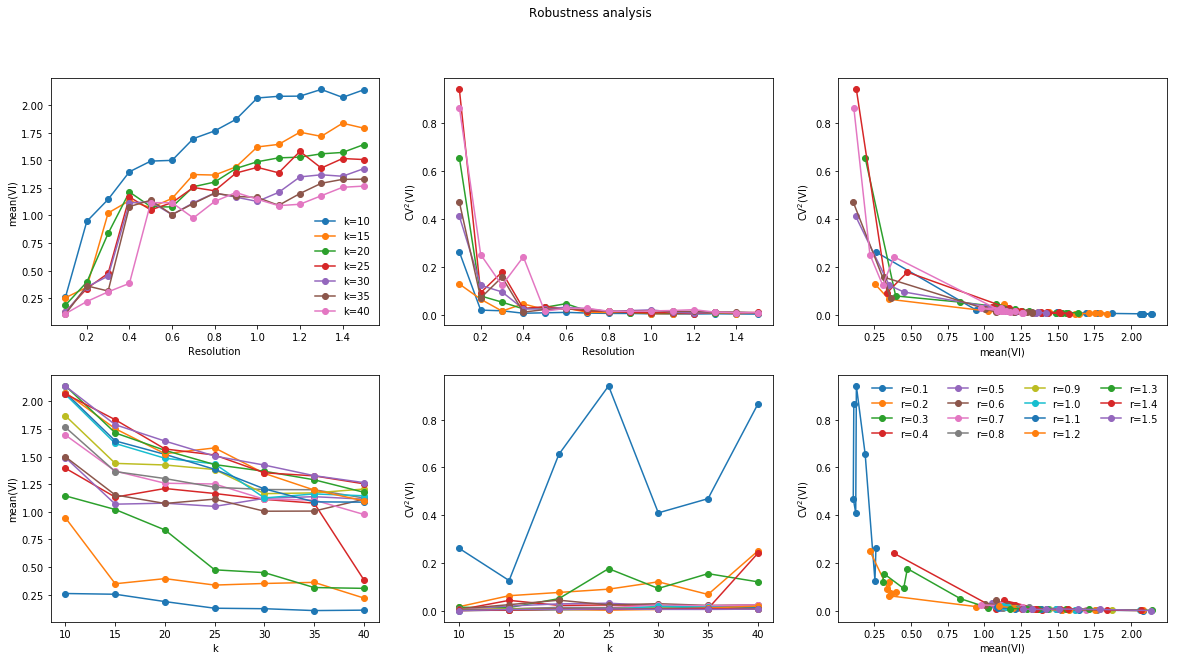

In [28]:
%get VarInfoMatrix.mean --from R
%get VarInfoMatrix.var --from R
%get k.vec --from R
%get res.vec --from R

#VarInfoMatrix_mean=np.loadtxt('VarInfoMatrix_mean.txt')
#VarInfoMatrix_var=np.loadtxt('VarInfoMatrix_mean.txt')
#k_vec=np.loadtxt('k_vec.txt')
#res_vec=np.loadtxt('res_vec.txt')

print(k_vec)
print(res_vec)

fig, axes = plt.subplots(2, 3,figsize=(20,10))
fig.suptitle('Robustness analysis')

axes[0,0].set_xlabel('Resolution')
axes[0,0].set_ylabel('mean(VI)')
for i in range(len(VarInfoMatrix_mean[:,0])):
    axes[0, 0].plot(res_vec,VarInfoMatrix_mean[i,:],'-o',label='k=%d' % k_vec[i])
axes[0,0].legend(loc=0,frameon=False)
axes[0,1].set_xlabel('Resolution')
axes[0,1].set_ylabel(r'CV$^2$(VI)')
for i in range(len(VarInfoMatrix_mean[:,0])):
    axes[0, 1].plot(res_vec,VarInfoMatrix_var[i,:]/VarInfoMatrix_mean[i,:]**2,
                    '-o',label='k=%d' % k_vec[i])
#axes[0,1].legend(loc=0,frameon=False)
axes[0,2].set_xlabel('mean(VI)')
axes[0,2].set_ylabel(r'CV$^2$(VI)')
for i in range(len(VarInfoMatrix_mean[:,0])):
    axes[0,2].plot(VarInfoMatrix_mean[i,:],VarInfoMatrix_var[i,:]/VarInfoMatrix_mean[i,:]**2,
                   '-o',label='k=%d' % k_vec[i])
#axes[0,2].legend(loc=0,frameon=False)

axes[1,0].set_xlabel('k')
axes[1,0].set_ylabel('mean(VI)')
for i in range(len(VarInfoMatrix_mean[0,:])):
    axes[1, 0].plot(k_vec,VarInfoMatrix_mean[:,i],'-o',label='r=%.1f' % res_vec[i])
#axes[1,0].legend(loc=0,frameon=False,ncol=4)
axes[1,1].set_xlabel('k')
axes[1,1].set_ylabel(r'CV$^2$(VI)')
for i in range(len(VarInfoMatrix_mean[0,:])):
    axes[1, 1].plot(k_vec,VarInfoMatrix_var[:,i]/VarInfoMatrix_mean[:,i]**2,'-o',
                    label='r=%.1f' % res_vec[i])
#axes[1,1].legend(loc=0,frameon=False)
axes[1,2].set_xlabel('mean(VI)')
axes[1,2].set_ylabel(r'CV$^2$(VI)')
for i in range(len(VarInfoMatrix_mean[0,:])):
    axes[1,2].plot(VarInfoMatrix_mean[:,i],VarInfoMatrix_var[:,i]/VarInfoMatrix_mean[:,i]**2,
                   '-o',label='r=%.1f' % res_vec[i])
axes[1,2].legend(loc=0,frameon=False,ncol=4)

For the moment we choose resolution=0.5 and nr neighbors (k)=20

# Clustering using Louvain algorithm

In [97]:
xenopus.combined <- RunPCA(xenopus.combined, npcs = 30, verbose = FALSE)
xenopus.combined <- RunUMAP(xenopus.combined, reduction = "pca", dims = 1:20,set.seed=42)
xenopus.combined <- RunTSNE(xenopus.combined, reduction = "pca", dims = 1:20)
xenopus.combined <- FindNeighbors(xenopus.combined, reduction = "pca", dims = 1:20,k.param=20)
xenopus.combined <- FindClusters(xenopus.combined, resolution =0.5)

Warning message:
“The following arguments are not used: set.seed”09:57:00 UMAP embedding parameters a = 0.9922 b = 1.112
09:57:00 Read 3405 rows and found 20 numeric columns
09:57:00 Using Annoy for neighbor search, n_neighbors = 30
09:57:00 Building Annoy index with metric = cosine, n_trees = 50
0%   10   20   30   40   50   60   70   80   90   100%
[----|----|----|----|----|----|----|----|----|----|
**************************************************|
09:57:01 Writing NN index file to temp file /var/folders/s7/jyt31pln5m7gbyc7rxhf0jdw0000gn/T//Rtmppp6tMW/file2e705ce98114
09:57:01 Searching Annoy index using 1 thread, search_k = 3000
09:57:02 Annoy recall = 100%
09:57:03 Commencing smooth kNN distance calibration using 1 thread
09:57:03 Initializing from normalized Laplacian + noise
09:57:04 Commencing optimization for 500 epochs, with 141564 positive edges
09:57:09 Optimization finished
Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3405
Number of edges: 124306

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8673
Number of communities: 11
Elapsed time: 0 seconds


## Check clusters' composition by batch and condition (IVF/NT)

In [98]:
xenopus.combined

An object of class Seurat 
33179 features across 3405 samples within 2 assays 
Active assay: integrated (2000 features)
 1 other assay present: RNA
 3 dimensional reductions calculated: pca, umap, tsne

In [99]:
table(Idents(xenopus.combined))


  0   1   2   3   4   5   6   7   8   9  10 
748 732 412 347 266 220 177 173 169 134  27 

In [100]:
table(Idents(xenopus.combined), xenopus.combined$stim)

    
     SIGAA2 SIGAB2 SIGAH12 SIGAH5
  0     123    148     242    235
  1     191     88     209    244
  2     102     79     124    107
  3      35     44      60    208
  4      27     24     137     78
  5      24     38      63     95
  6      20     36      63     58
  7       8     16      35    114
  8      25      7      30    107
  9       4     17      86     27
  10      7     17       1      2

In [101]:
table(Idents(xenopus.combined), xenopus.combined$isnt)

    
     IVF  NT
  0  358 390
  1  435 297
  2  209 203
  3  243 104
  4  105 161
  5  119 101
  6   78  99
  7  122  51
  8  132  37
  9   31 103
  10   9  18

## Plot the UMAP

The following functions and any applicable methods accept the dots: CombinePlots
The following functions and any applicable methods accept the dots: CombinePlots
The following functions and any applicable methods accept the dots: CombinePlots
The following functions and any applicable methods accept the dots: CombinePlots


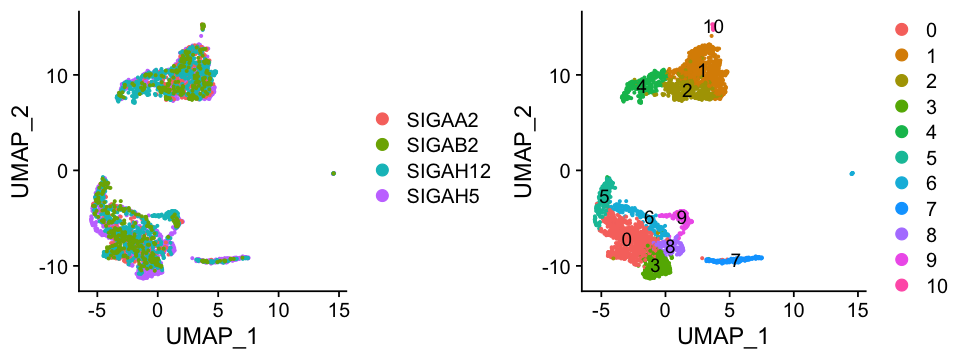

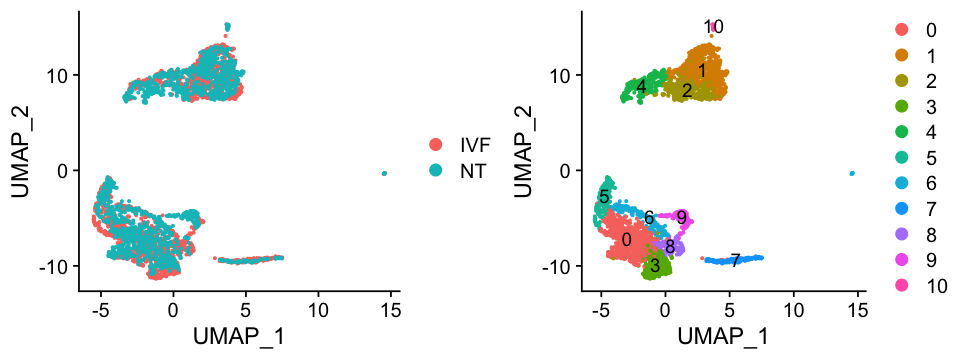

In [102]:
library(repr)
options(repr.plot.width=8, repr.plot.height=3)
#plot batches and clusters
p1 <- DimPlot(xenopus.combined, reduction = "umap", group.by = "stim", dim.1 = 10, dim.2 = 10)
p2 <- DimPlot(xenopus.combined, reduction = "umap", label = TRUE, dim.1 = 10, dim.2 = 10)
plt <- plot_grid(p1, p2,rel_widths = c(1.1, 1))
plt

#plot IVF/NT condition and clusters
p1 <- DimPlot(xenopus.combined, reduction = "umap", group.by = "isnt", dim.1 = 10, dim.2 = 10)
p2 <- DimPlot(xenopus.combined, reduction = "umap", label = TRUE, dim.1 = 10, dim.2 = 10)
plt <- plot_grid(p1, p2,rel_widths = c(1.1, 1))
plt

## Quality features of cluster 10

Warning message:
“Using `as.character()` on a quosure is deprecated as of rlang 0.3.0.
Please use `as_label()` or `as_name()` instead.
This warning is displayed once per session.”


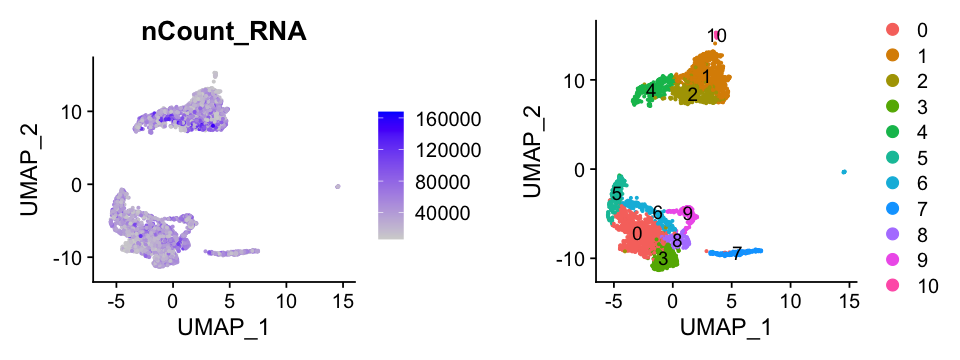

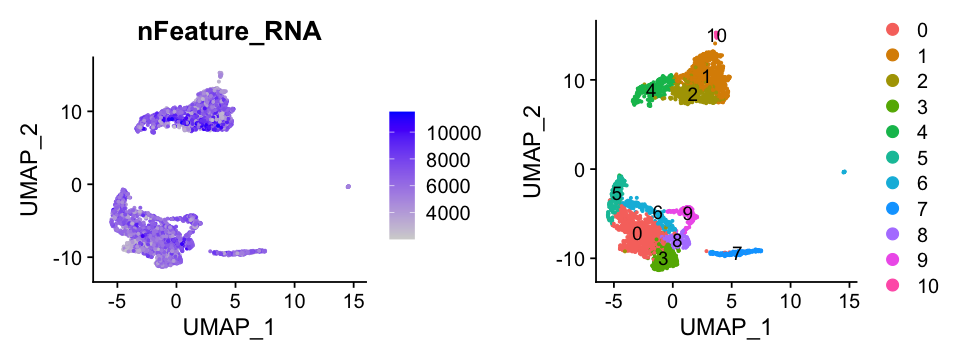

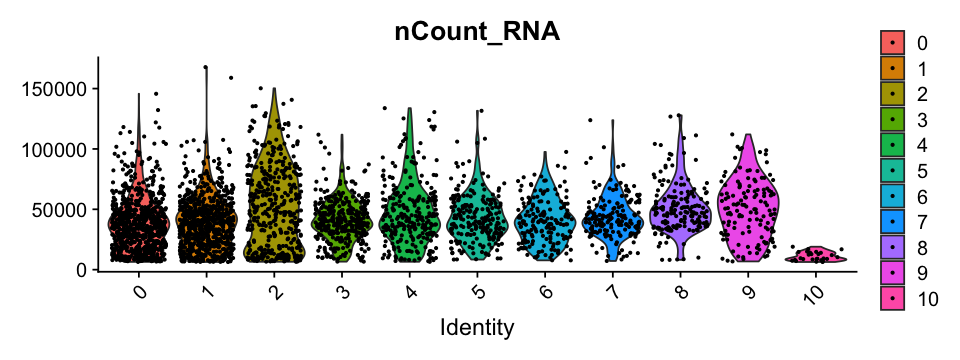

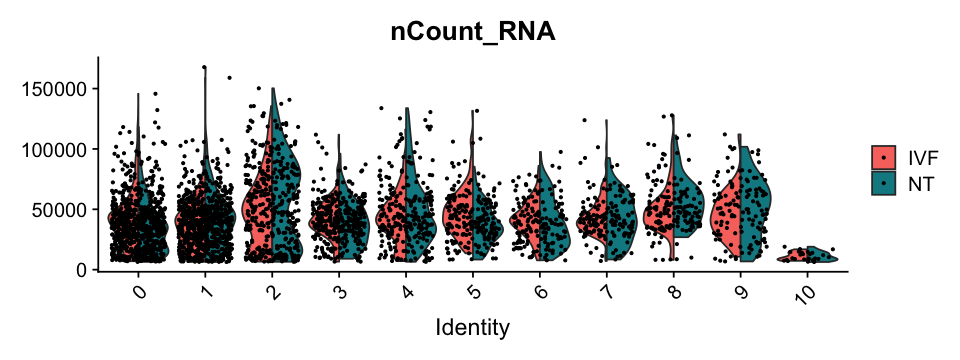

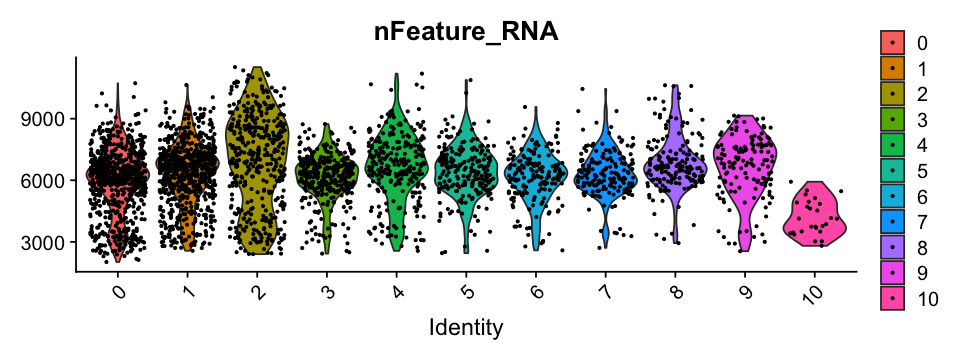

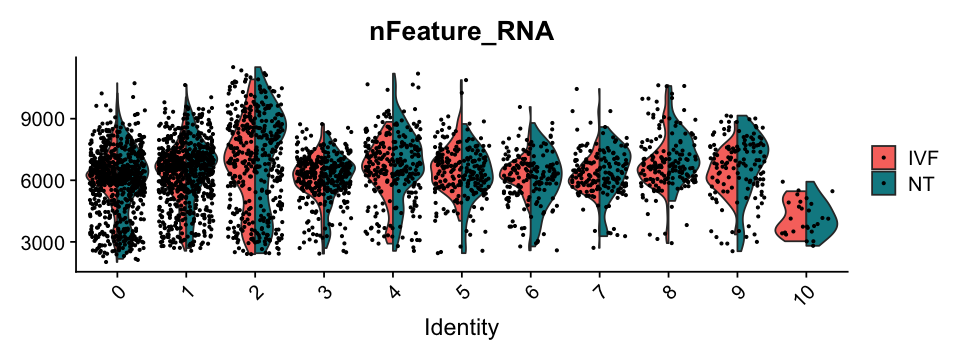

In [4]:
library(repr)
options(repr.plot.width=8, repr.plot.height=3)
#plot batches and clusters

#Load the batch integrated data
xenopus.combined <- readRDS(file = "xenopus_combined_and_clustered_with_10.rds")

p1 <- FeaturePlot(xenopus.combined, features = 'nCount_RNA' )
p2 <- DimPlot(xenopus.combined, reduction = "umap", label = TRUE)
plt <- plot_grid(p1, p2,rel_widths = c(1.1, 1))
plt

p1 <- FeaturePlot(xenopus.combined, features = 'nFeature_RNA' )
p2 <- DimPlot(xenopus.combined, reduction = "umap", label = TRUE)
plt <- plot_grid(p1, p2,rel_widths = c(1.1, 1))
plt

p3<- VlnPlot(xenopus.combined, features = 'nCount_RNA',pt.size = 0.5)
p4<- VlnPlot(xenopus.combined, features = 'nCount_RNA',split.by = "isnt",pt.size = 0.5)
p3
p4

p3<- VlnPlot(xenopus.combined, features = 'nFeature_RNA',pt.size = 0.5)
p4<- VlnPlot(xenopus.combined, features = 'nFeature_RNA',split.by = "isnt",pt.size = 0.5)
p3
p4

In [5]:
# Eliminate cluster 10 and save the object
xenopus.combined.new <- subset(xenopus.combined, idents=c(0,1,2,3,4,5,6,7,8,9))

# Save the object
saveRDS(xenopus.combined.new, file = "xenopus_combined_and_clustered.rds")

## Create Seurat object with the combined raw data and save them

In [6]:
library(Seurat)
library(ggplot2)
library(cowplot)

SIGAH12.data<-read.table(file=paste0("/Users/jonathan/Desktop/MUNCHEN/Project_Xenopus/10XCountMatrix/","SIGAH12_91_Chm3_FC2.csv"),
                         row.names = 1,header=TRUE,sep=",")
rownames(SIGAH12.data) <- convertGeneList(rownames(SIGAH12.data))
SIGAH12 <- CreateSeuratObject(counts = SIGAH12.data, project = "SIGAH12")
SIGAH12$stim <- "SIGAH12"
SIGAH12$isnt <- "NT"
SIGAH12$exp <- "Exp2"

SIGAH5.data<-read.table(file=paste0("/Users/jonathan/Desktop/MUNCHEN/Project_Xenopus/10XCountMatrix/","SIGAH5_91_Chm3_FC2.csv"),
                        row.names = 1,header=TRUE,sep=",")
rownames(SIGAH5.data) <- convertGeneList(rownames(SIGAH5.data))
#SIGAH5.data <- Read10X(data.dir = "/Users/christopherpenfold/Desktop/10X/Eva_10X/SIGAH5_91_Chm3_FC2/outs/filtered_feature_bc_matrix")
SIGAH5 <- CreateSeuratObject(counts = SIGAH5.data, project = "SIGAH5")
SIGAH5$stim <- "SIGAH5"
SIGAH5$isnt <- "IVF"
SIGAH5$exp <- "Exp2"

SIGAA2.data<-read.table(file=paste0("/Users/jonathan/Desktop/MUNCHEN/Project_Xenopus/10XCountMatrix/","SIGAA2_91_Chm3_FC2r.csv"),
                        row.names = 1,header=TRUE,sep=",")
rownames(SIGAA2.data) <- convertGeneList(rownames(SIGAA2.data))
#SIGAA2.data <- Read10X(data.dir = "/Users/christopherpenfold/Desktop/Eva/10X/SIGAA2_91_Chm3_FC2r/outs/filtered_feature_bc_matrix")
SIGAA2 <- CreateSeuratObject(counts = SIGAA2.data, project = "SIGAA2")
SIGAA2$stim <- "SIGAA2"
SIGAA2$isnt <- "IVF"
SIGAA2$exp <- "Exp1"

SIGAB2.data<-read.table(file=paste0("/Users/jonathan/Desktop/MUNCHEN/Project_Xenopus/10XCountMatrix/","SIGAB2_91_Chm3_FC2r.csv"),
                        row.names = 1,header=TRUE,sep=",")
rownames(SIGAB2.data) <- convertGeneList(rownames(SIGAB2.data))
#SIGAB2.data <- Read10X(data.dir = "/Users/christopherpenfold/Desktop/Eva/10X/SIGAB2_91_Chm3_FC2r/outs/filtered_feature_bc_matrix")
SIGAB2 <- CreateSeuratObject(counts = SIGAB2.data, project = "SIGAB2")
SIGAB2$stim <- "SIGAB2"
SIGAB2$isnt <- "NT"
SIGAB2$exp <- "Exp1"

Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”
Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”
Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”
Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”


In [14]:
# Save the combined raw data (we will use them for DE analysis with DESeq2)
#Merge the raw counts for the 4 batches
xenopus.combined.raw <- merge(SIGAH5, y = c(SIGAA2, SIGAH12, SIGAB2))

#Load the batch integrated data
xenopus.combined <- readRDS(file = "xenopus_combined_and_clustered_with_10.rds")

#Check that the cell order is the same
all(colnames(xenopus.combined.raw)==colnames(xenopus.combined))

#Assign cluster identities to the raw data
xenopus.combined.raw$seurat_clusters <- xenopus.combined$seurat_clusters

Idents(xenopus.combined.raw) <- xenopus.combined.raw$seurat_clusters

xenopus.combined.raw.new <- subset(xenopus.combined.raw, idents=c(0,1,2,3,4,5,6,7,8,9))

saveRDS(xenopus.combined.raw.new, file = "xenopus_combined_and_clustered_raw.rds")

[1] TRUE

## Plots

In [9]:
library(Seurat)
library(ggplot2)
library(cowplot)

xenopus.combined <- readRDS(file = "xenopus_combined_and_clustered_with_10.rds")

library(repr)
options(repr.plot.width=8, repr.plot.height=3)
#plot batches and clusters

pdf(file = "/Users/jonathan/Desktop/MUNCHEN/Project_Xenopus/PLOTS/clustering_batch.pdf",width=10,height=4)
p1 <- DimPlot(xenopus.combined, reduction = "umap", group.by = "stim") + labs(color = "batch")
p2 <- DimPlot(xenopus.combined, reduction = "umap", label = TRUE) + labs(color = "cluster")
plt <- plot_grid(p2, p1,rel_widths = c(1, 1.1))
plt
dev.off()

#plot IVF/NT condition and clusters
pdf(file = "/Users/jonathan/Desktop/MUNCHEN/Project_Xenopus/PLOTS/clustering_cond.pdf",width=10,height=4)
p1 <- DimPlot(xenopus.combined, reduction = "umap", group.by = "isnt") + labs(color = "condition")
p2 <- DimPlot(xenopus.combined, reduction = "umap", label = TRUE) + labs(color = "cluster")
plt <- plot_grid(p2, p1,rel_widths = c(1, 1.1))
plt
dev.off()

pdf 
  2

pdf 
  2

In [15]:
#DefaultAssay(xenopus.combined) <- "RNA"

pdf(file = "/Users/jonathan/Desktop/MUNCHEN/Project_Xenopus/PLOTS/upk3b.pdf",width=4,height=3)
p <- FeaturePlot(xenopus.combined, reduction = "umap",features='upk3b.L', label = FALSE) 
p
dev.off()

pdf(file = "/Users/jonathan/Desktop/MUNCHEN/Project_Xenopus/PLOTS/sox11.pdf",width=4,height=3)
p <- FeaturePlot(xenopus.combined, reduction = "umap",features='sox11.L', label = FALSE) 
p
dev.off()

pdf 
  2

pdf 
  2

In [18]:
pdf(file = "/Users/jonathan/Desktop/MUNCHEN/Project_Xenopus/PLOTS/ncount_RNA.pdf",width=6,height=4)
p3<- VlnPlot(xenopus.combined, features = 'nCount_RNA',pt.size = 0.5)+ labs(color = "cluster")
p3
dev.off()

pdf(file = "/Users/jonathan/Desktop/MUNCHEN/Project_Xenopus/PLOTS/nfeature_RNA.pdf",width=6,height=4)
p4<- VlnPlot(xenopus.combined, features = 'nFeature_RNA',pt.size = 0.5)+ labs(color = "cluster")
p4
dev.off()

pdf 
  2

pdf 
  2

In [23]:
xenopus.combined <- readRDS(file = "xenopus_combined_and_clustered.rds")

palette <- c("#F8766D","#DB8E00","#AEA200","#64B200","#00BD5C","#00C1A7","#00BADE","#00A6FF",
             "#B385FF","#EF67EB")

pdf(file = "/Users/jonathan/Desktop/MUNCHEN/Project_Xenopus/PLOTS/UMAP_no10.pdf",width=5,height=4)
p <- DimPlot(xenopus.combined, reduction = "umap", cols=palette,label = TRUE) + NoLegend() + labs(color = "cluster")
p
dev.off()

pdf 
  2

In [17]:
sessionInfo()

R version 3.5.2 (2018-12-20)
Platform: x86_64-apple-darwin15.6.0 (64-bit)
Running under: macOS Mojave 10.14.6

Matrix products: default
BLAS: /Library/Frameworks/R.framework/Versions/3.5/Resources/lib/libRblas.0.dylib
LAPACK: /Library/Frameworks/R.framework/Versions/3.5/Resources/lib/libRlapack.dylib

locale:
[1] C/UTF-8/C/C/C/C

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
[1] repr_1.1.0    cowplot_1.1.0 ggplot2_3.3.2 Seurat_3.1.4 

loaded via a namespace (and not attached):
  [1] tsne_0.1-3          nlme_3.1-145        bitops_1.0-6       
  [4] RcppAnnoy_0.0.17    RColorBrewer_1.1-2  httr_1.4.2         
  [7] numDeriv_2016.8-1.1 sctransform_0.2.1   tools_3.5.2        
 [10] R6_2.5.0            irlba_2.3.3         KernSmooth_2.23-16 
 [13] uwot_0.1.9          lazyeval_0.2.2      BiocGenerics_0.28.0
 [16] colorspace_2.0-0    sn_1.6-2            withr_2.3.0        
 [19] gridExtra_2.3       tidyselect_1.1.0  